In [5]:
import pandas as pd
from explorer.loaders import Project2Data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_pickle("./data_frames/raw_data.pkl")

In [8]:
d1 = []
d2 = []

In [9]:
print data

                                % change, 2007-2012, age 0-4  \
St-Kilda-East-Suburb - XLSX                          14.3354   
South-Melbourne-Suburb - XLSX                       24.18784   
St-Kilda-West-Suburb - XLSX                          3.67745   
Croydon-Suburb - XLSX                               20.80125   
Somerville-Suburb - XLSX                           -7.504334   
Northcote-Suburb - XLSX                            -2.276903   
Braybrook-Suburb - XLSX                             27.50456   
Ascot-Vale-Suburb - XLSX                            33.86802   
Moorabbin-Suburb - XLSX                             4.249296   
Windsor-Suburb - XLSX                               9.737828   
Craigieburn-Suburb - XLSX                           77.31763   
Parkville-Suburb - XLSX                             35.43441   
Melbourne-Airport-Suburb - XLSX                          n/a   
Prahran-Suburb - XLSX                               5.631068   
Waterways-Suburb - XLSX                 

14.7743245354
18.4615384615
15.2040245947
6.86876438987
4.20753742901
14.722249341
16.3548387097
13.5113003603
7.83879539415
19.9792153806
3.32277048438
18.2511438739
18.75
18.4825207713
0.0
0.0
12.9661016949
19.4218066398
1.63793103448
11.3139992839
9.66565349544
8.49028400598
7.5055187638
12.4002991027
11.1973159992
1.06382978723
10.0642927794
20.955037742
8.26589595376
21.0456475584
11.1859140342
7.5
8.13739897134
27.8447121821


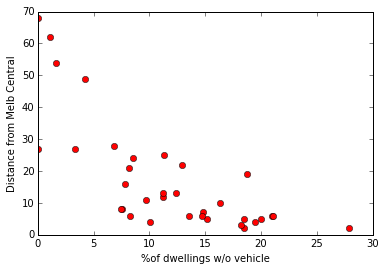

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
v = data["Nearest Public Hospital"]
#print v
names = data.index.values
dist = []
for item in data["Location"]:
    item = item.split()
    
    dist.append(int(item[0].split("km")[0]))
#dist.sort()
dist
data["DistFromMelbourne(Km)"] = dist
#data["Location"]
i = 0
d1 = []
while (i < len(data["Location"])):
    d1.append(data["Population Density"][i] / data["Area (km^2)"][i])
    i += 1
plt.plot(d1,data["DistFromMelbourne(Km)"], 'ro')
plt.xlabel("Pop/Area")
plt.ylabel("Distance from Melb Central")
savefig('pspence\pop-area v dist.png', bbox_inches='tight', dpi=100)
plt.close()
d1 = []
for item in data["Dwellings with no motor vehicle, %"]:
    if(item == "n/a"):
        item = 0.0
    print item
    d1.append(item)
plt.plot(d1,data["DistFromMelbourne(Km)"], 'ro')
plt.xlabel("%of dwellings w/o vehicle")
plt.ylabel("Distance from Melb Central")
savefig('pspence\motor% v dist.png', bbox_inches='tight', dpi=100)

In [52]:
clusterBasedOnHospital = {}
i = 0
for item in v:
    vdirection = (0,0)
    vstring = data["Location"][i]
    #print vstring
    for dir in vstring.split()[1]:
        if(dir == 'W'):
            vdirection = (vdirection[0] - 1, vdirection[1])
        if(dir == 'E'):
            vdirection = (vdirection[0] + 1, vdirection[1])
        if(dir == 'N'):
            vdirection = (vdirection[0], vdirection[1] + 1)
        if(dir == 'S'):
            vdirection = (vdirection[0], vdirection[1] - 1)
    #print vdirection
    nsum = math.sqrt(vdirection[0] ** 2 + vdirection[1] ** 2)
    vdirection = (vdirection[0]/nsum, vdirection[1]/nsum)
    if(clusterBasedOnHospital.has_key(item)):
        clusterBasedOnHospital[item].append((names[i], data["DistFromMelbourne(Km)"][i], vdirection))
    else:
        clusterBasedOnHospital[item] = [(names[i], data["DistFromMelbourne(Km)"][i], vdirection)]
    i += 1
for item in clusterBasedOnHospital:
    print "\n", item
    for item2 in clusterBasedOnHospital[item]:
        print "\t", item2[0], "dist from melb: ", item2[1], "Km, in the direction of: ", item2[2]



Monash Medical Centre (Clayton)
	Springvale-Suburb - XLSX dist from melb:  22 Km, in the direction of:  (0.7071067811865475, -0.7071067811865475)

Frankston Hospital
	Somerville-Suburb - XLSX dist from melb:  49 Km, in the direction of:  (0.4472135954999579, -0.8944271909999159)
	Tyabb-Suburb - XLSX dist from melb:  54 Km, in the direction of:  (0.4472135954999579, -0.8944271909999159)

The Alfred
	South-Melbourne-Suburb - XLSX dist from melb:  2 Km, in the direction of:  (-0.4472135954999579, -0.8944271909999159)
	St-Kilda-West-Suburb - XLSX dist from melb:  5 Km, in the direction of:  (0.0, -1.0)
	Windsor-Suburb - XLSX dist from melb:  5 Km, in the direction of:  (0.4472135954999579, -0.8944271909999159)
	Prahran-Suburb - XLSX dist from melb:  5 Km, in the direction of:  (0.7071067811865475, -0.7071067811865475)
	South-Yarra-Suburb - XLSX dist from melb:  4 Km, in the direction of:  (0.7071067811865475, -0.7071067811865475)
	St-Kilda-Suburb - XLSX dist from melb:  6 Km, in the direc

In [9]:
data["DistFromMelbourne(Km)"]

St-Kilda-East-Suburb - XLSX         7
South-Melbourne-Suburb - XLSX       2
St-Kilda-West-Suburb - XLSX         5
Croydon-Suburb - XLSX              28
Somerville-Suburb - XLSX           49
Northcote-Suburb - XLSX             6
Braybrook-Suburb - XLSX            10
Ascot-Vale-Suburb - XLSX            6
Moorabbin-Suburb - XLSX            16
Windsor-Suburb - XLSX               5
Craigieburn-Suburb - XLSX          27
Parkville-Suburb - XLSX             3
Melbourne-Airport-Suburb - XLSX    19
Prahran-Suburb - XLSX               5
Waterways-Suburb - XLSX            27
St-Andrews-Beach-Suburb - XLSX     68
Springvale-Suburb - XLSX           22
South-Yarra-Suburb - XLSX           4
Tyabb-Suburb - XLSX                54
Noble-Park-Suburb - XLSX           25
Malvern-East-Suburb - XLSX         11
Mordialloc-Suburb - XLSX           24
Malvern-Suburb - XLSX               8
Glenroy-Suburb - XLSX              13
Fawkner-Suburb - XLSX              12
Sorrento-Suburb - XLSX             62
Port-Melbour

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters = 4)

data["distance_cluster"] = data["DistFromMelbourne(Km)"]
data["distance_cluster"] = km.fit_predict(data[["distance_cluster", "DistFromMelbourne(Km)"]])

data[["distance_cluster", "DistFromMelbourne(Km)"]]

distance_cluster  DistFromMelbourne(Km)
St-Kilda-East-Suburb - XLSX                     3                      7
South-Melbourne-Suburb - XLSX                   3                      2
St-Kilda-West-Suburb - XLSX                     3                      5
Croydon-Suburb - XLSX                           2                     28
Somerville-Suburb - XLSX                        0                     49
Northcote-Suburb - XLSX                         3                      6
Braybrook-Suburb - XLSX                         1                     10
Ascot-Vale-Suburb - XLSX                        3                      6
Moorabbin-Suburb - XLSX                         1                     16
Windsor-Suburb - XLSX                           3                      5
Craigieburn-Suburb - XLSX                       2                     27
Parkville-Suburb - XLSX                         3                      3
Melbourne-Airport-Suburb - XLSX                 2                     19
Prahran-Suburb - XLSX                           3                      5
Waterways-Suburb - XLSX                         2                     27
St-Andrews-Beach-Suburb - XLSX                  0                     68
Springvale-Suburb - XLSX                        2                     22
South-Yarra-Suburb - XLSX                       3                      4
Tyabb-Suburb - XLSX                             0                     54
Noble-Park-Suburb - XLSX                        2                     25
Malvern-East-Suburb - XLSX                      1                     11
Mordialloc-Suburb - XLSX                        2                     24
Malvern-Suburb - XLSX                           3                      8
Glenroy-Suburb - XLSX                           1                     13
Fawkner-Suburb - XLSX                           1                     12
Sorrento-Suburb - XLSX                          0                     62
Port-Melbourne-Suburb - XLSX                    3                      4
Footscray-Suburb - XLSX                         3                      6
Toorak-Suburb - XLSX                            3                      6
St-Kilda-Suburb - XLSX                          3                      6
Murrumbeena-Suburb - XLSX                       1                     13
Pascoe-Vale-South-Suburb - XLSX                 3                      8
Mentone-Suburb - XLSX                           2                     21
North-Melbourne-Suburb - XLSX                   3                      2

ERROR! Session/line number was not unique in database. History logging moved to new session 80


KeyboardInterrupt: 

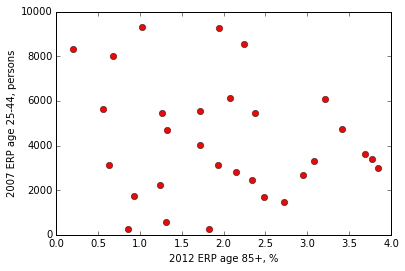

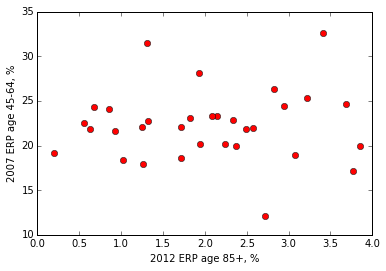

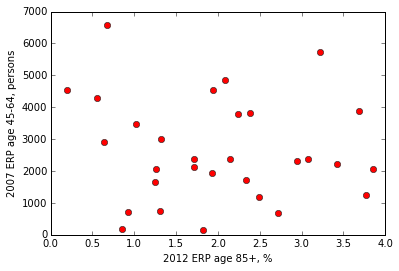

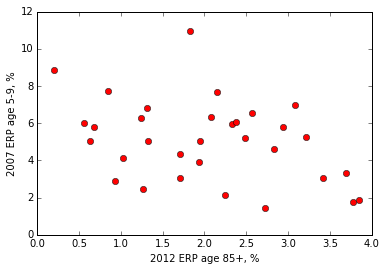

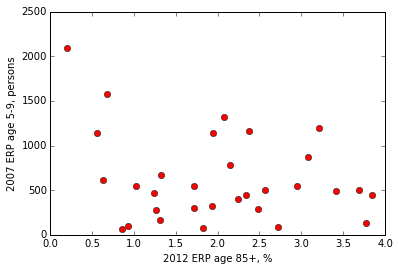

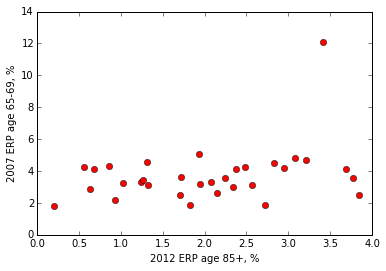

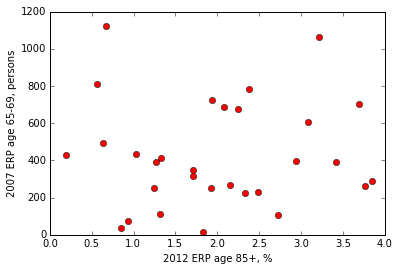

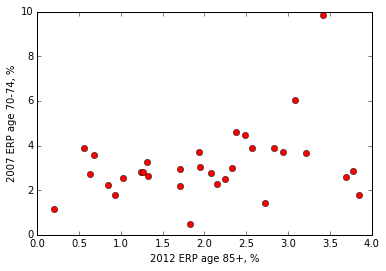

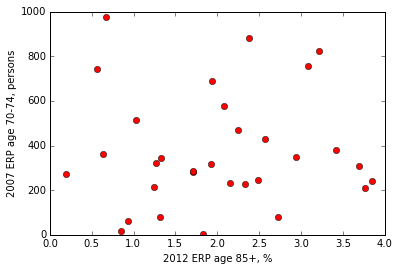

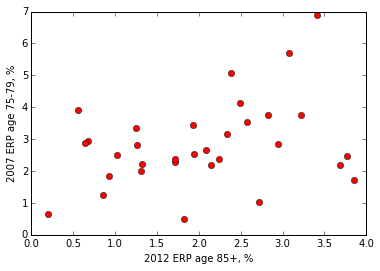

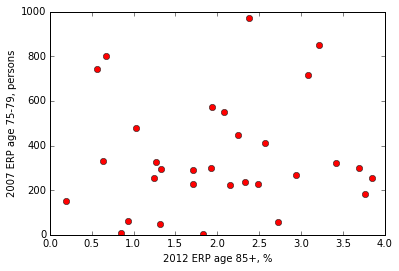

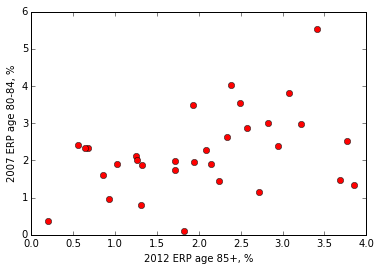

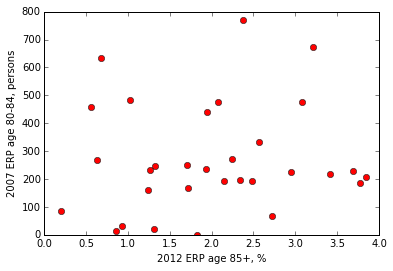

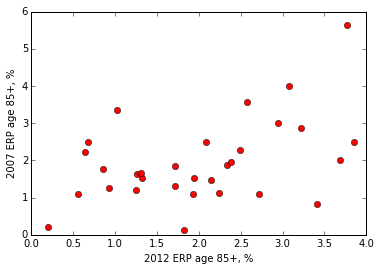

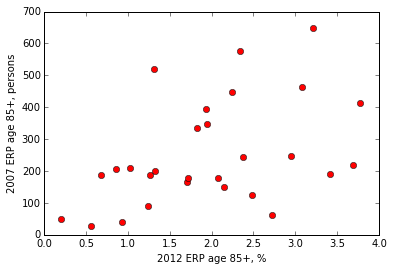

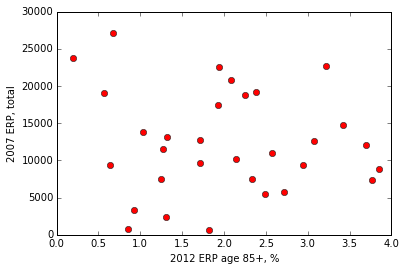

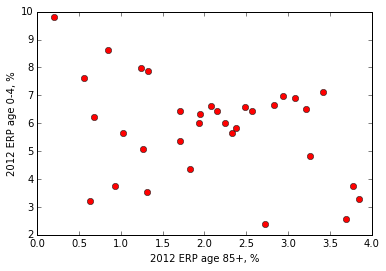

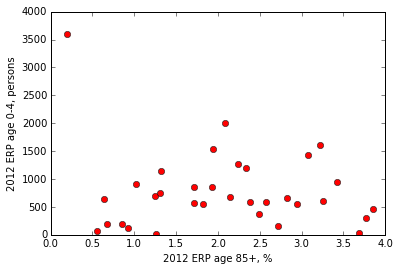

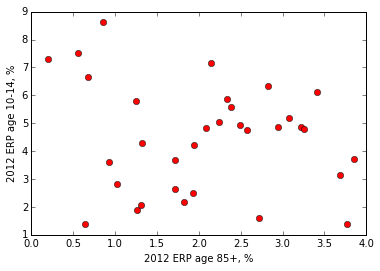

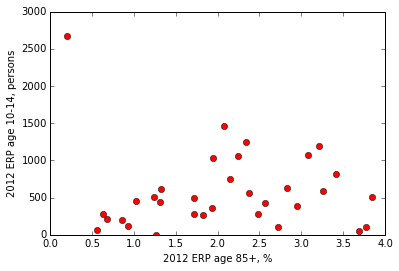

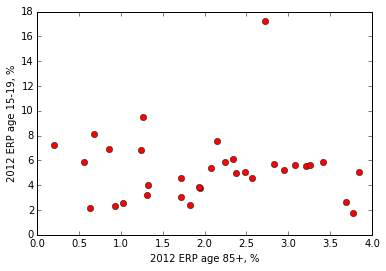

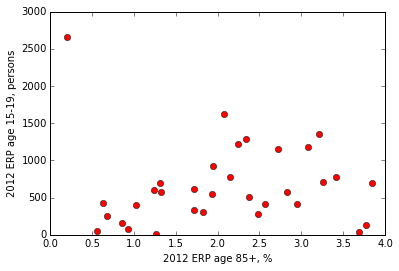

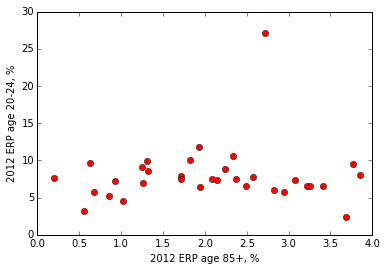

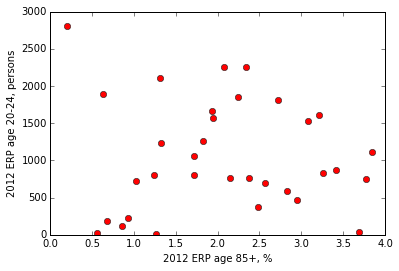

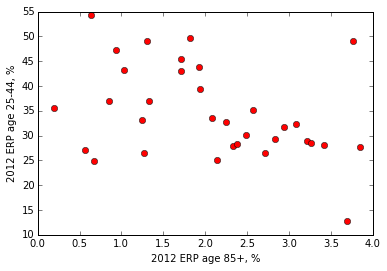

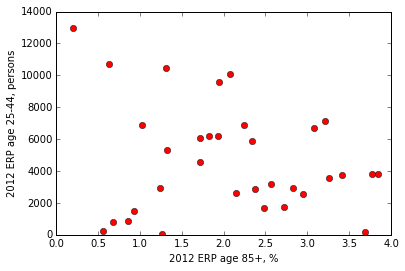

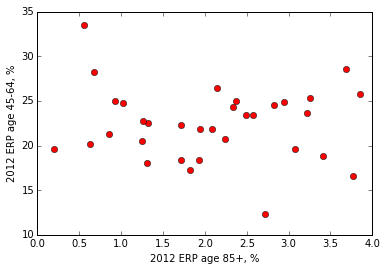

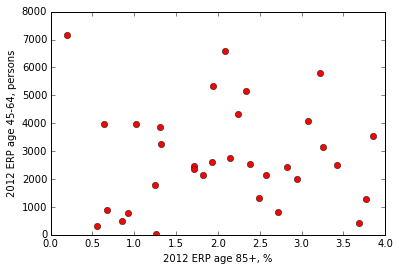

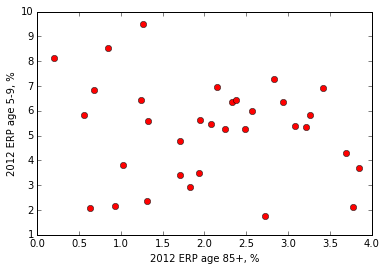

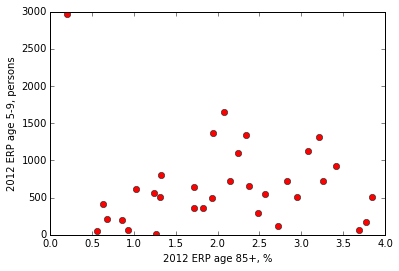

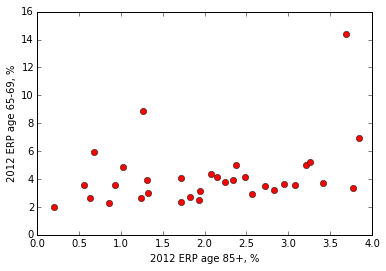

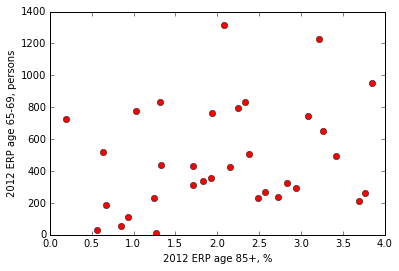

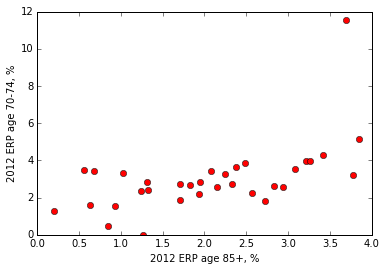

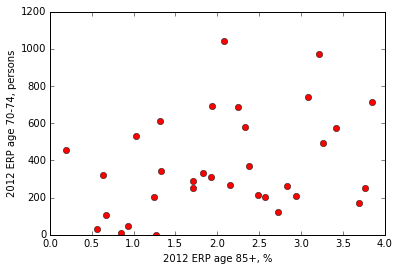

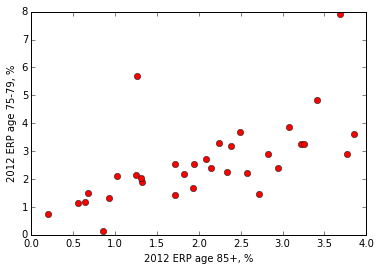

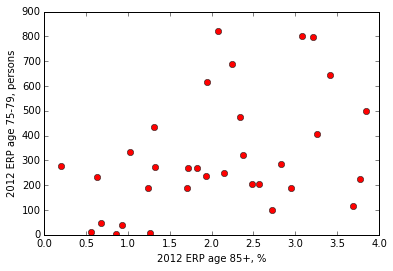

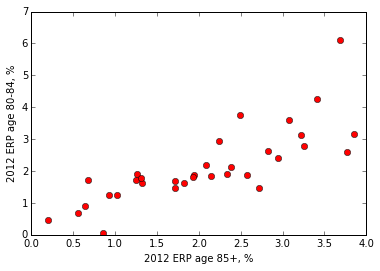

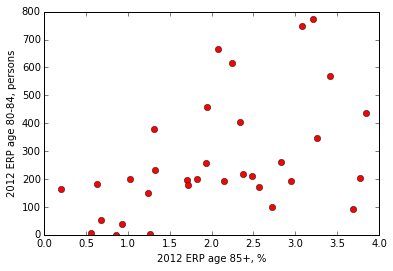

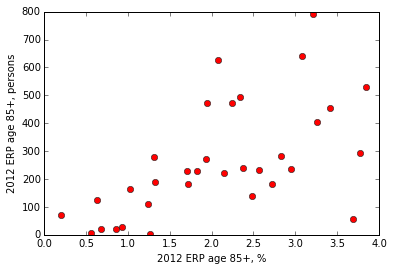

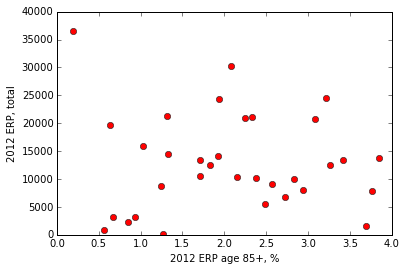

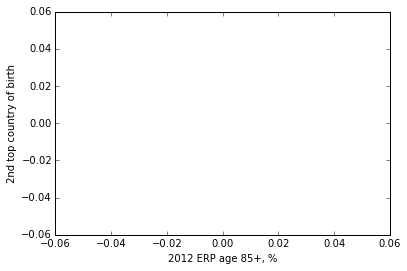

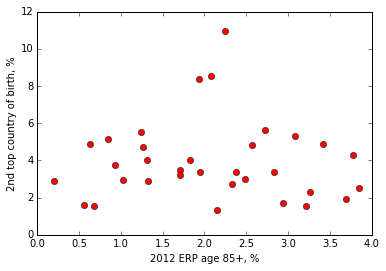

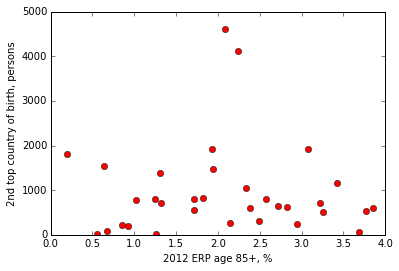

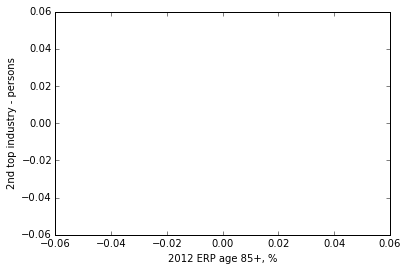

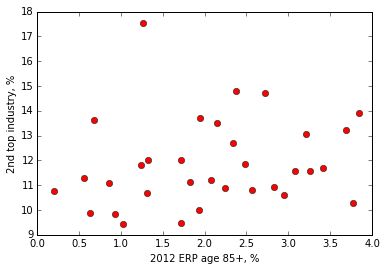

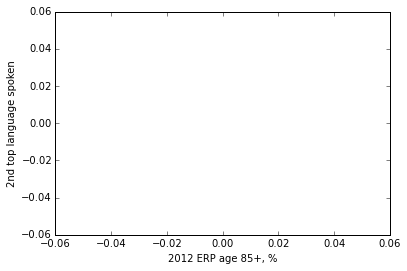

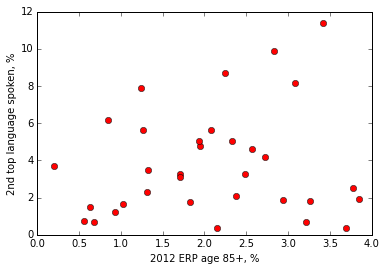

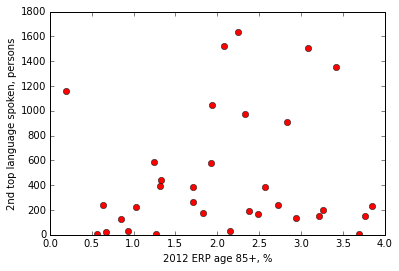

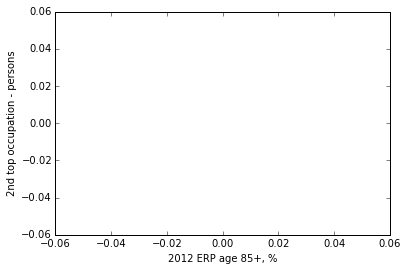

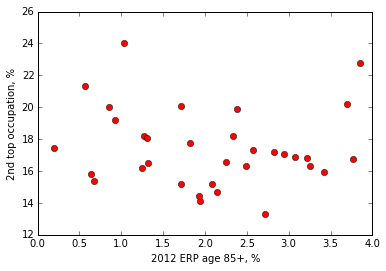

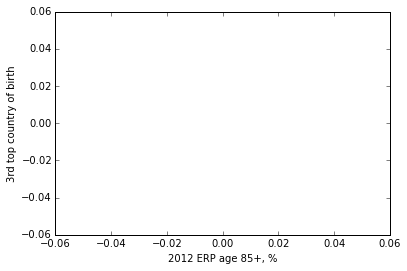

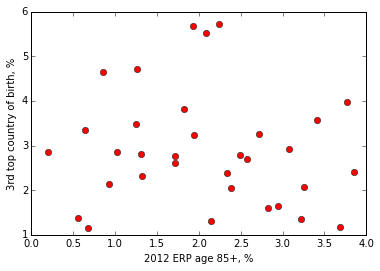

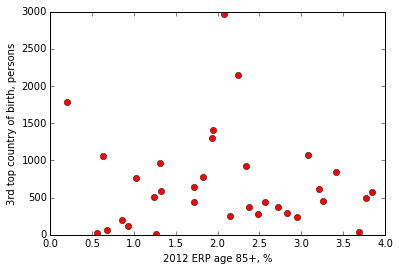

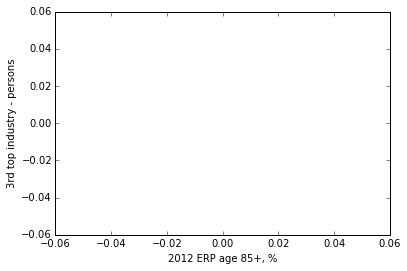

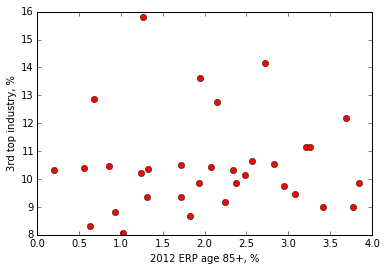

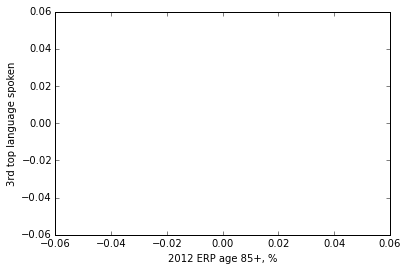

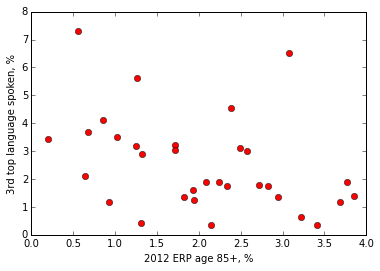

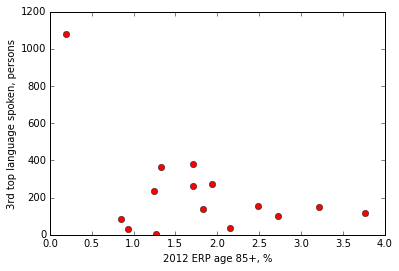

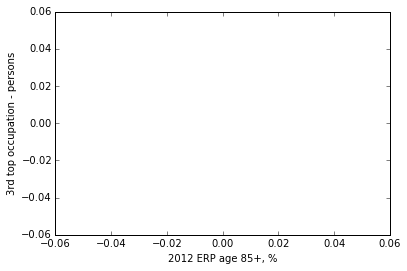

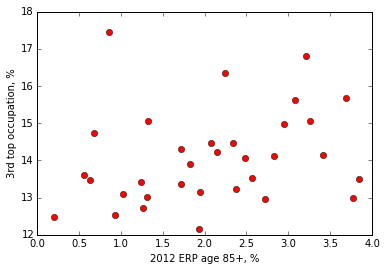

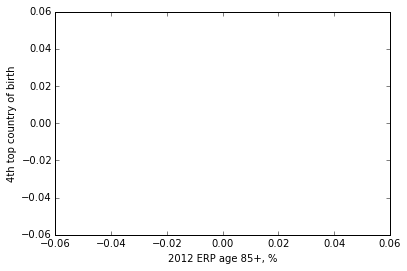

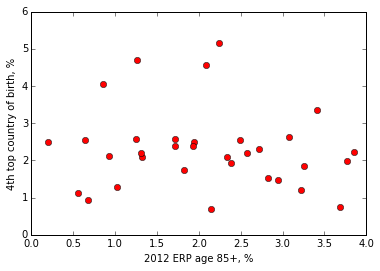

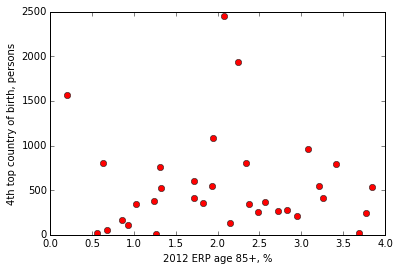

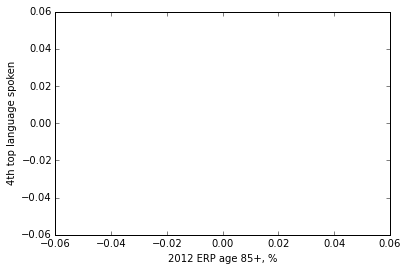

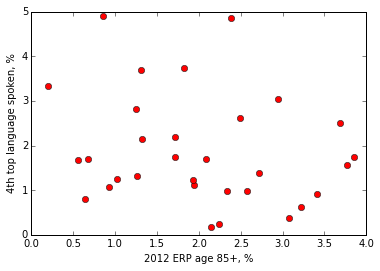

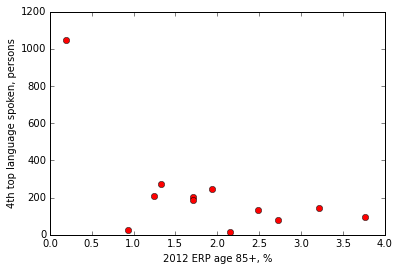

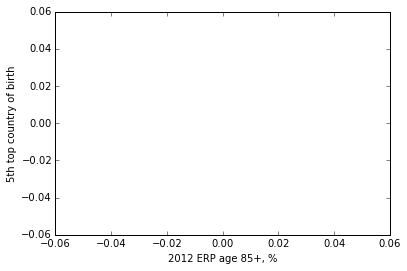

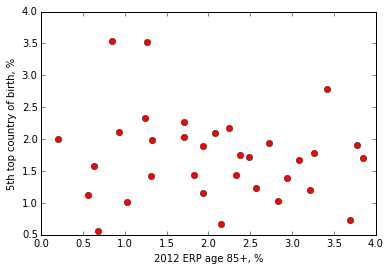

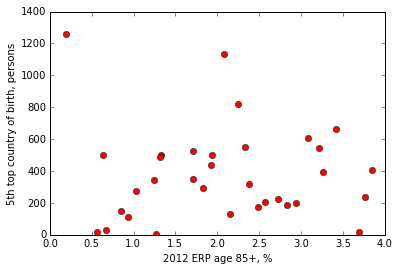

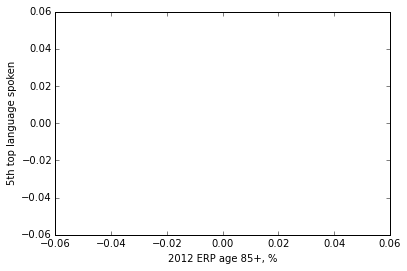

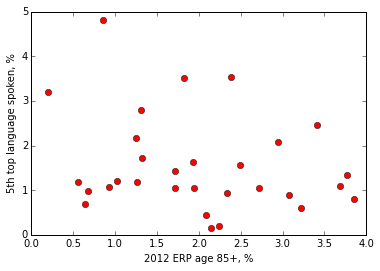

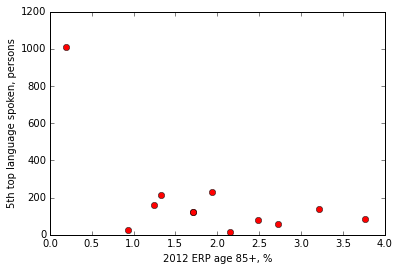

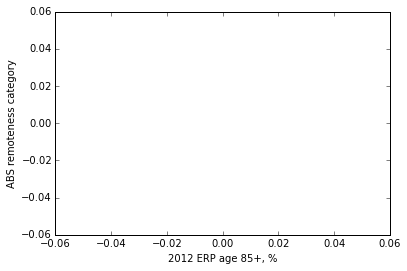

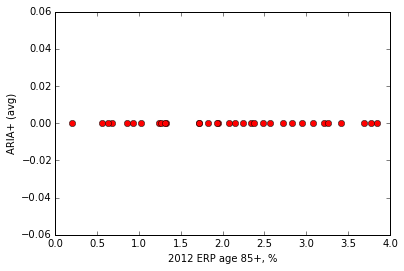

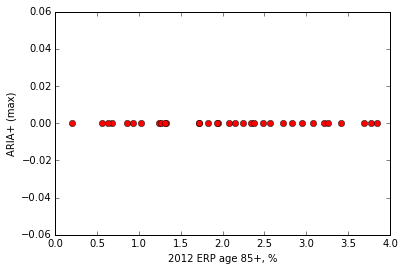

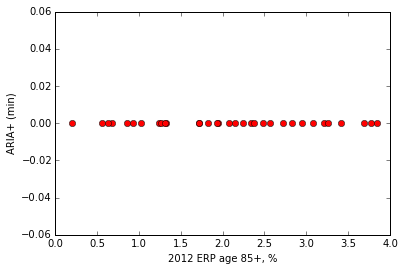

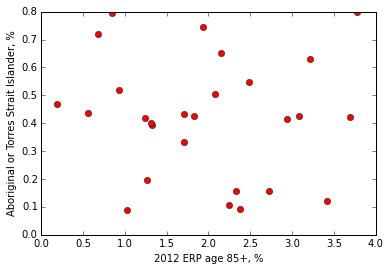

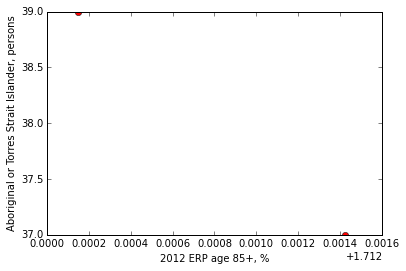

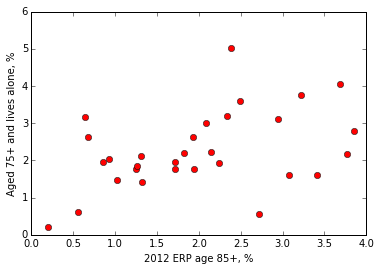

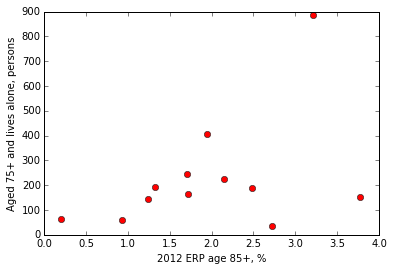

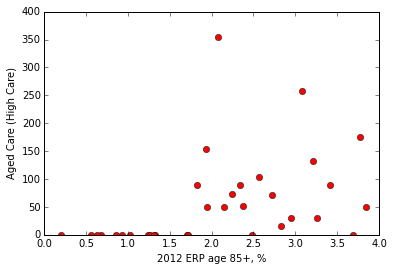

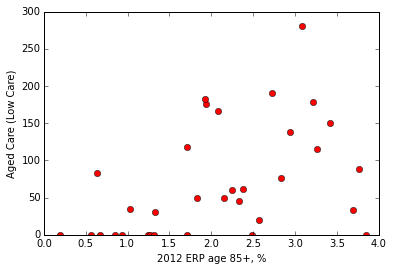

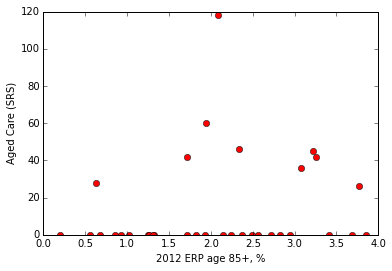

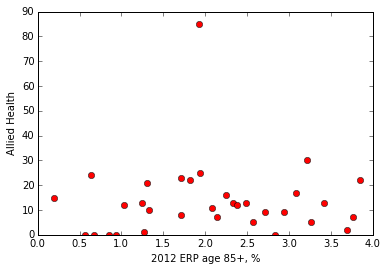

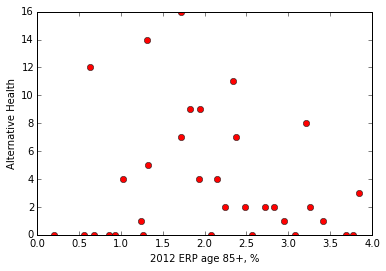

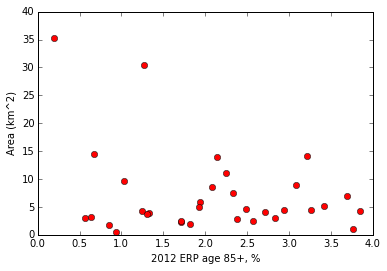

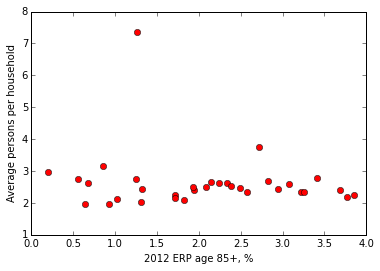

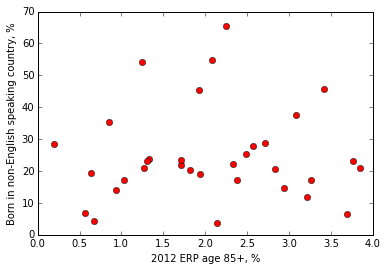

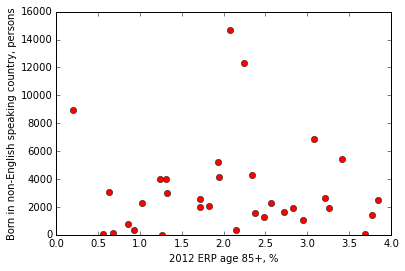

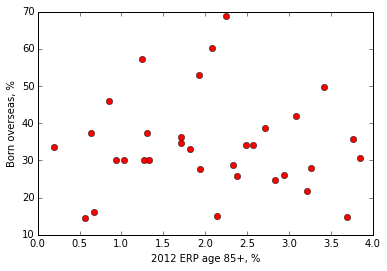

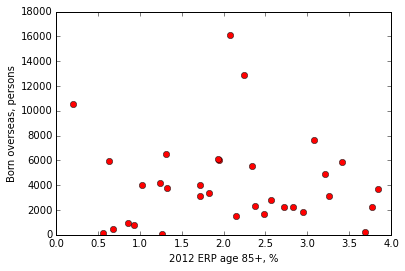

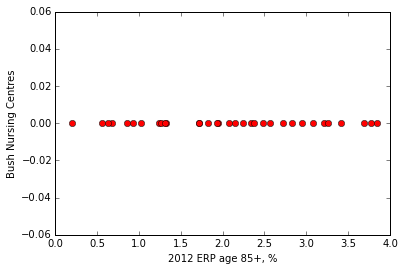

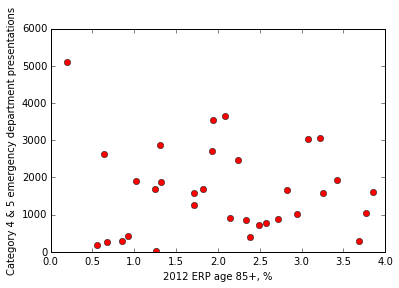

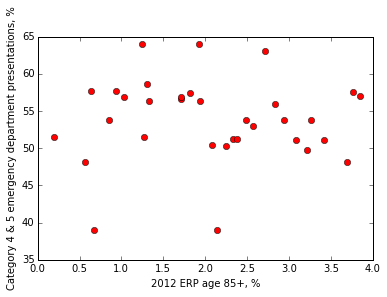

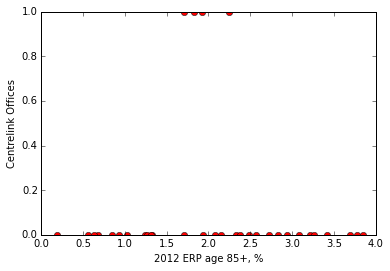

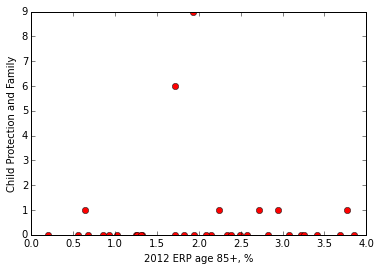

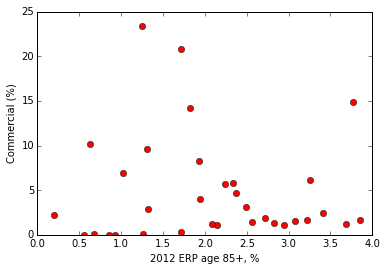

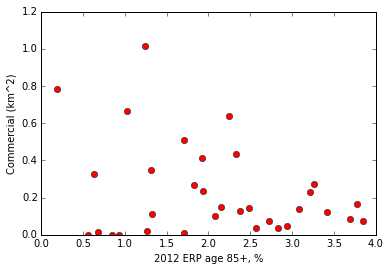

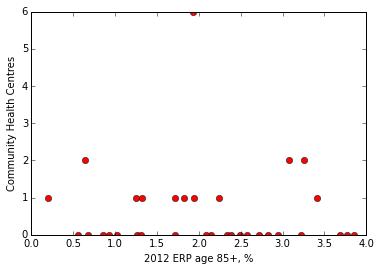

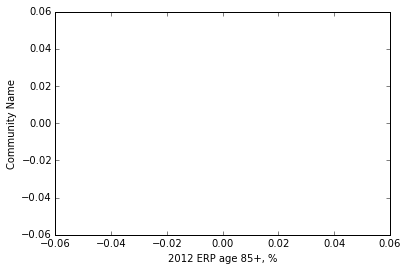

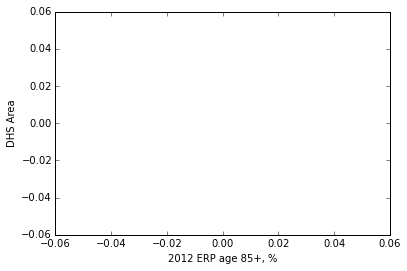

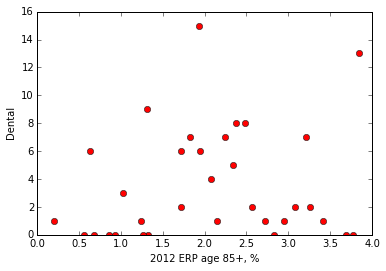

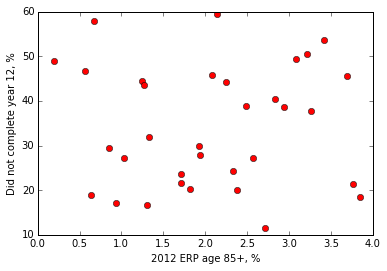

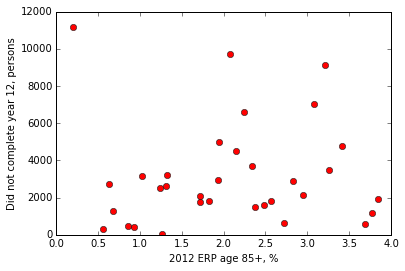

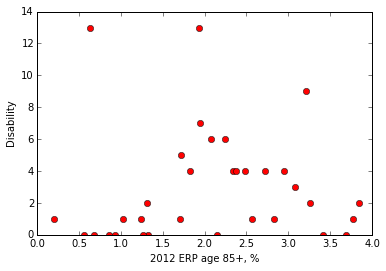

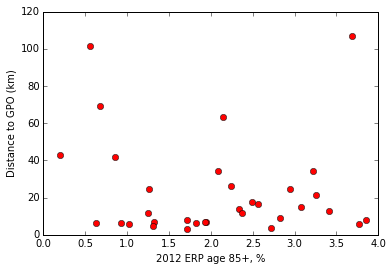

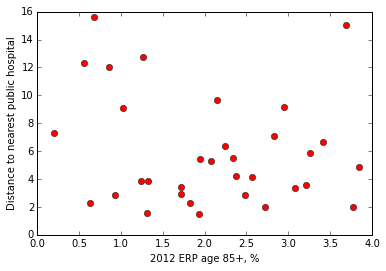

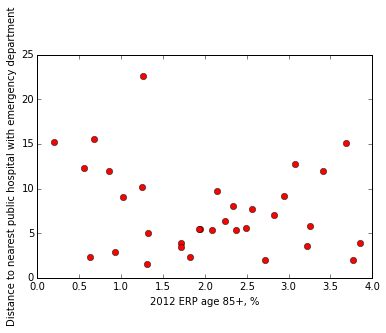

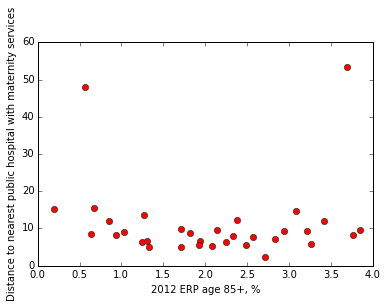

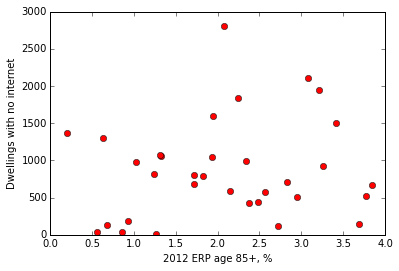

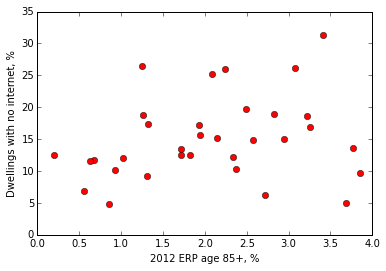

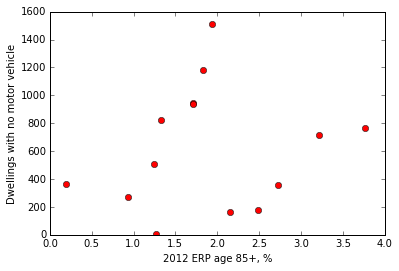

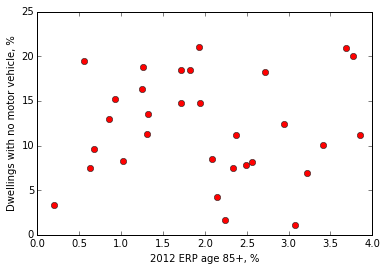

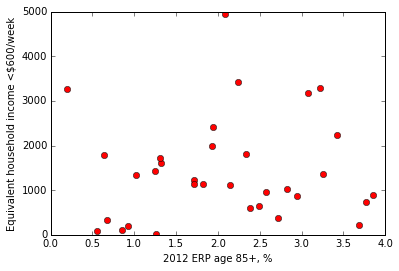

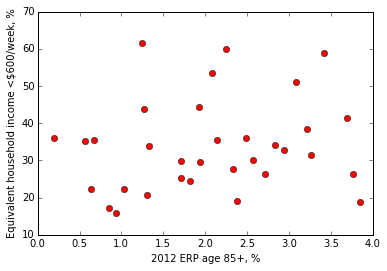

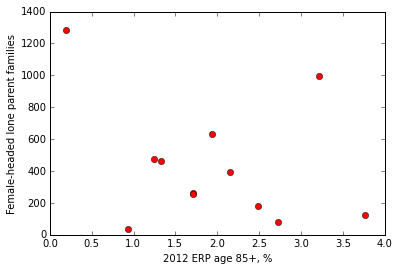

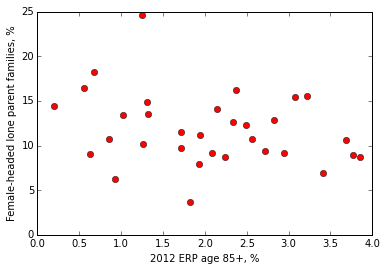

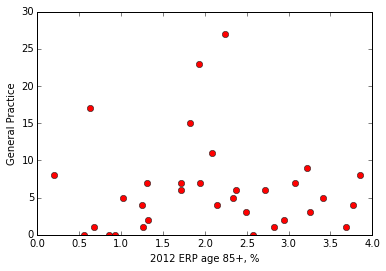

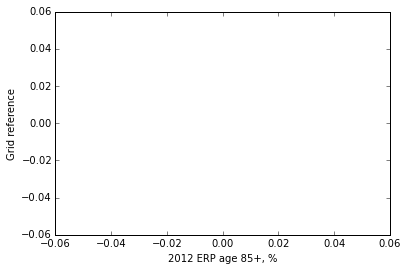

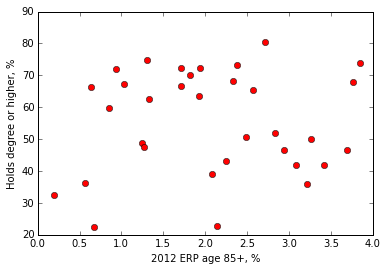

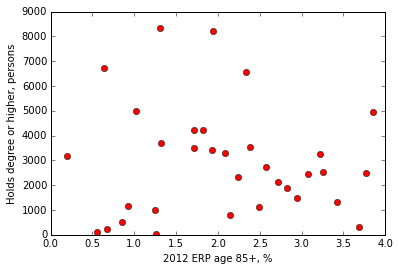

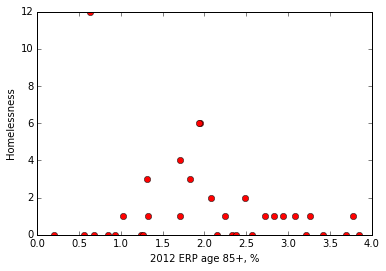

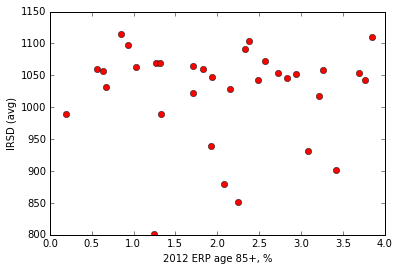

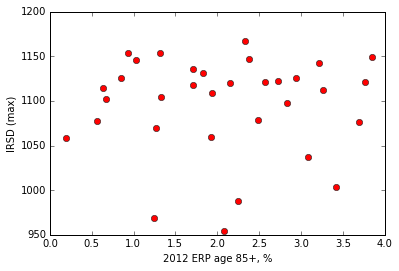

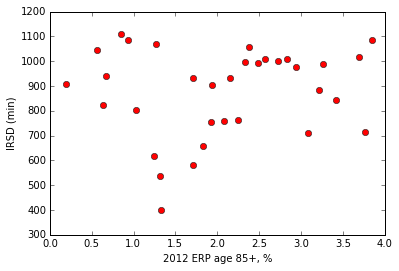

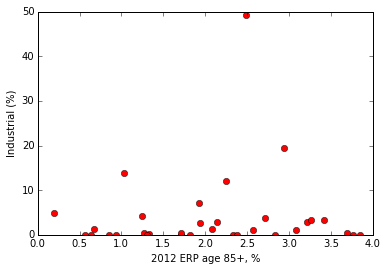

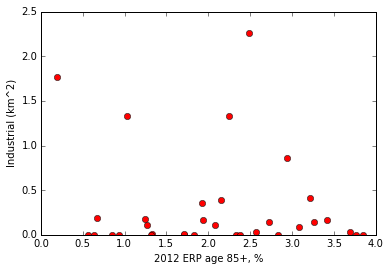

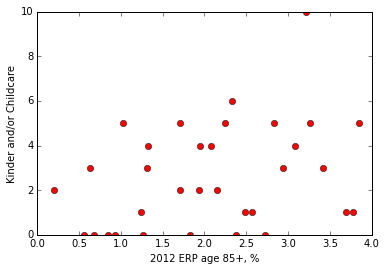

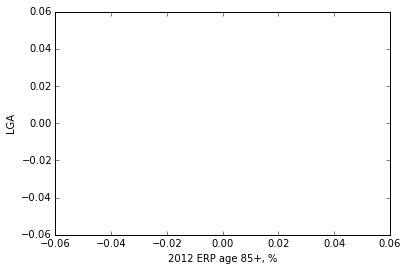

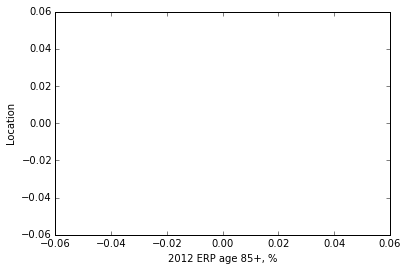

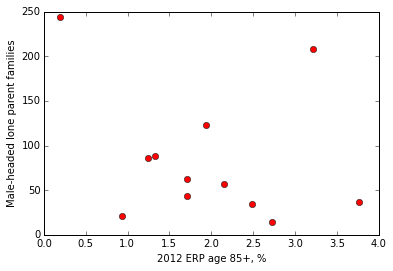

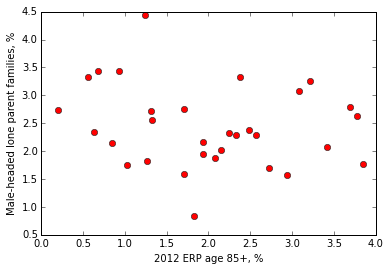

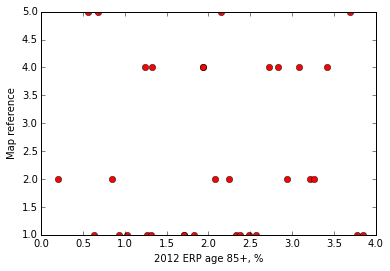

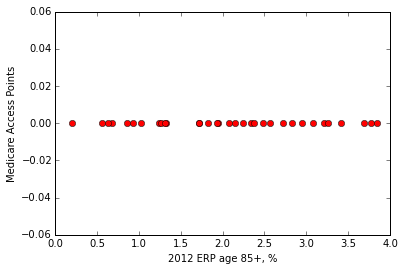

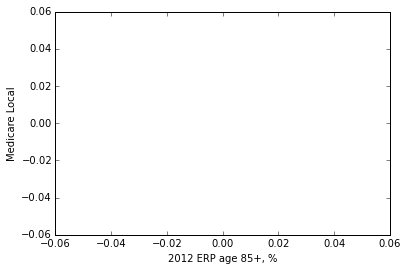

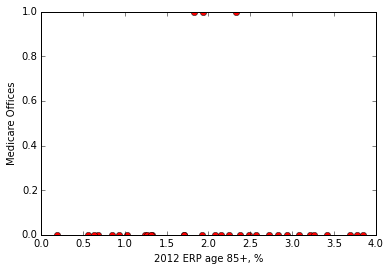

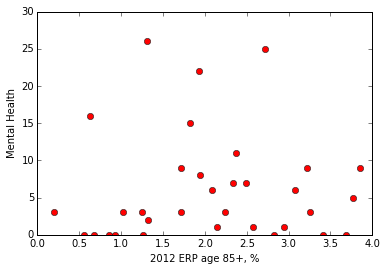

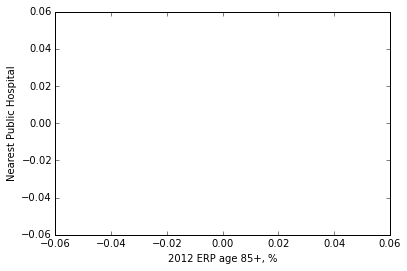

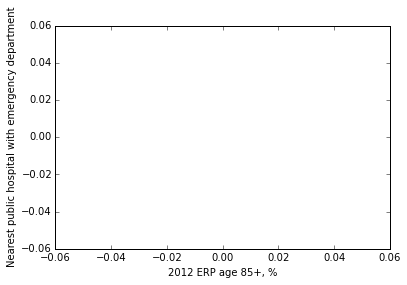

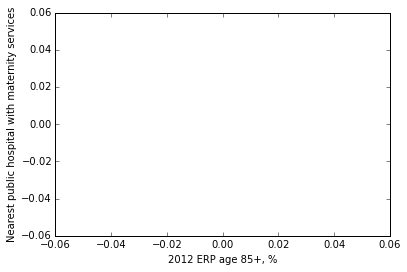

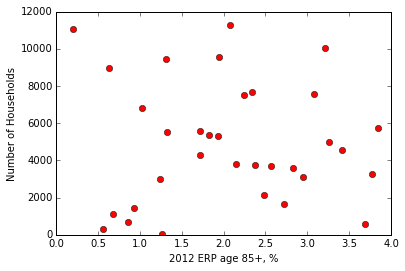

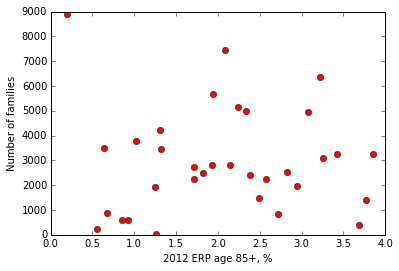

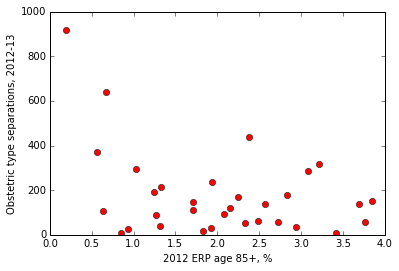

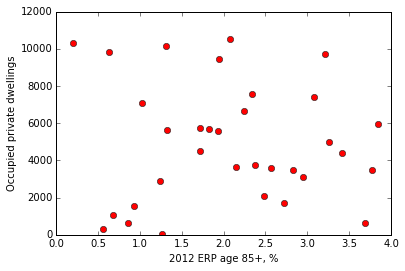

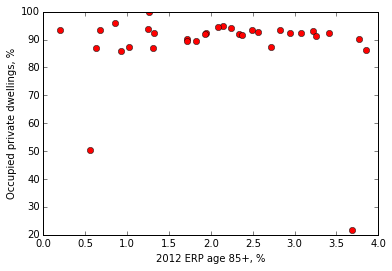

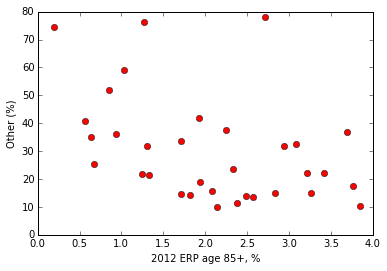

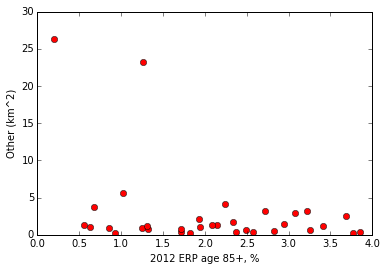

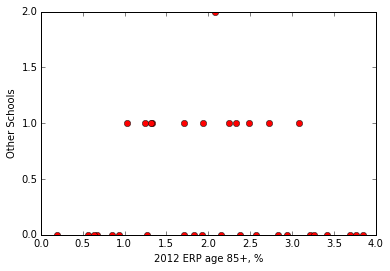

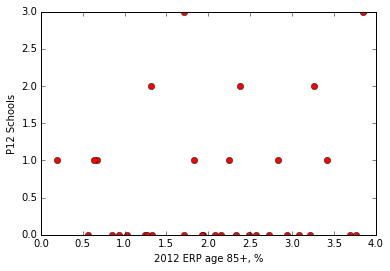

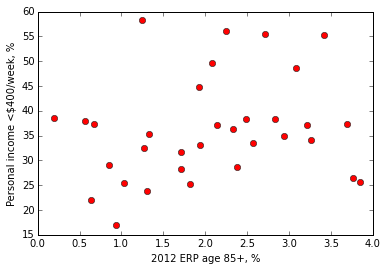

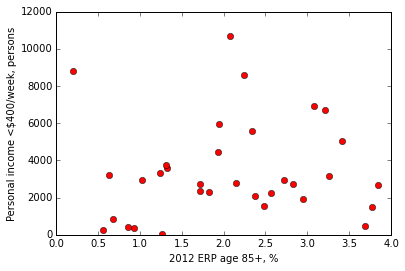

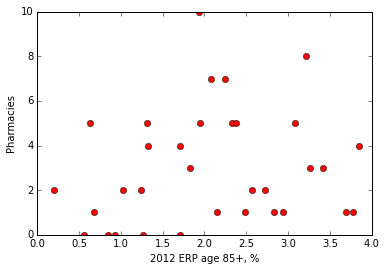

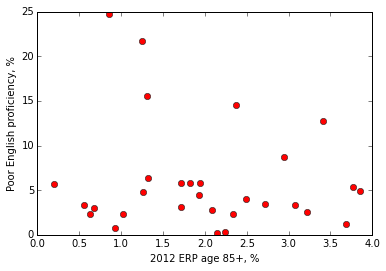

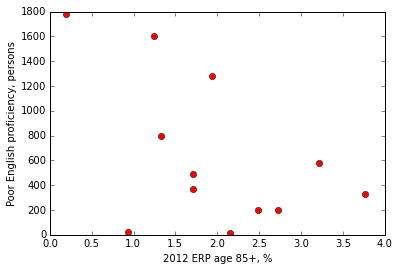

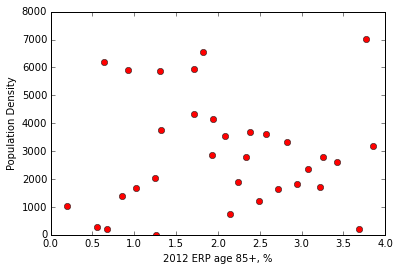

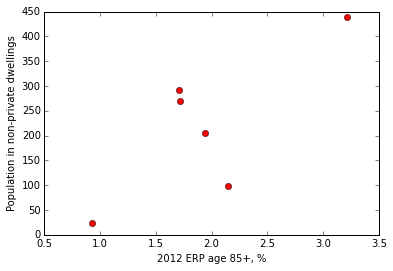

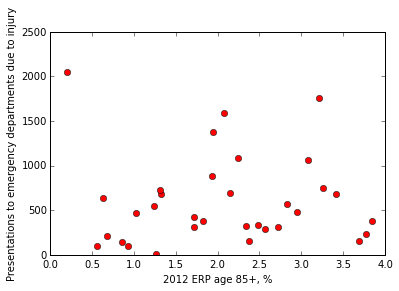

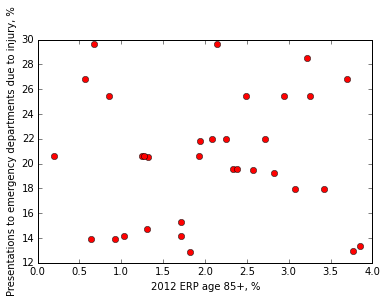

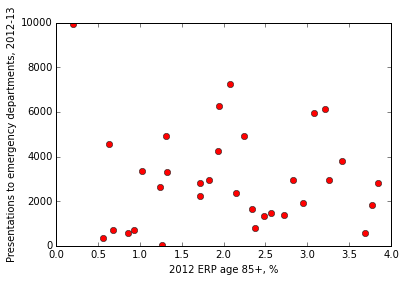

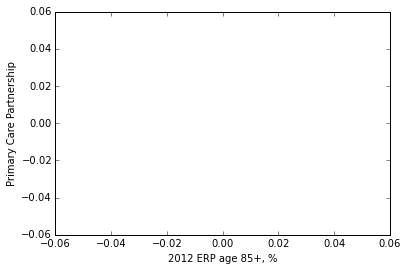

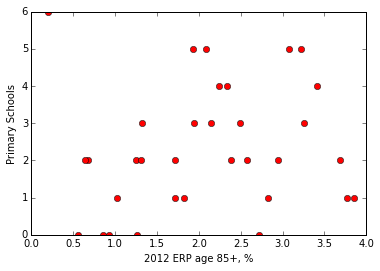

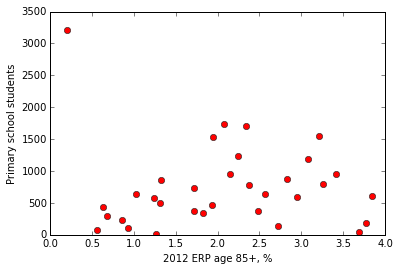

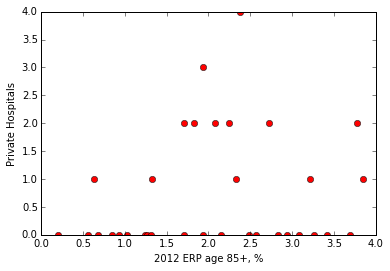

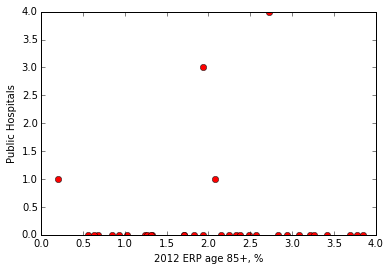

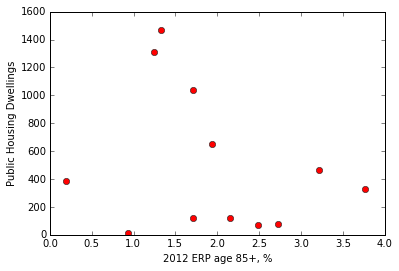

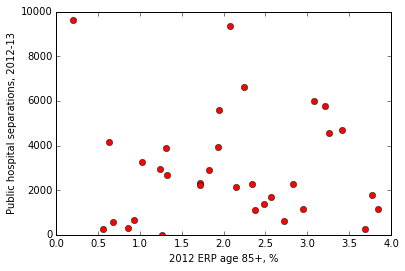

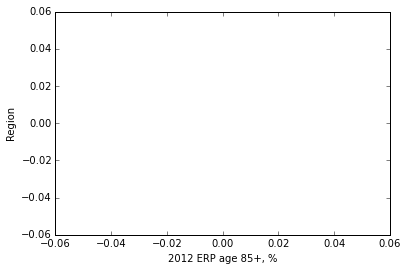

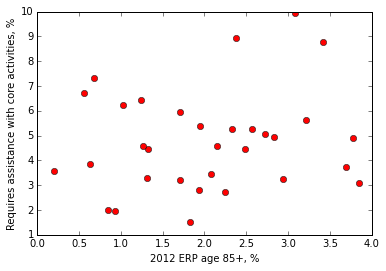

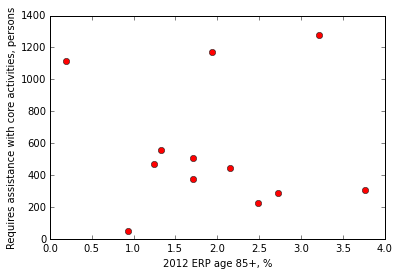

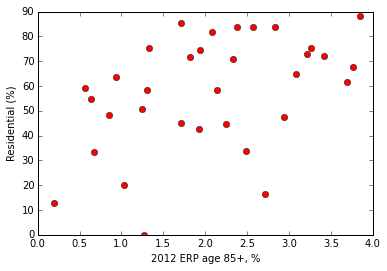

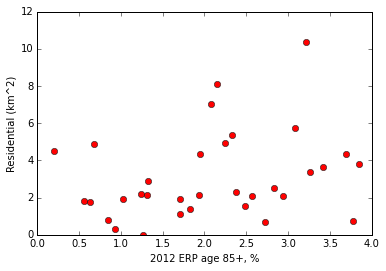

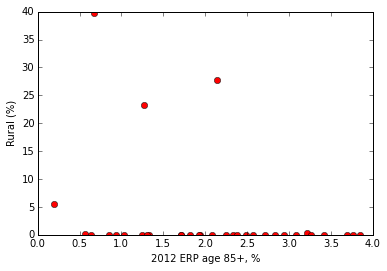

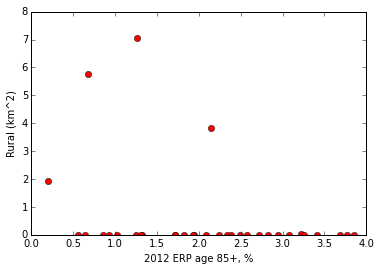

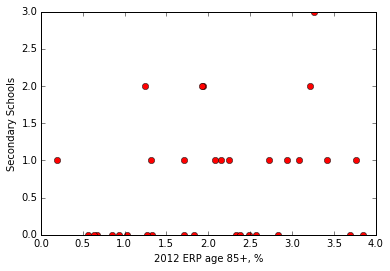

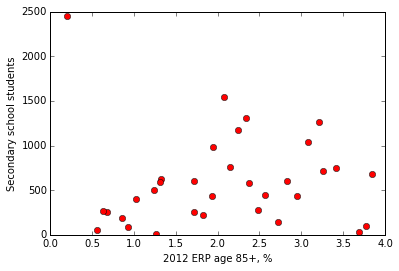

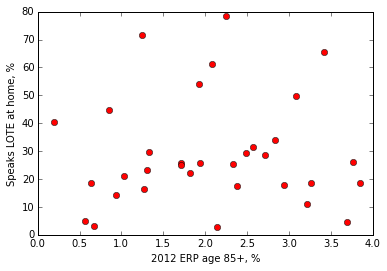

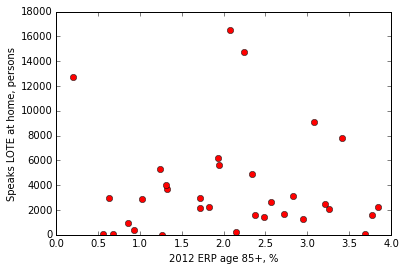

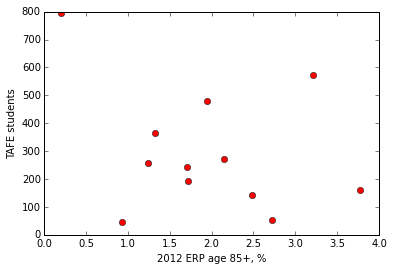

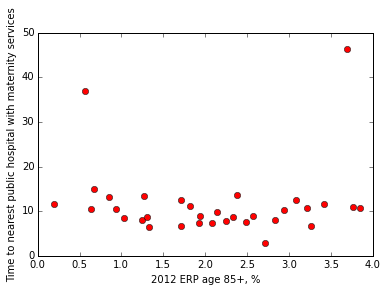

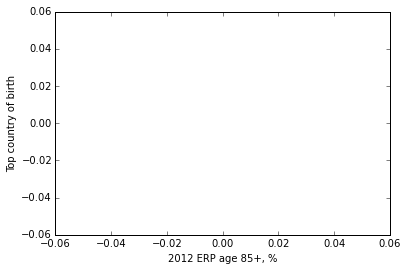

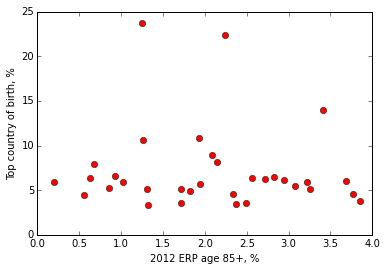

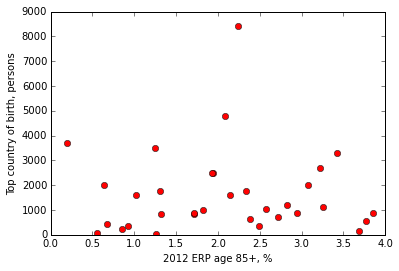

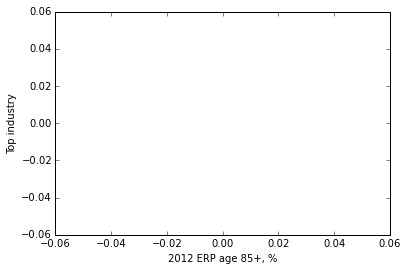

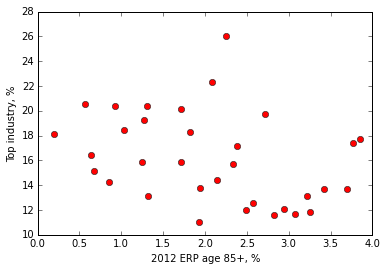

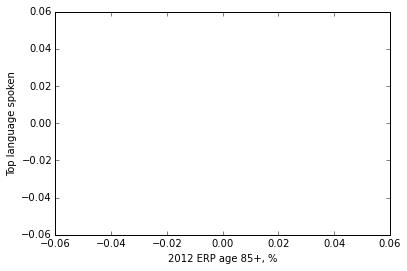

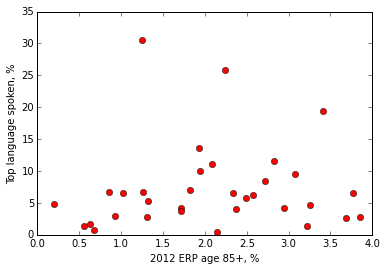

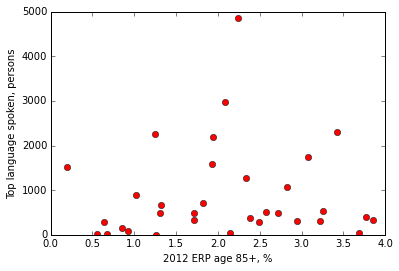

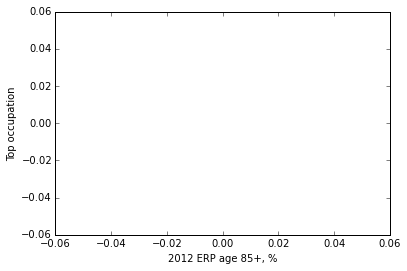

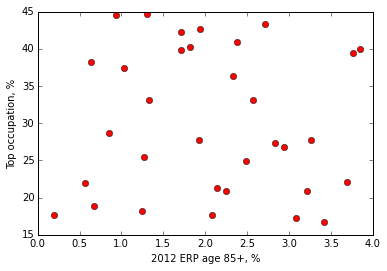

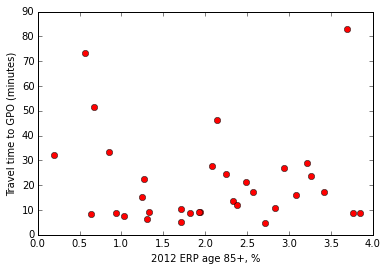

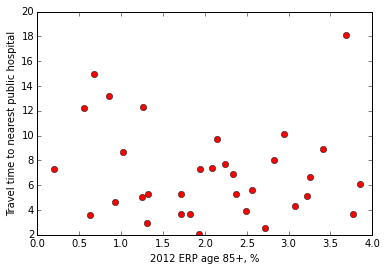

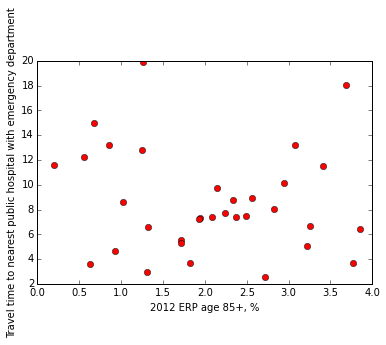

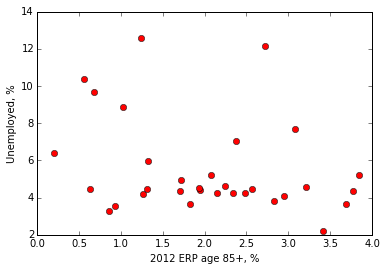

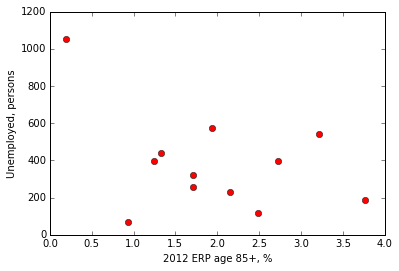

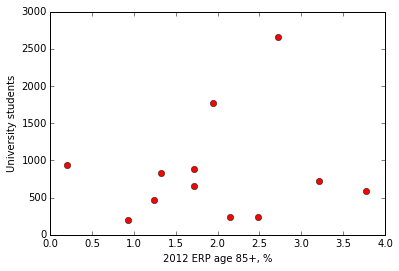

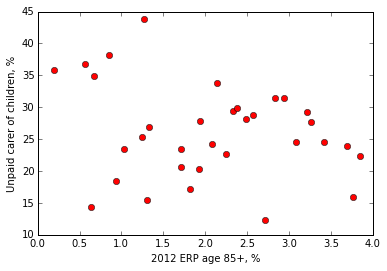

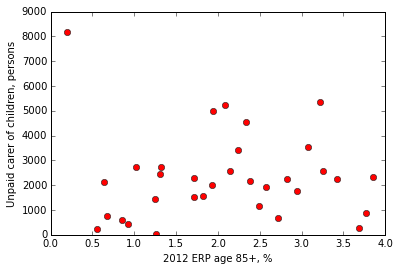

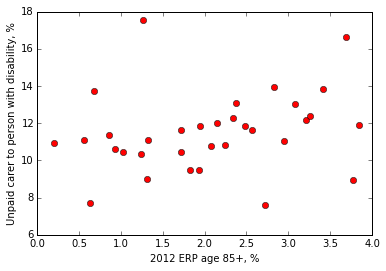

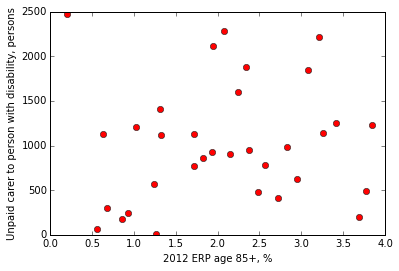

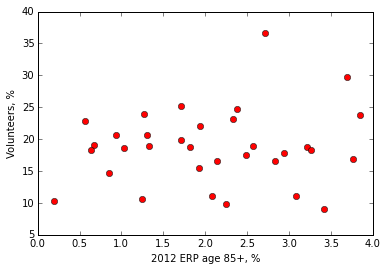

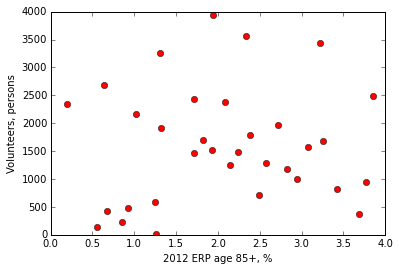

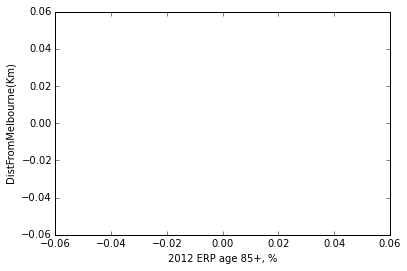

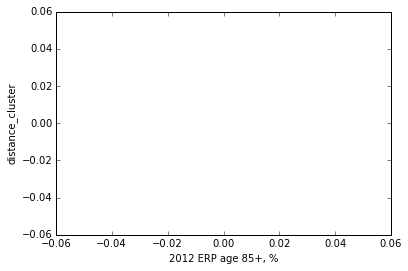

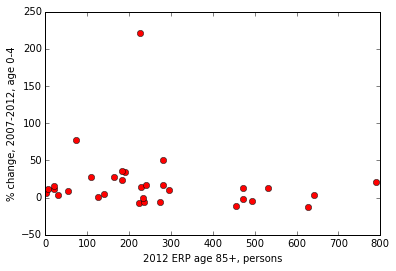

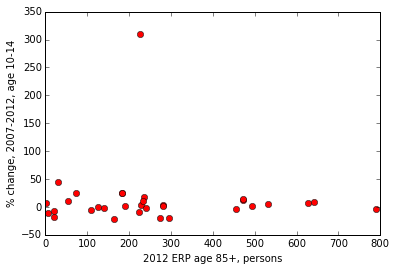

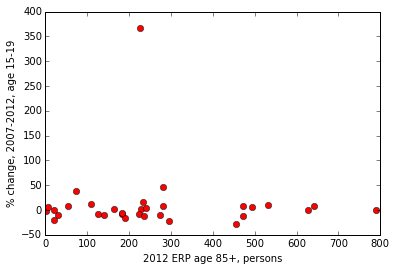

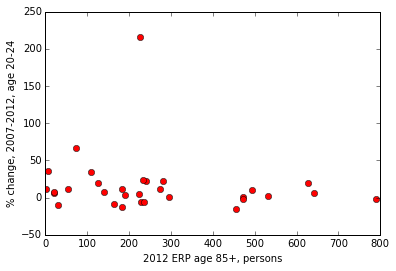

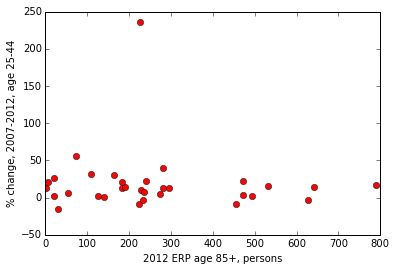

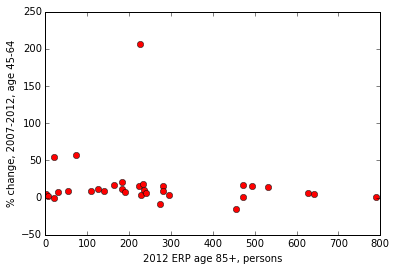

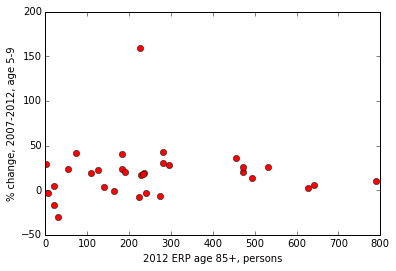

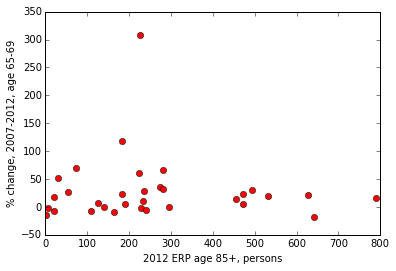

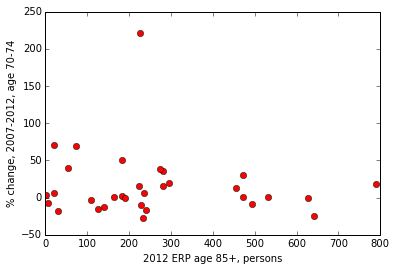

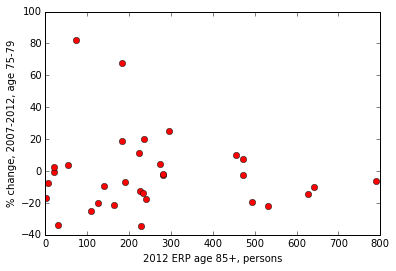

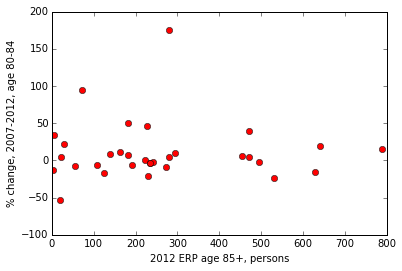

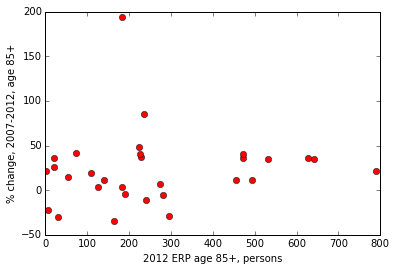

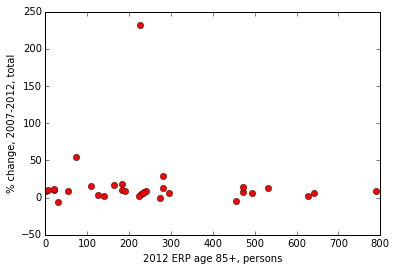

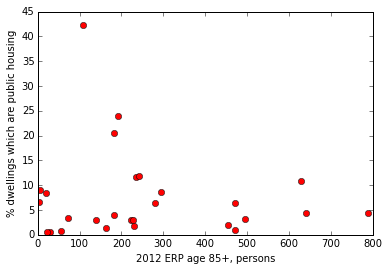

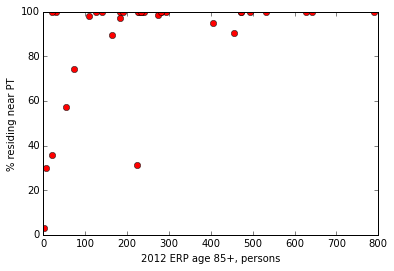

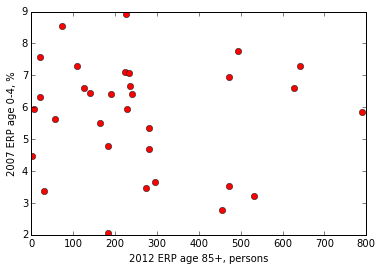

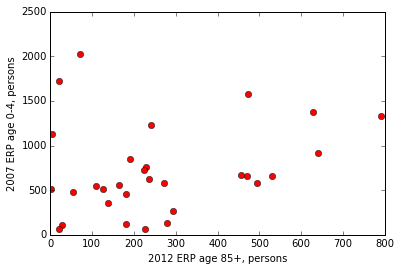

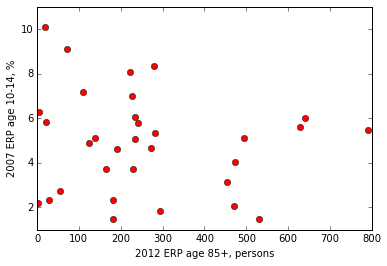

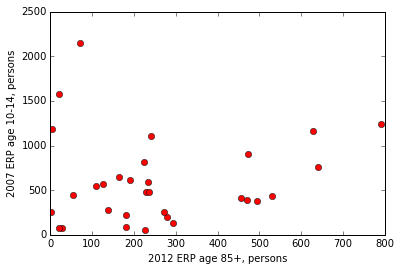

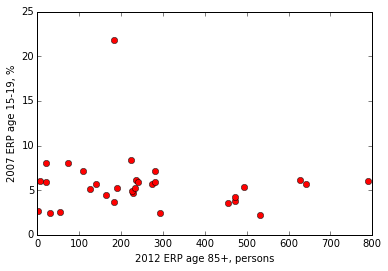

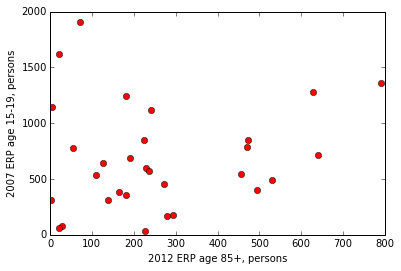

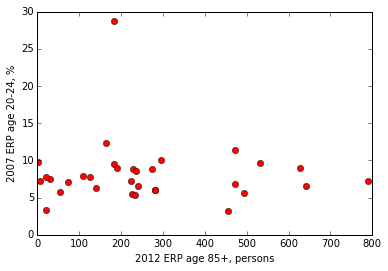

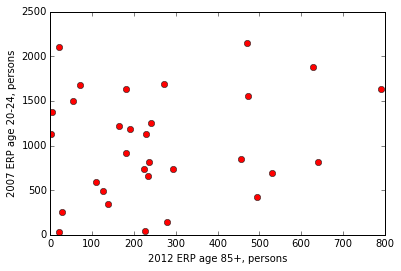

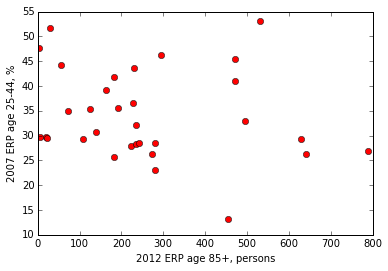

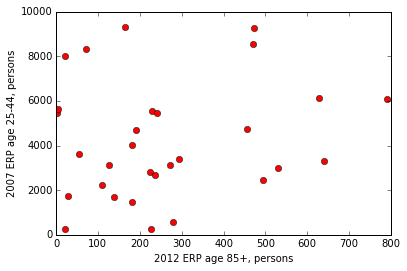

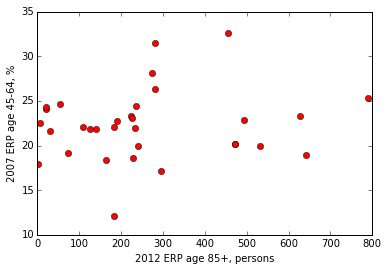

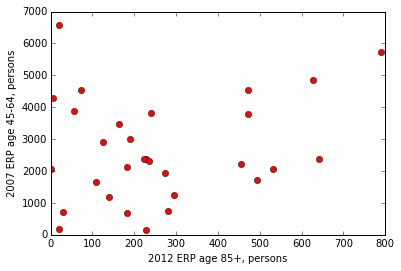

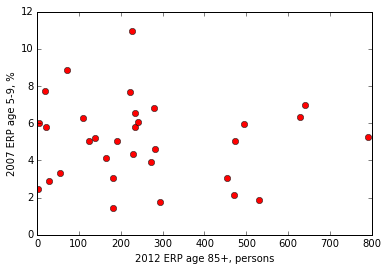

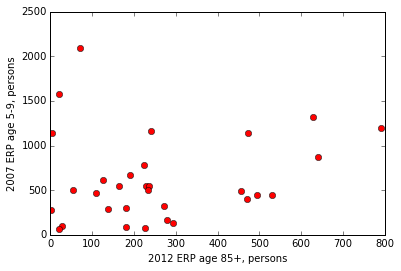

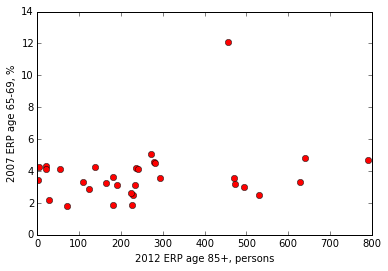

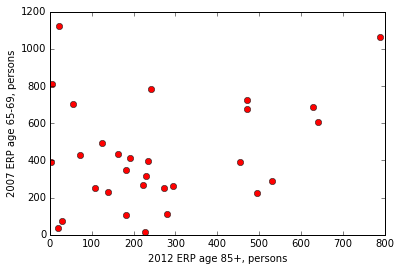

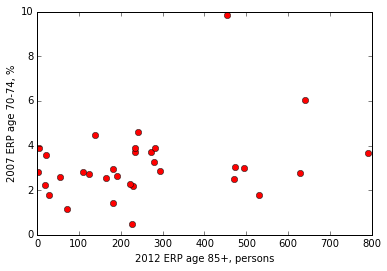

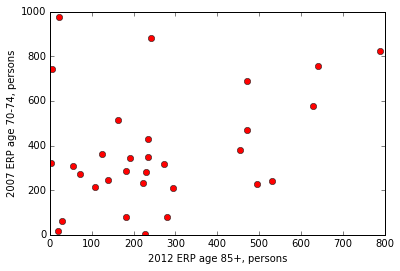

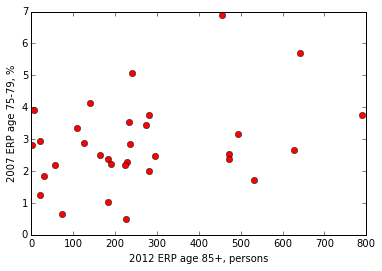

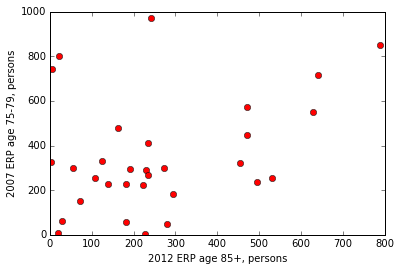

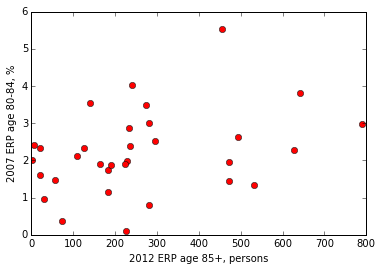

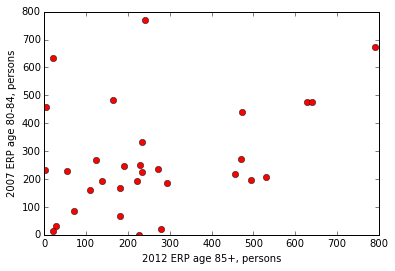

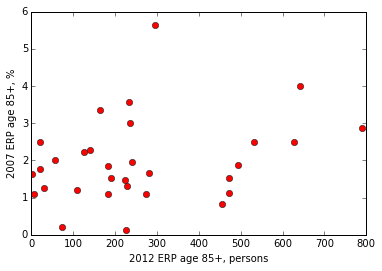

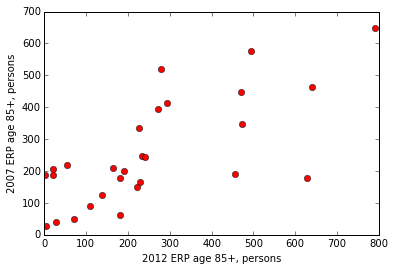

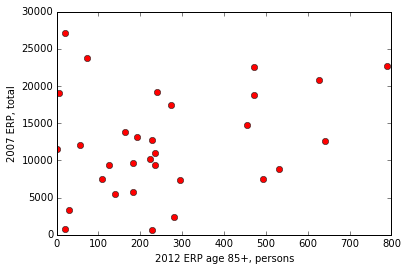

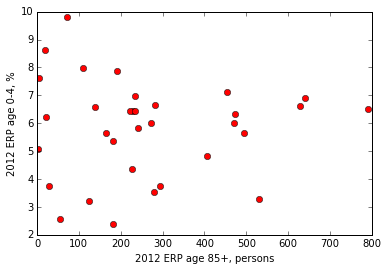

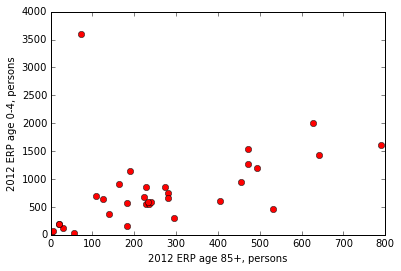

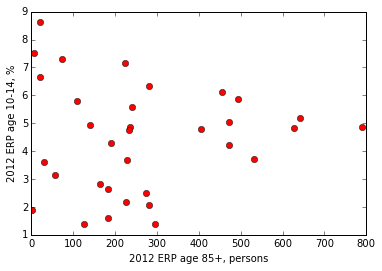

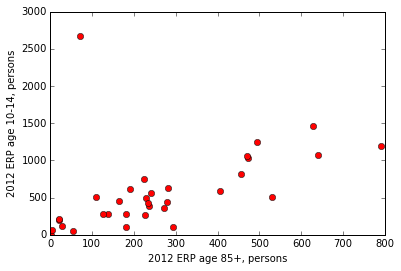

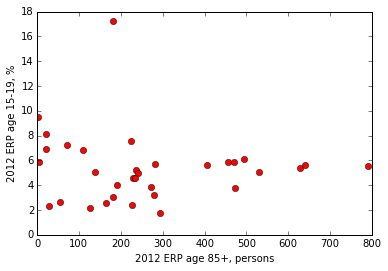

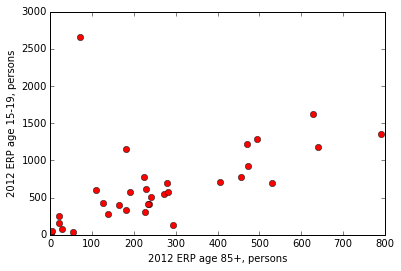

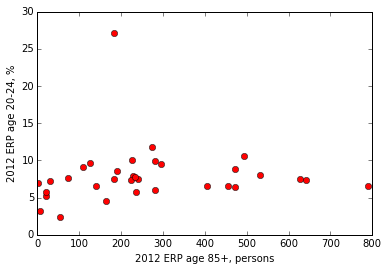

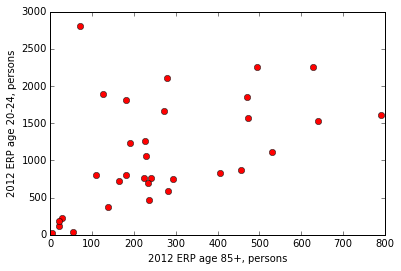

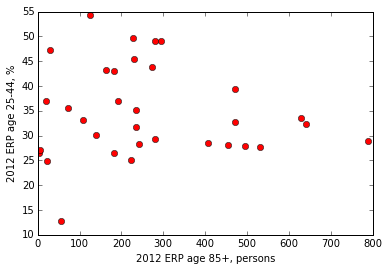

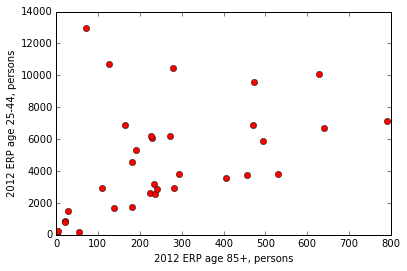

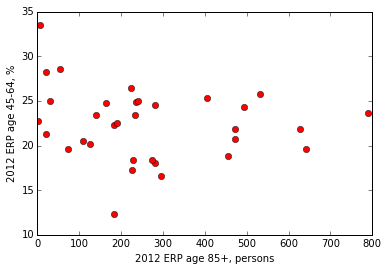

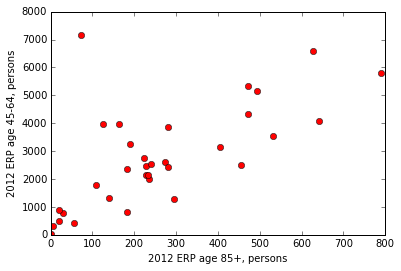

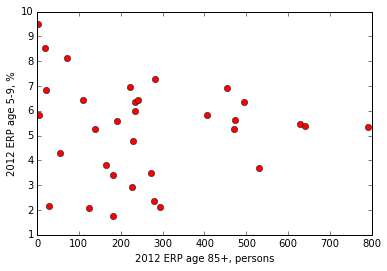

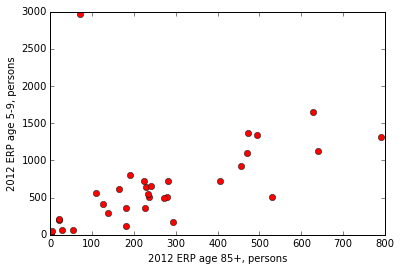

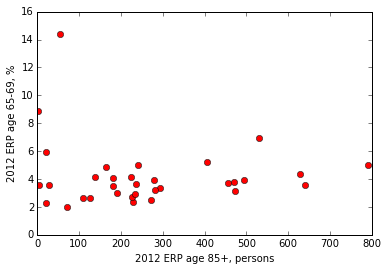

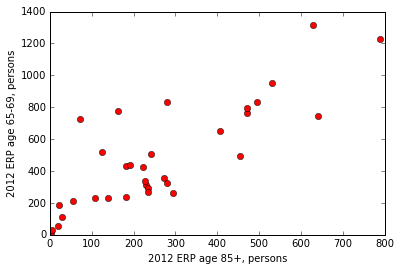

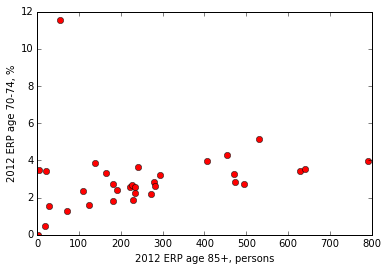

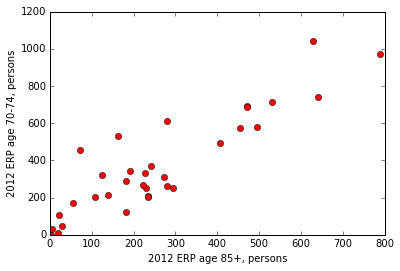

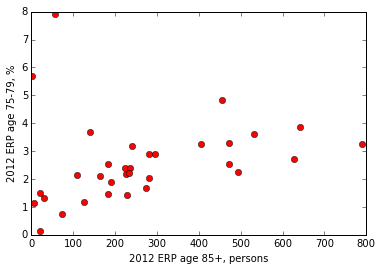

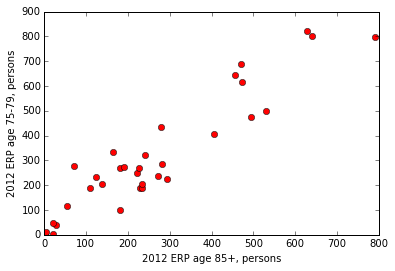

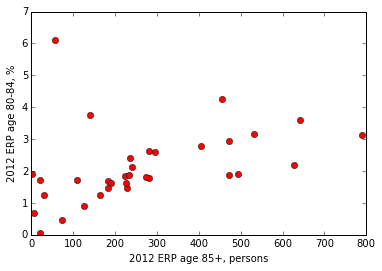

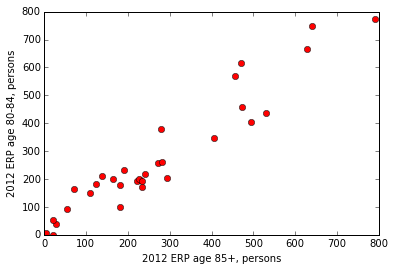

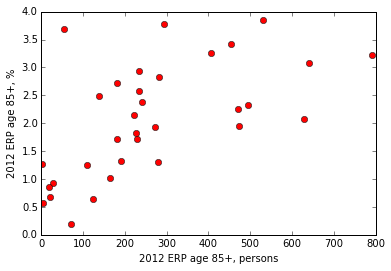

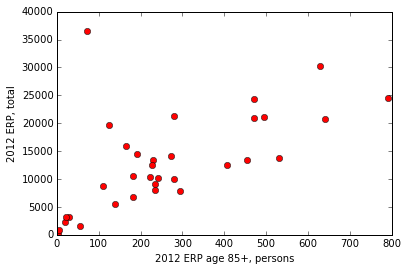

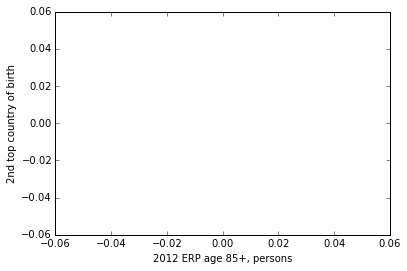

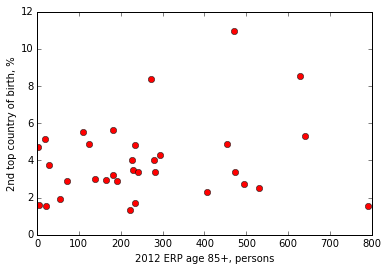

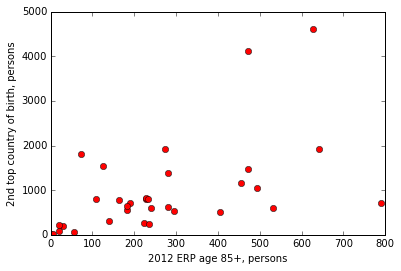

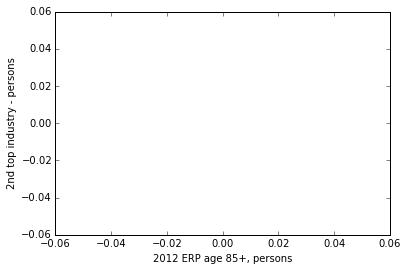

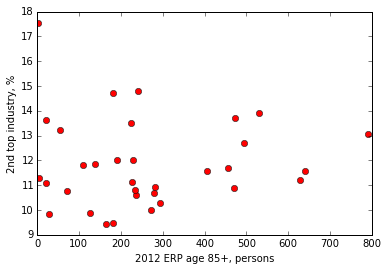

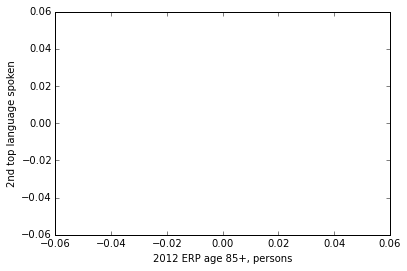

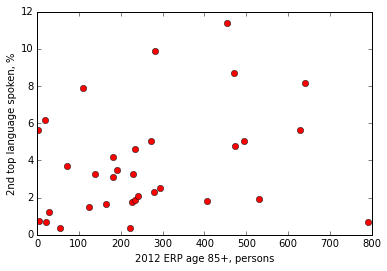

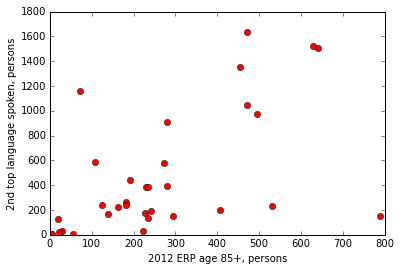

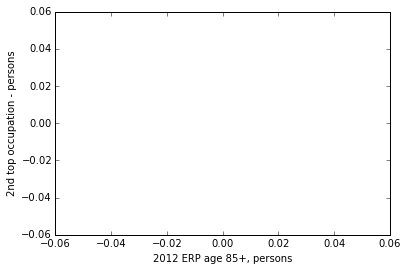

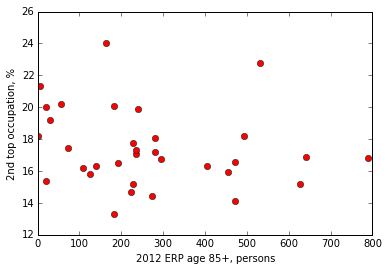

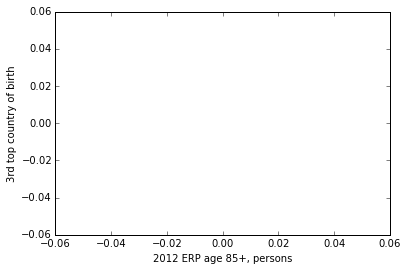

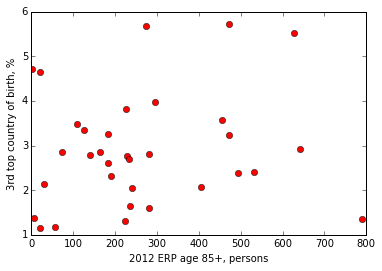

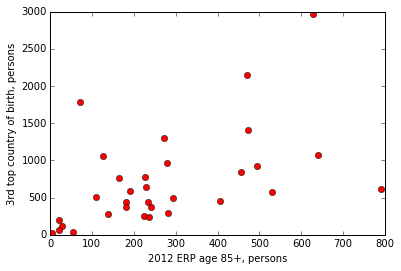

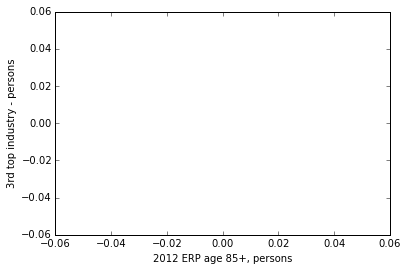

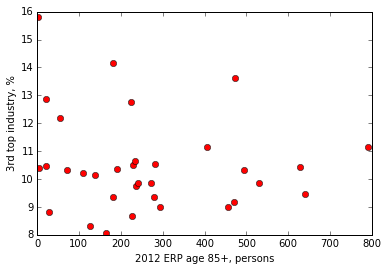

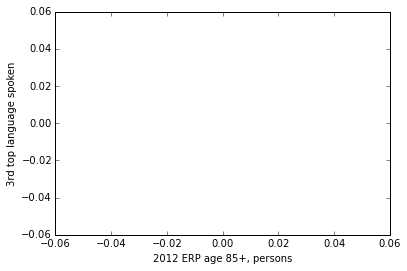

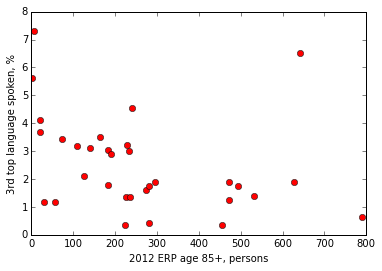

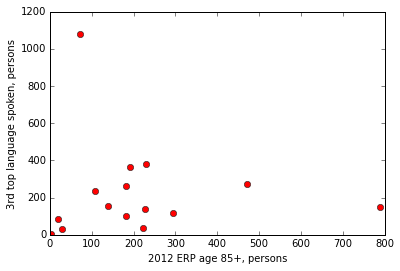

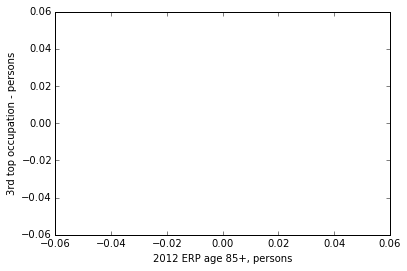

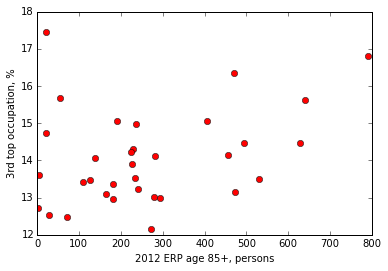

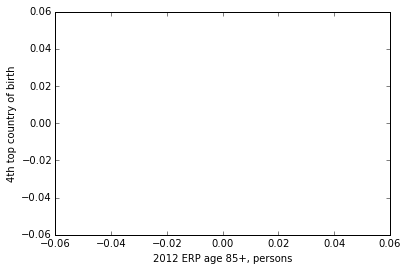

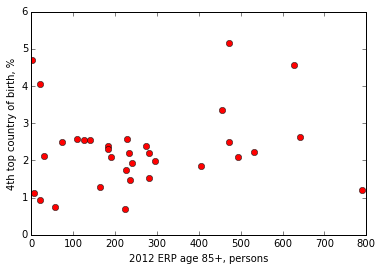

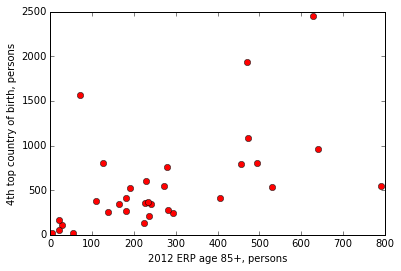

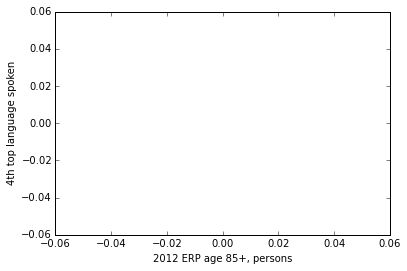

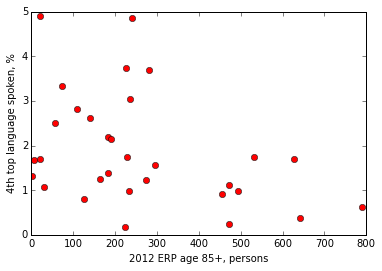

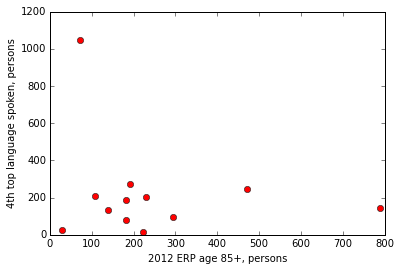

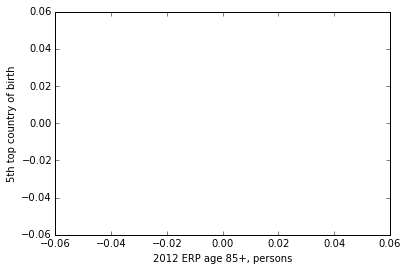

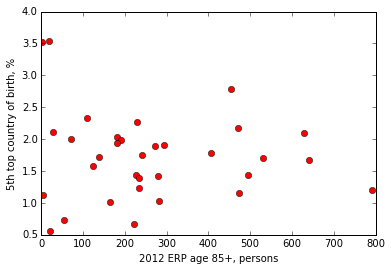

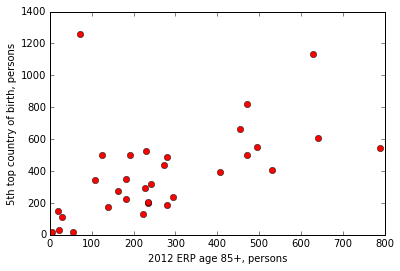

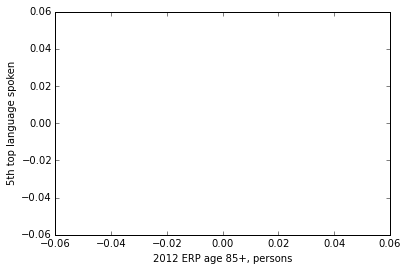

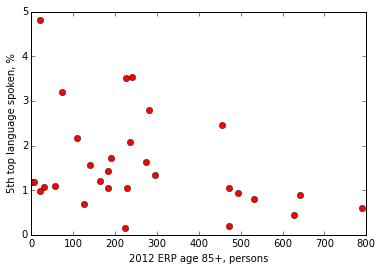

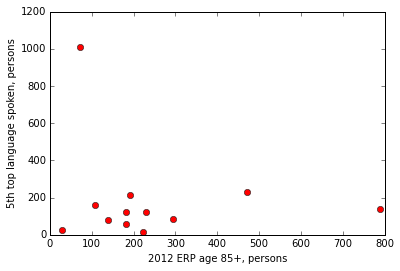

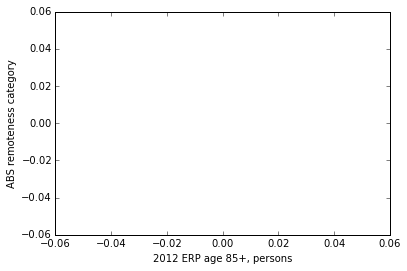

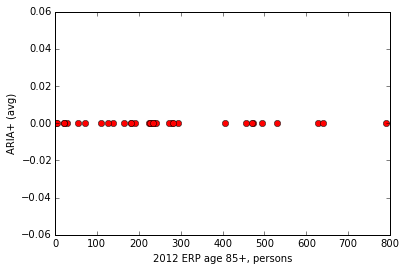

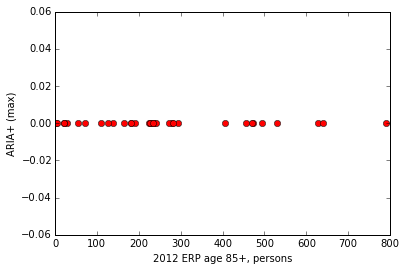

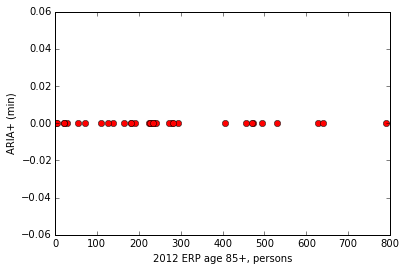

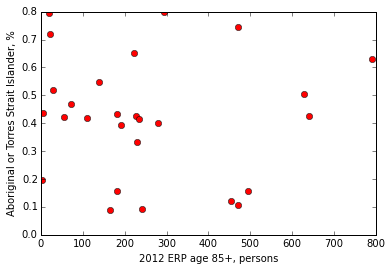

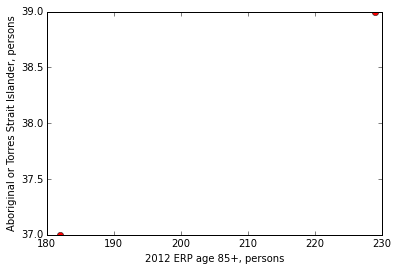

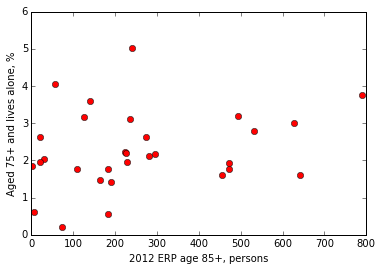

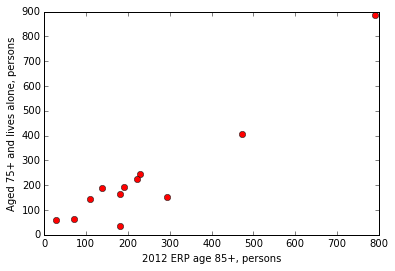

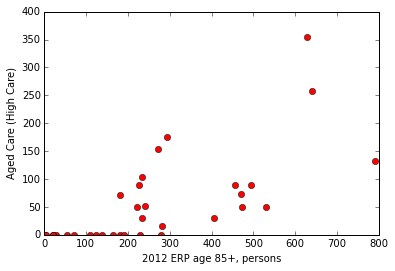

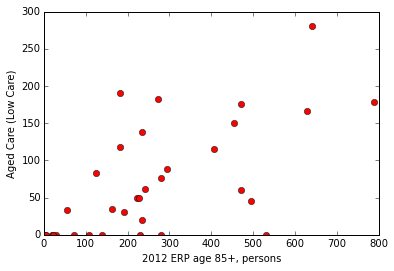

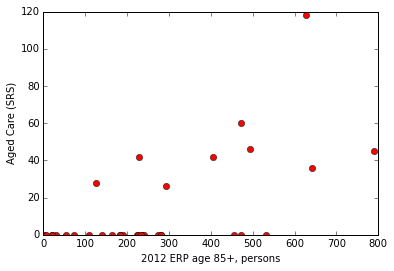

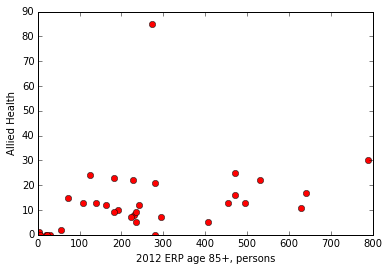

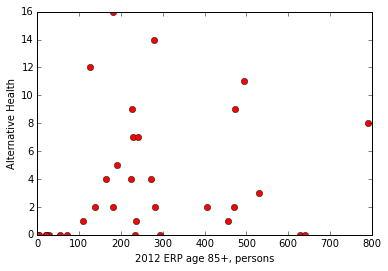

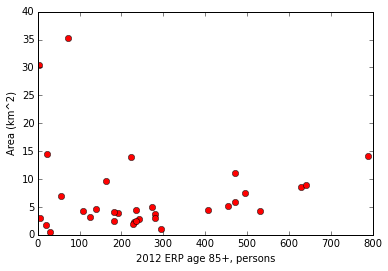

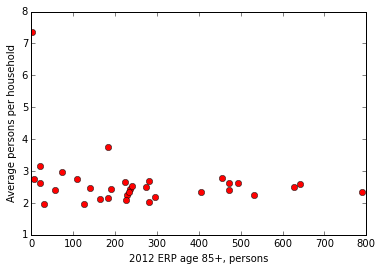

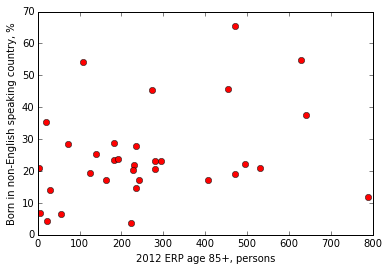

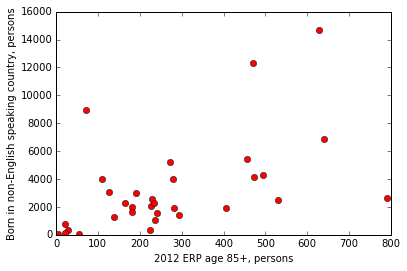

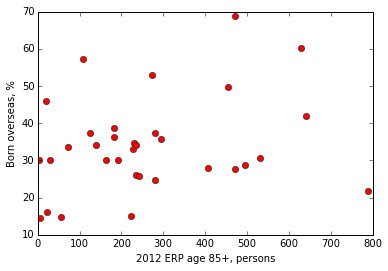

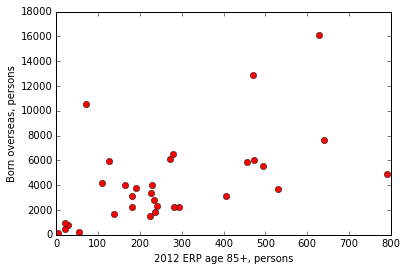

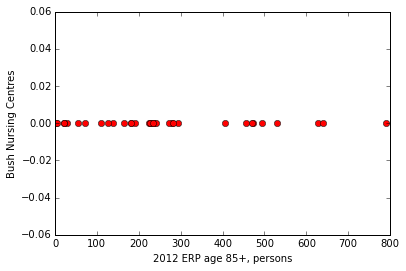

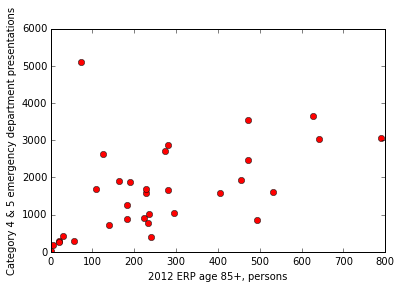

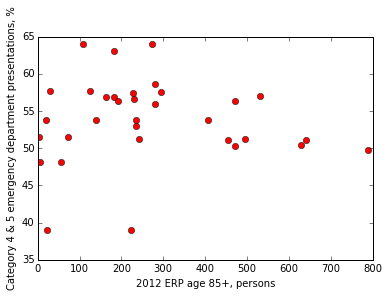

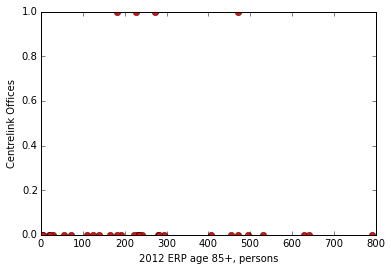

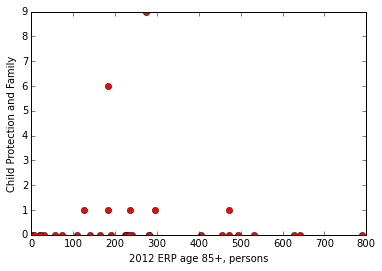

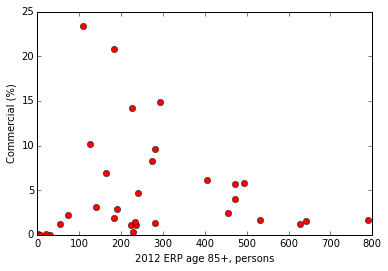

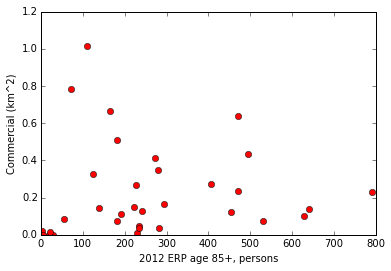

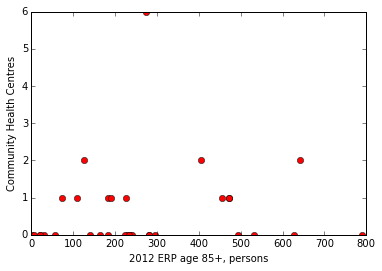

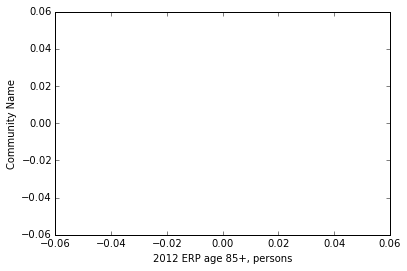

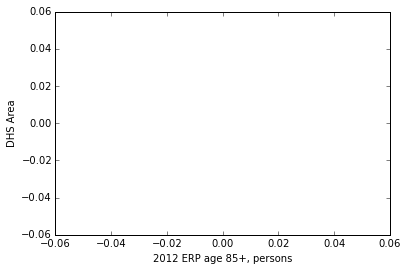

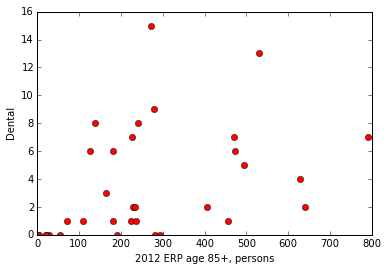

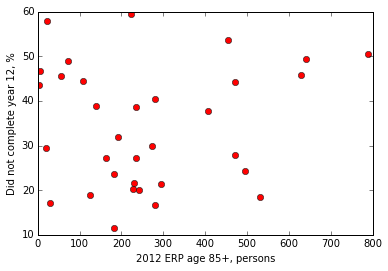

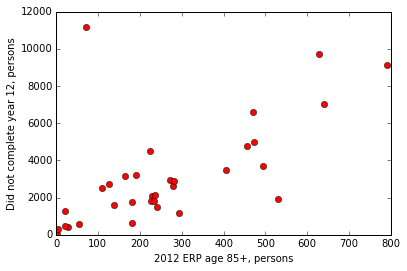

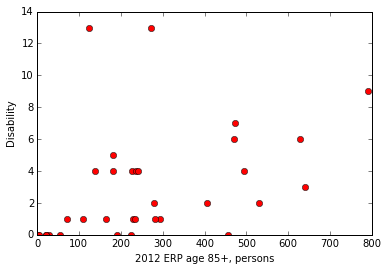

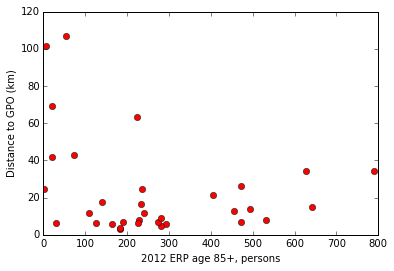

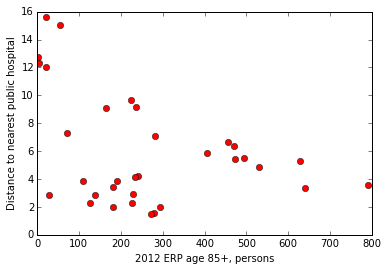

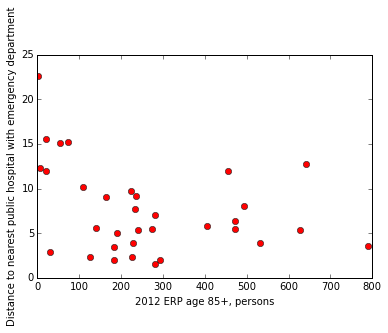

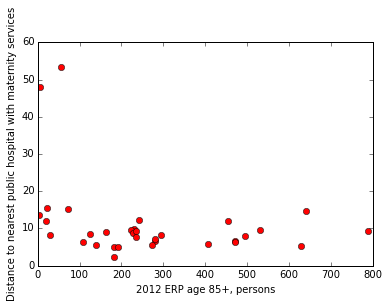

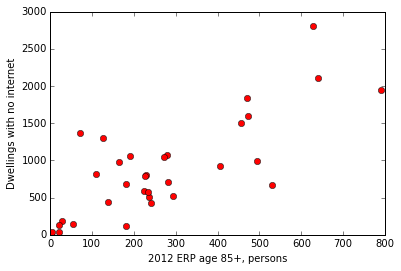

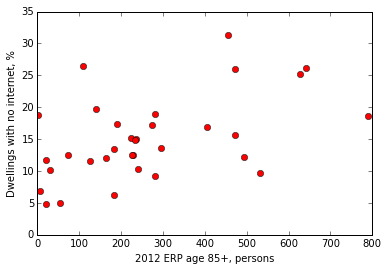

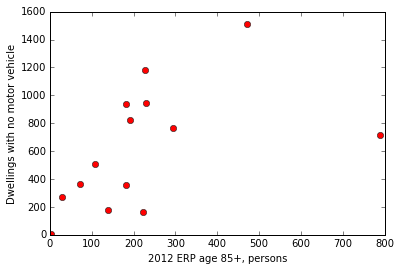

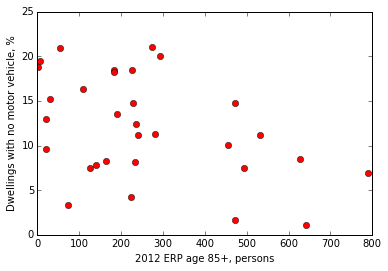

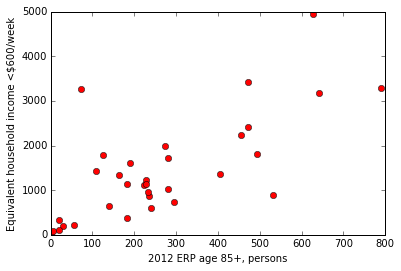

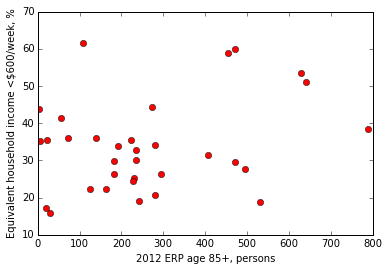

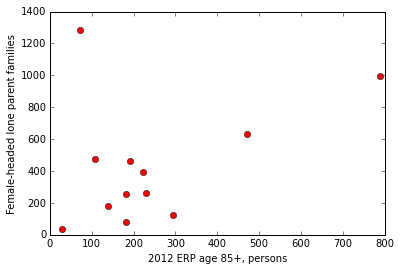

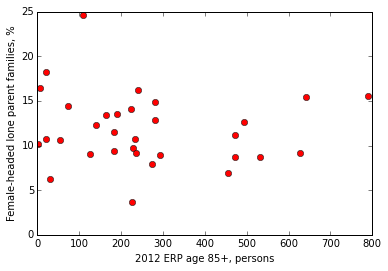

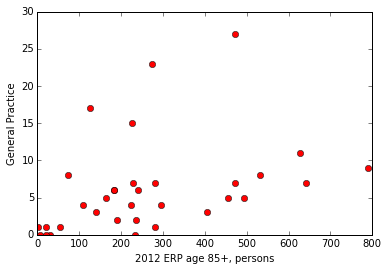

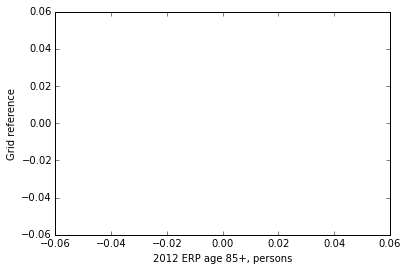

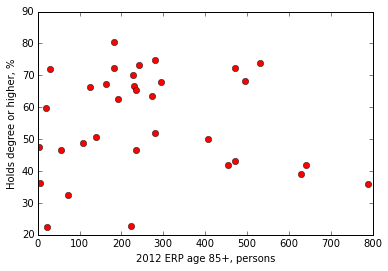

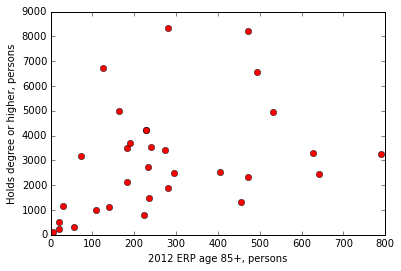

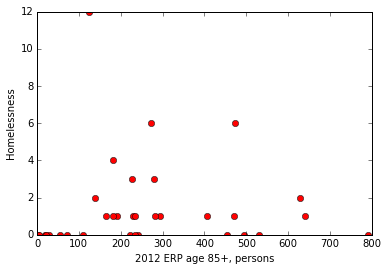

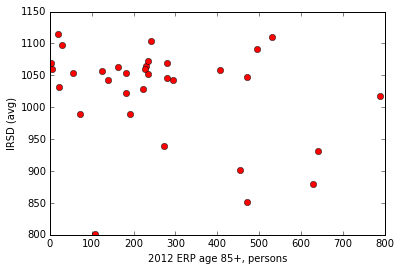

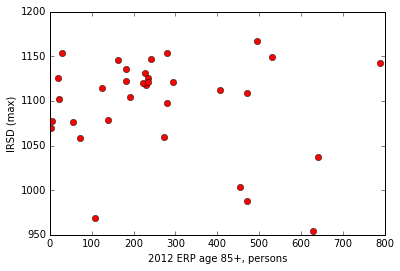

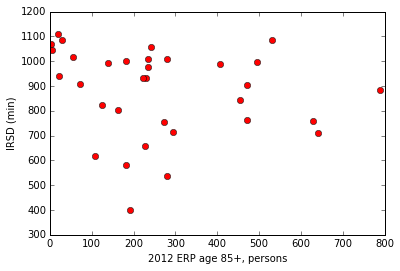

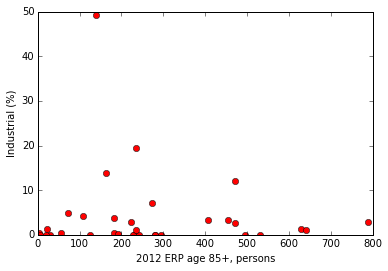

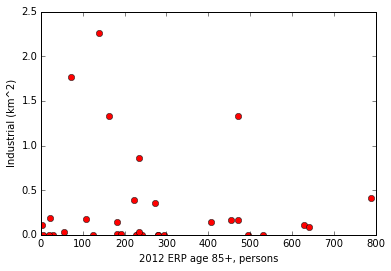

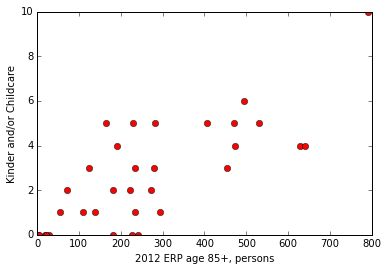

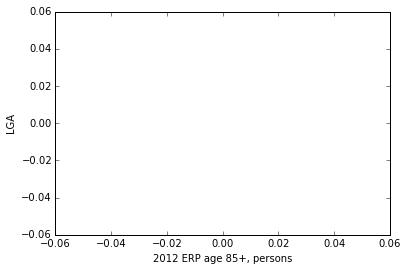

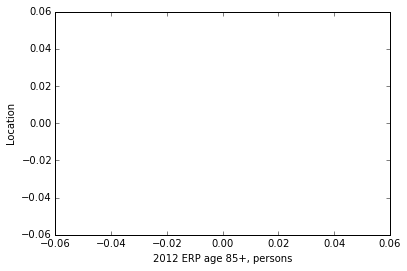

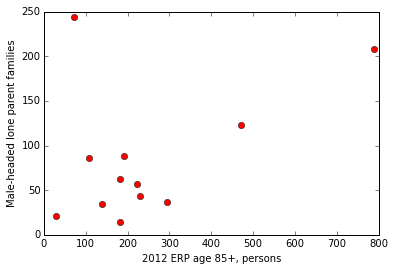

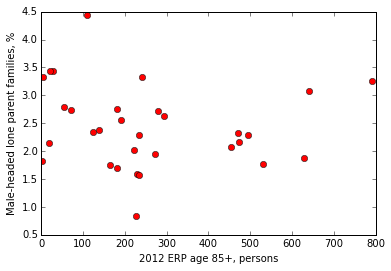

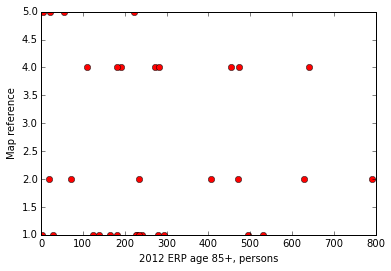

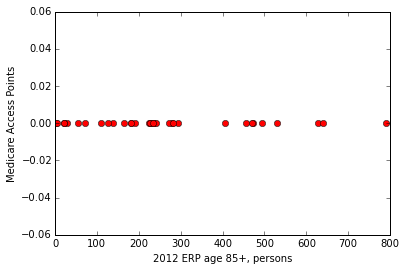

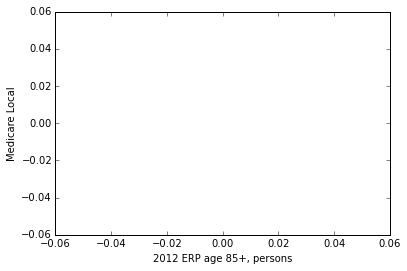

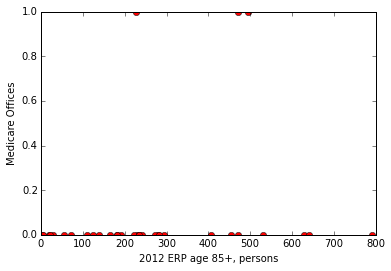

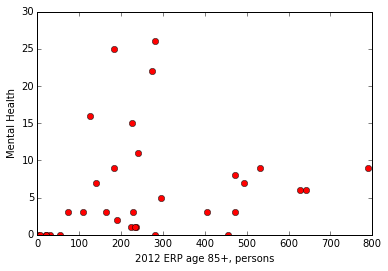

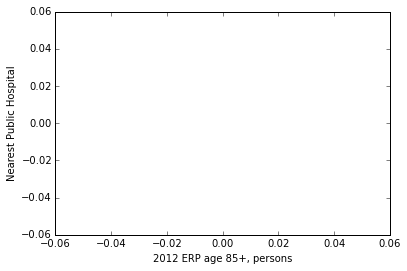

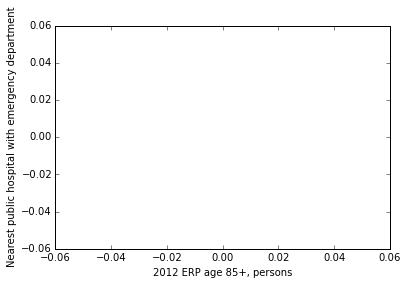

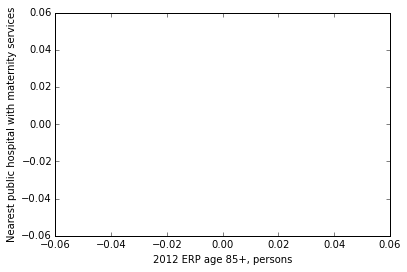

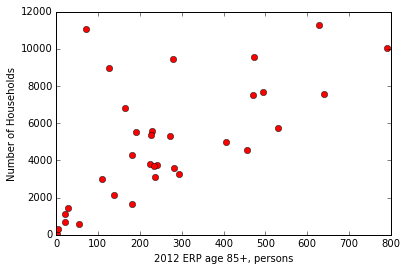

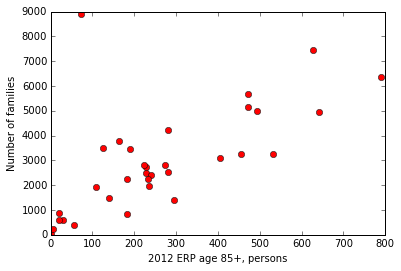

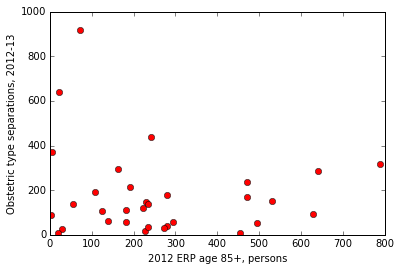

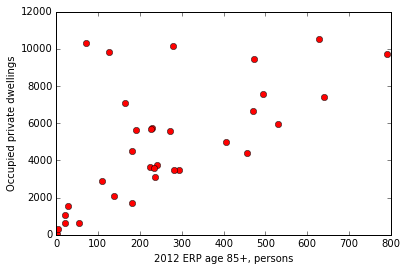

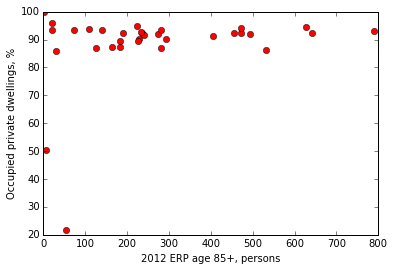

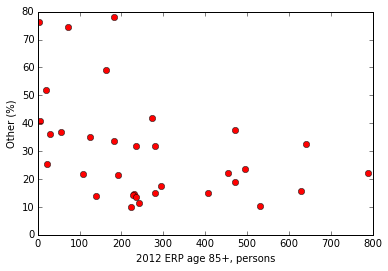

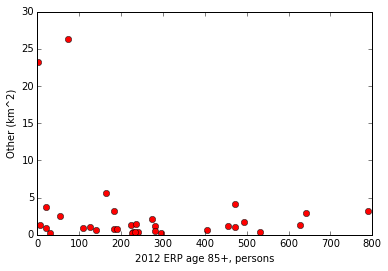

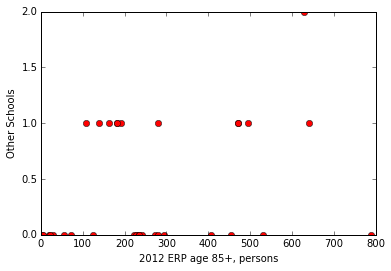

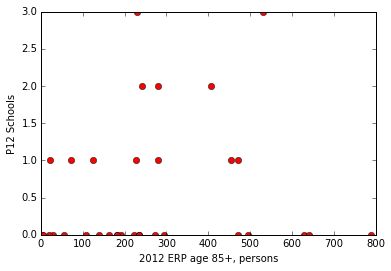

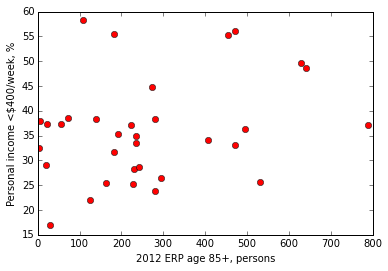

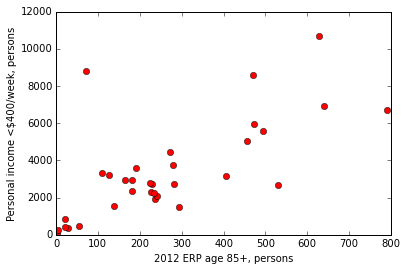

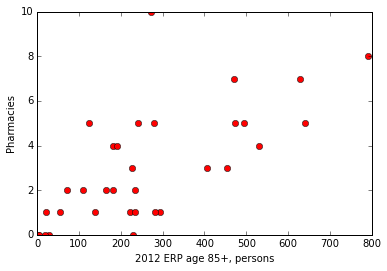

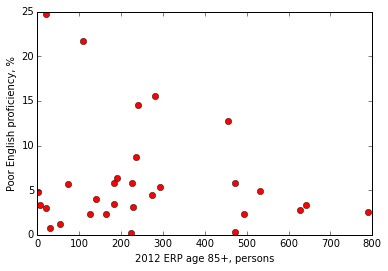

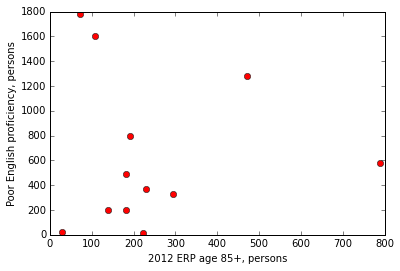

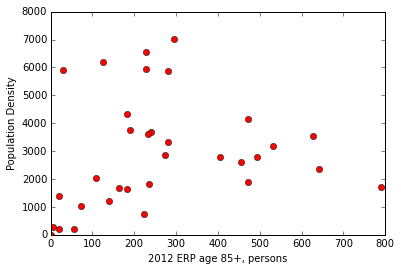

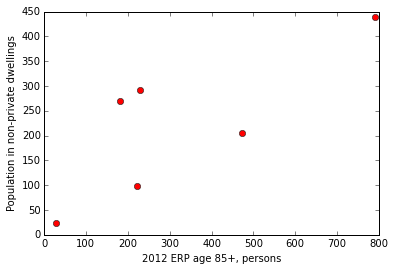

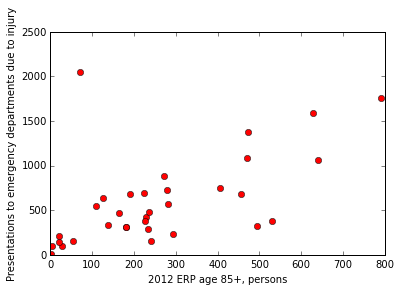

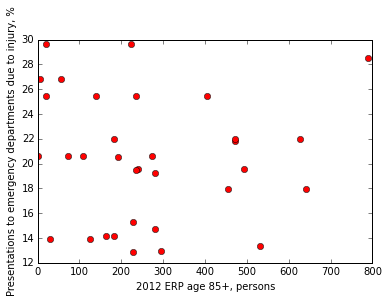

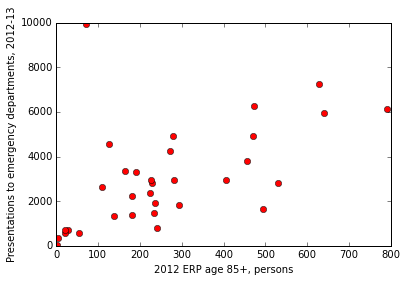

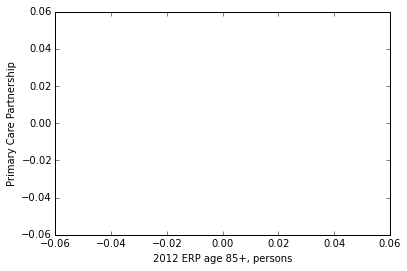

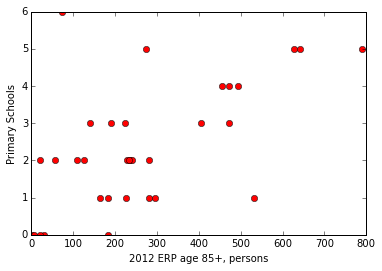

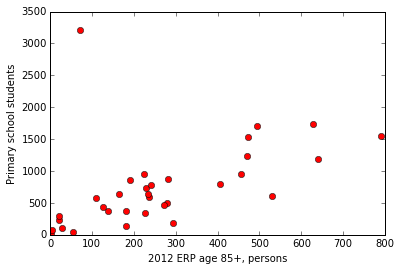

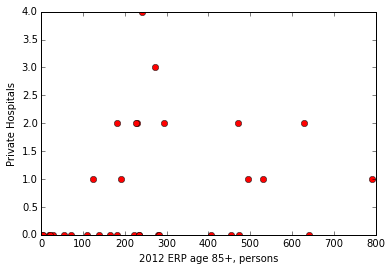

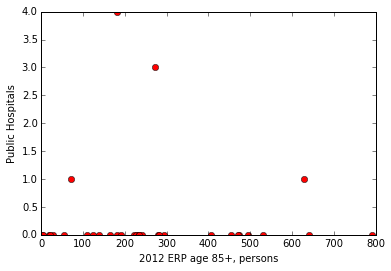

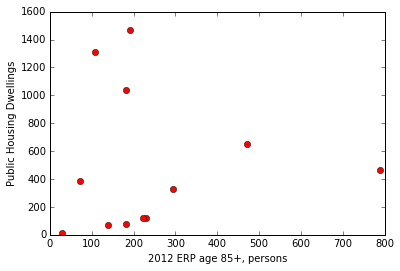

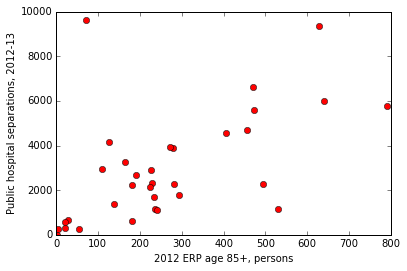

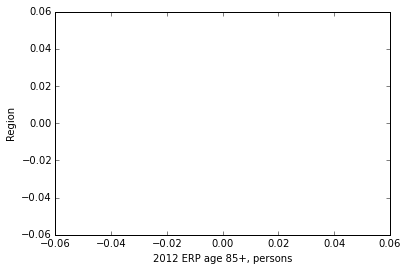

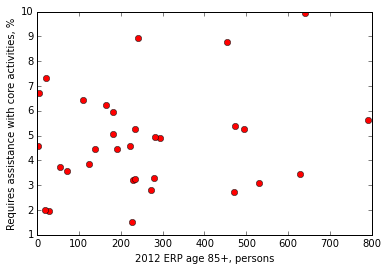

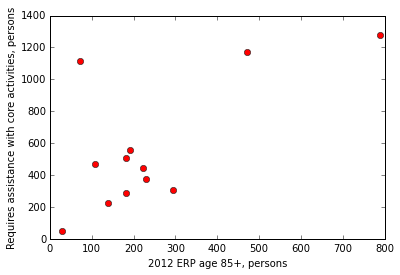

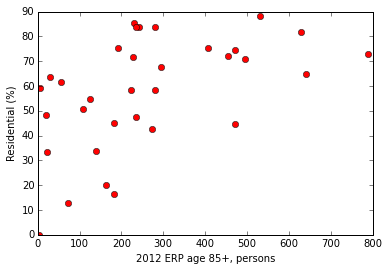

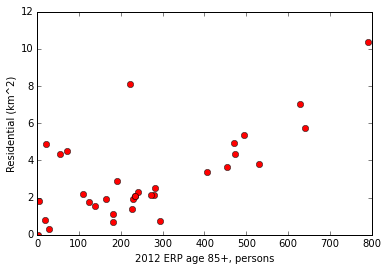

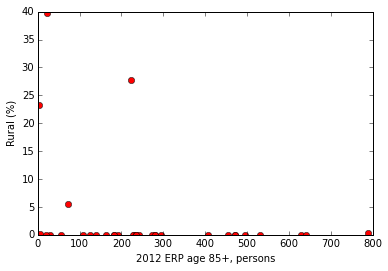

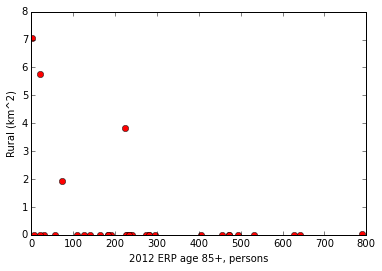

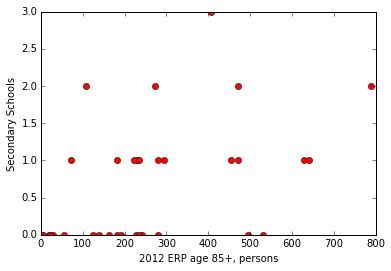

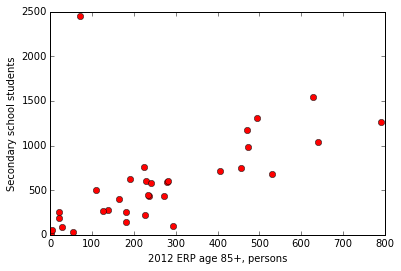

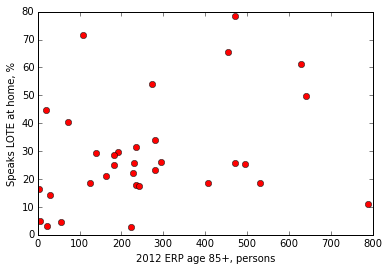

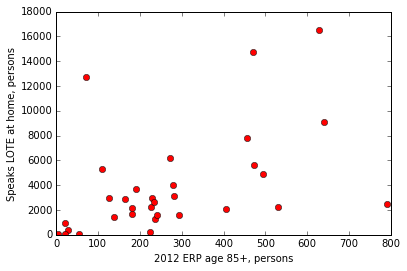

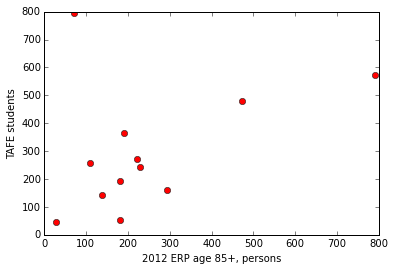

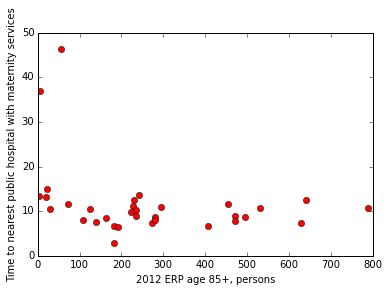

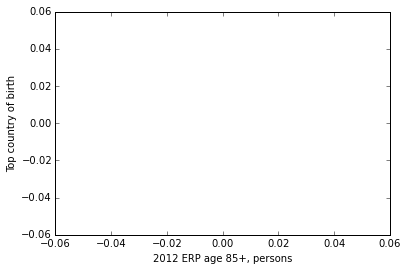

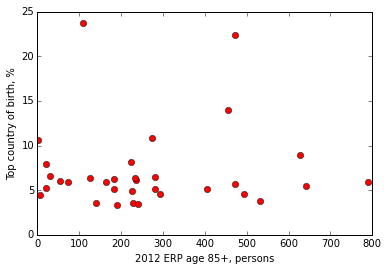

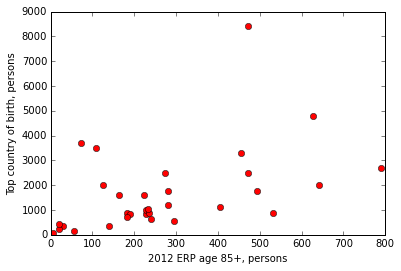

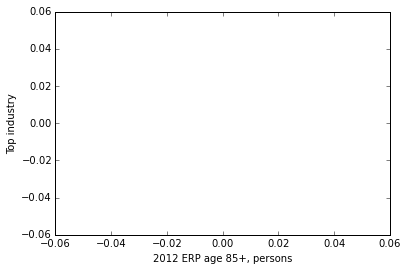

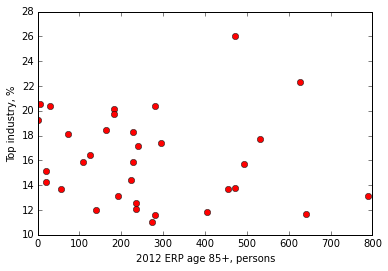

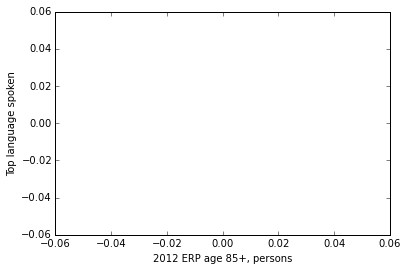

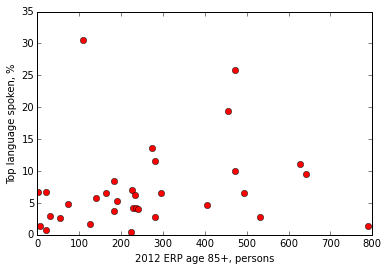

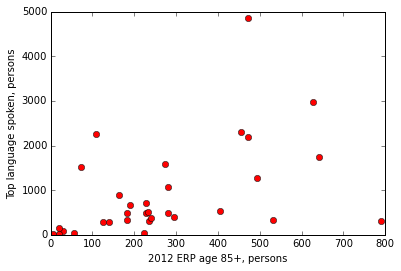

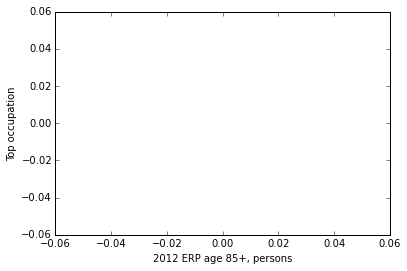

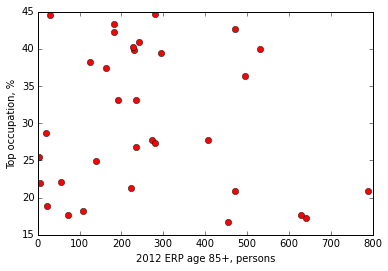

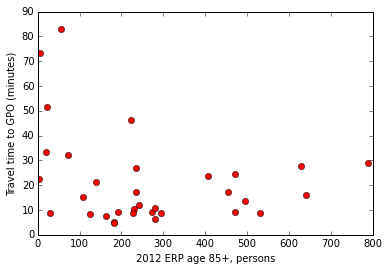

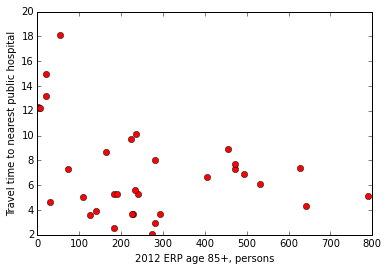

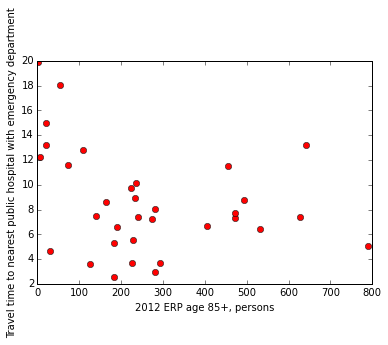

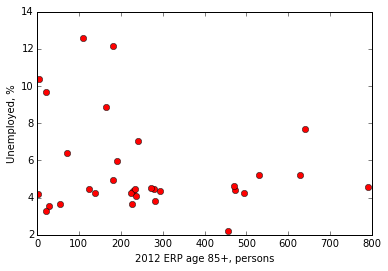

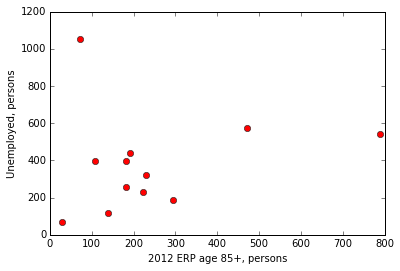

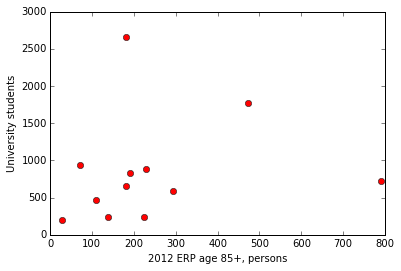

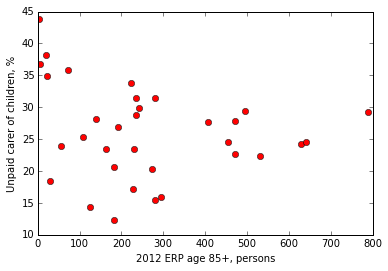

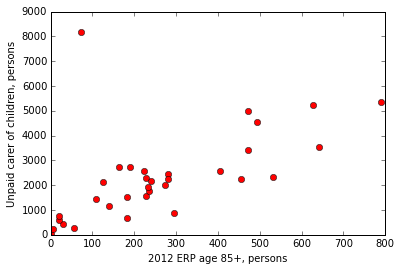

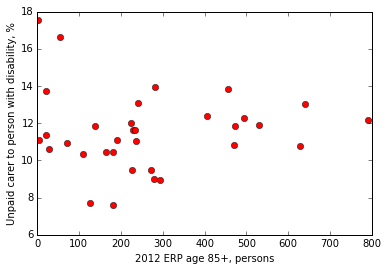

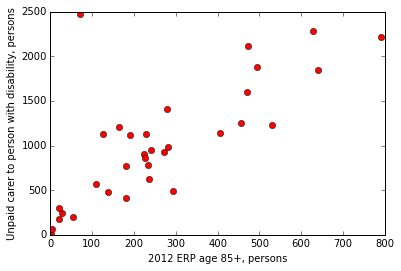

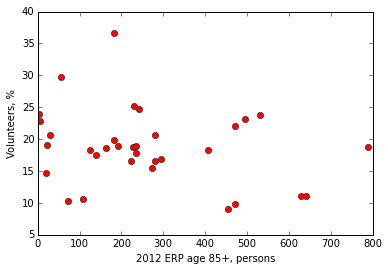

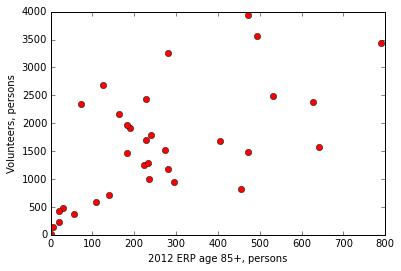

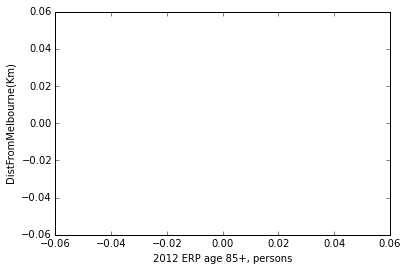

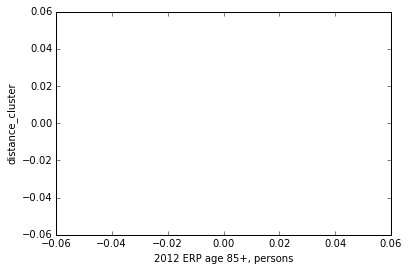

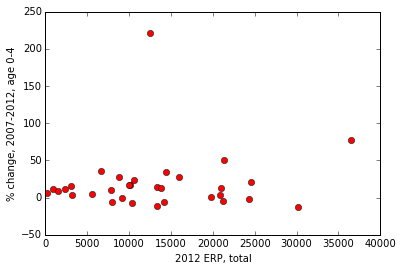

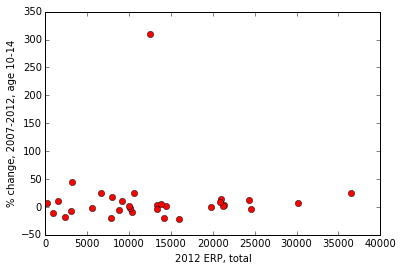

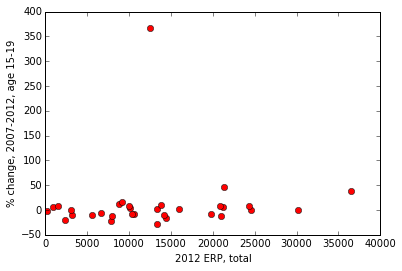

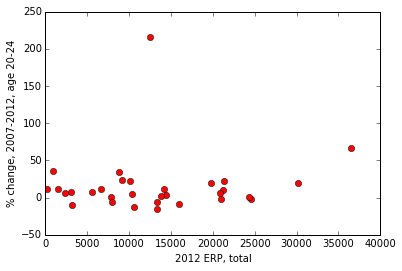

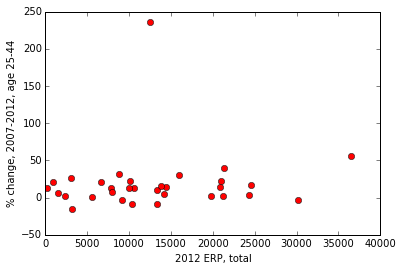

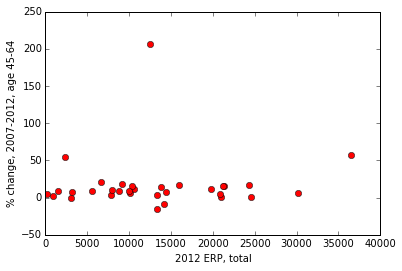

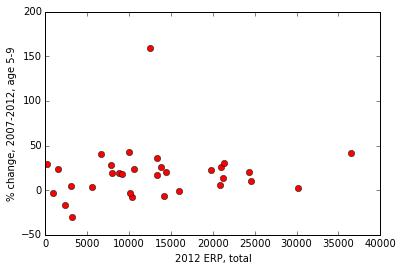

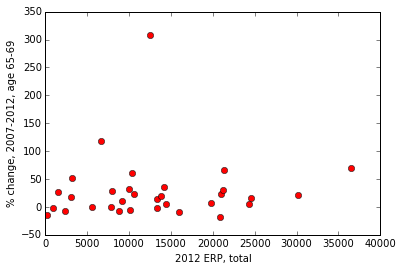

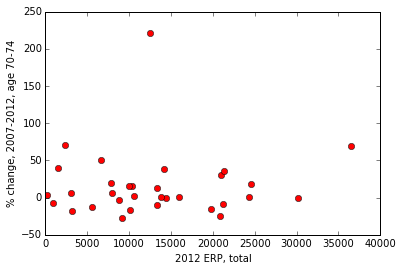

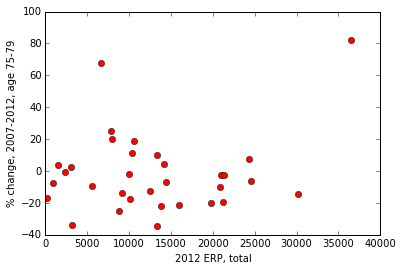

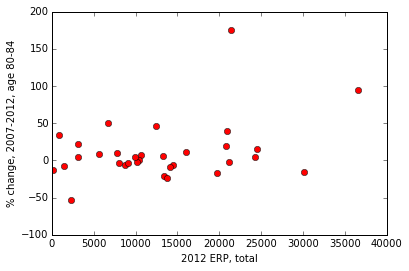

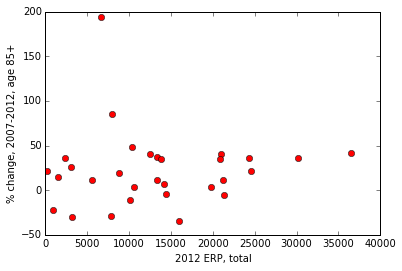

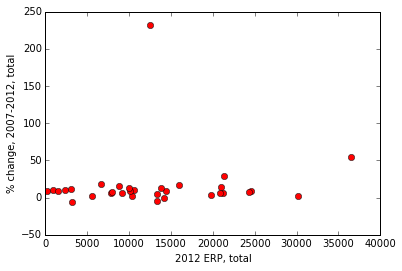

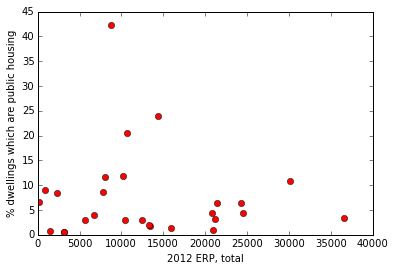

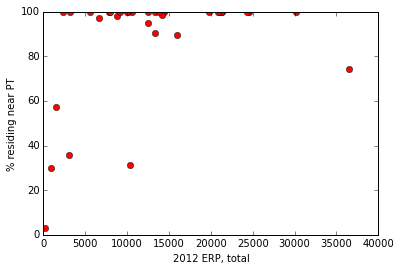

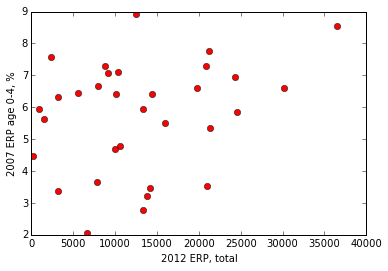

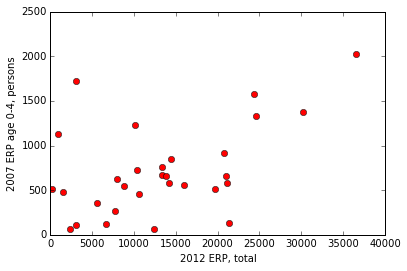

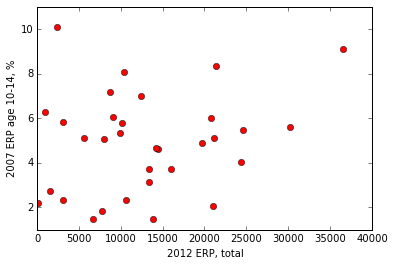

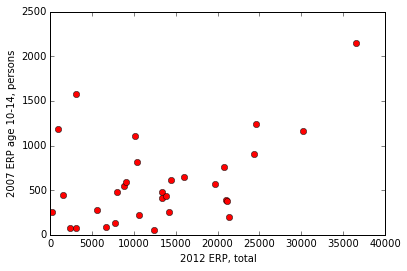

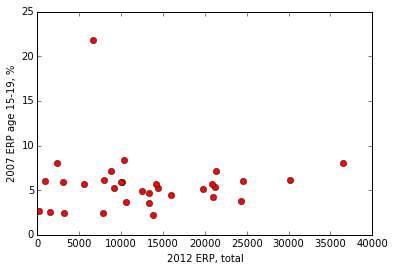

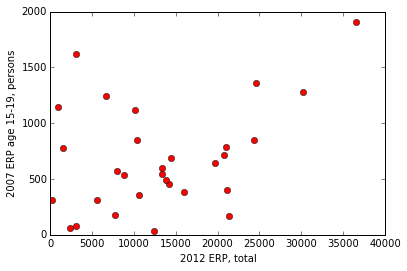

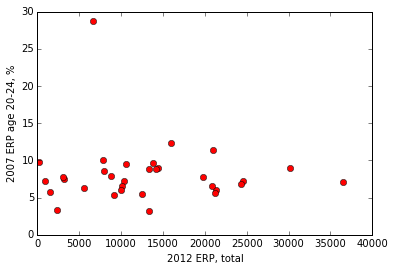

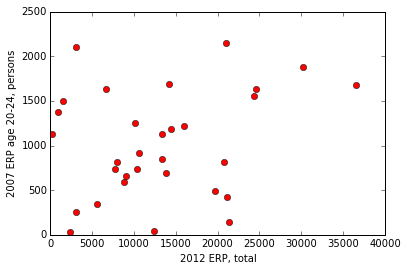

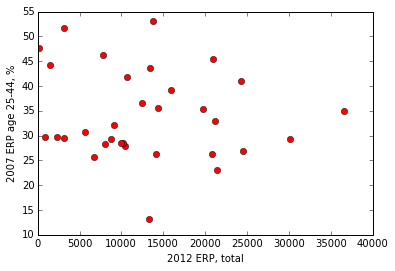

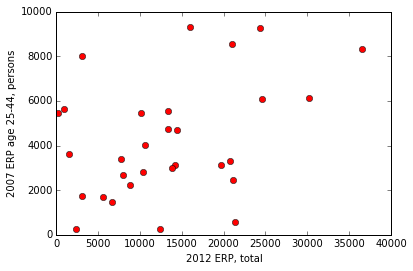

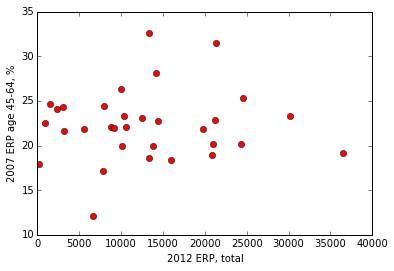

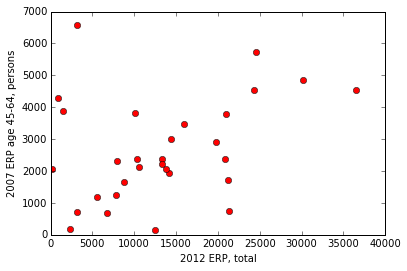

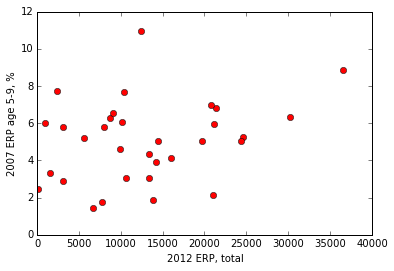

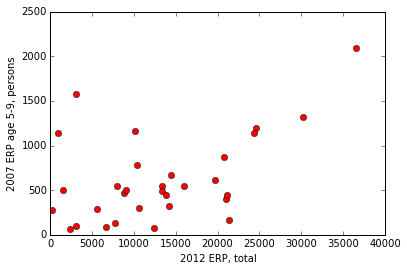

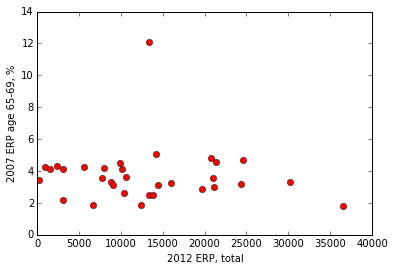

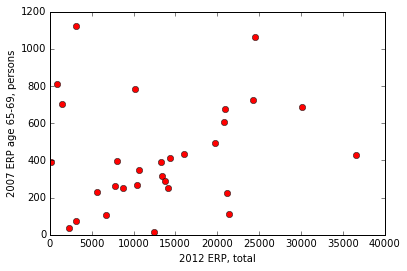

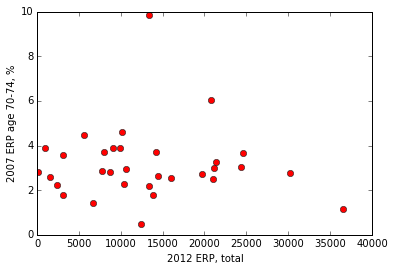

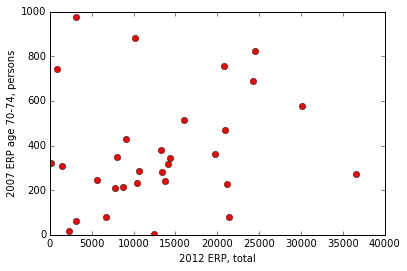

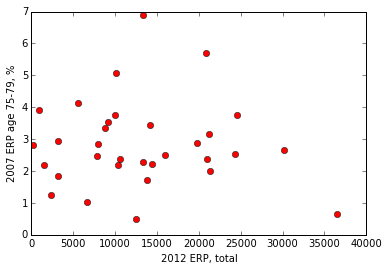

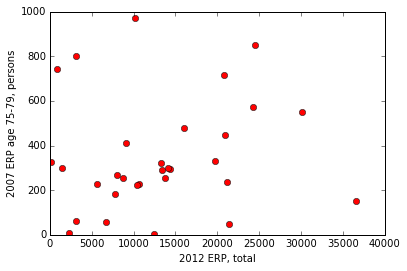

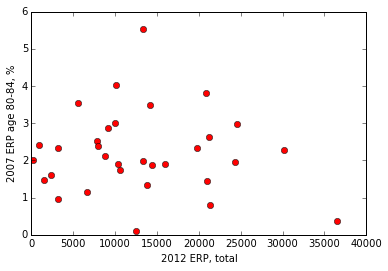

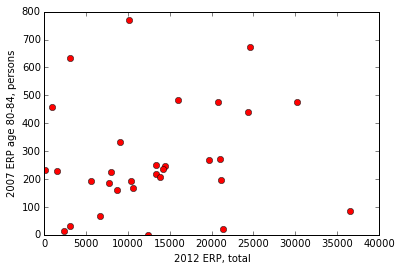

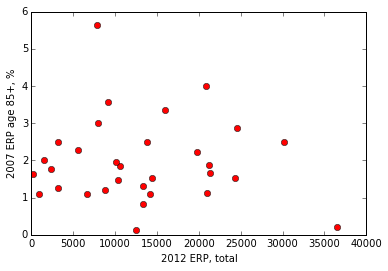

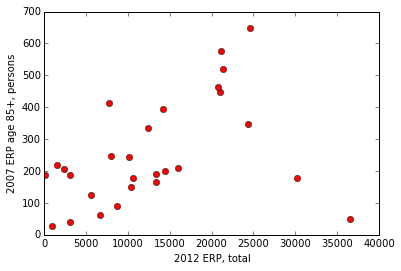

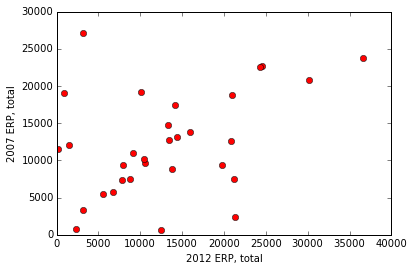

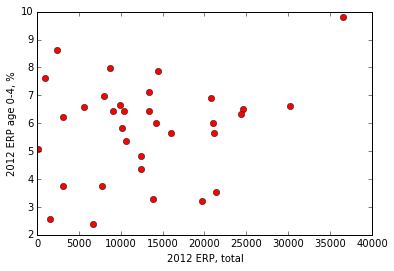

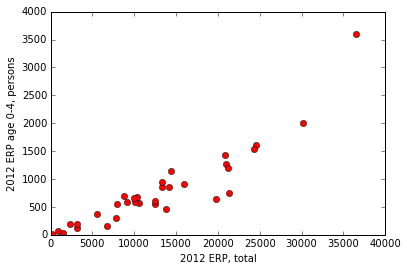

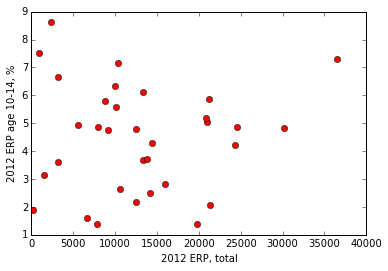

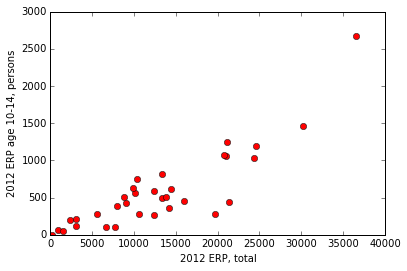

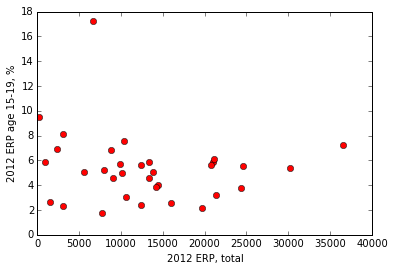

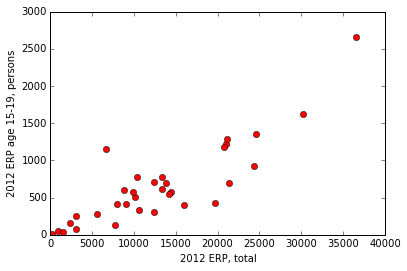

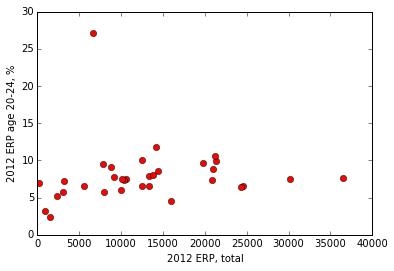

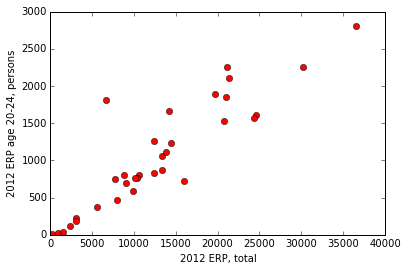

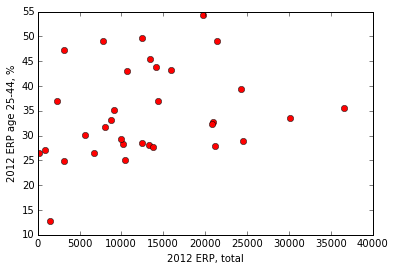

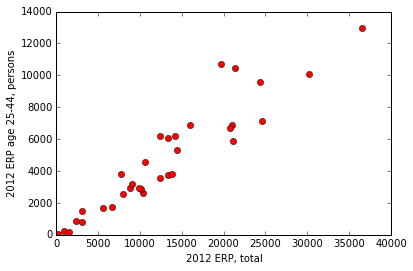

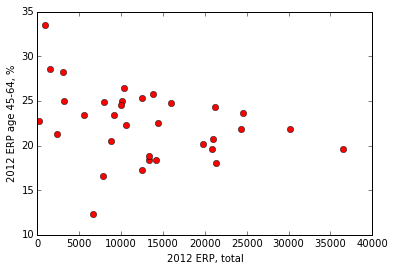

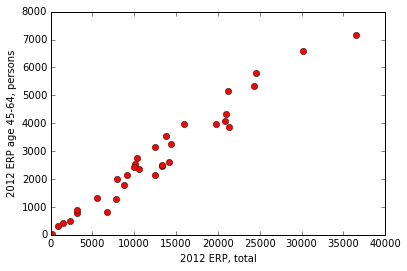

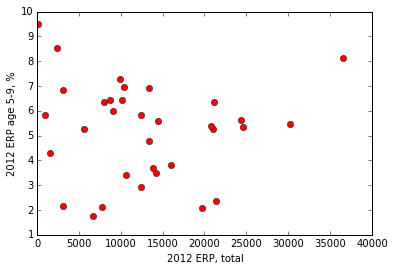

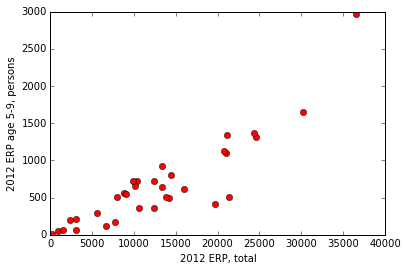

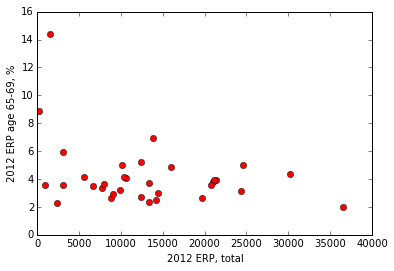

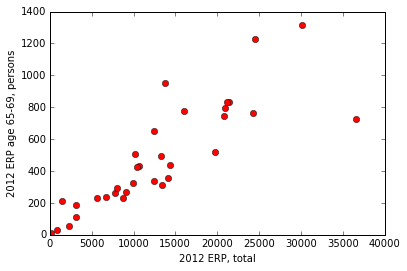

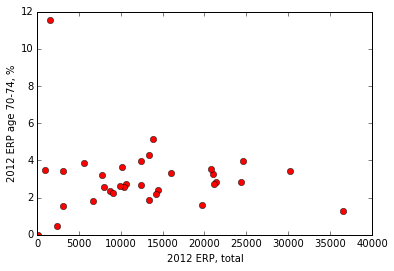

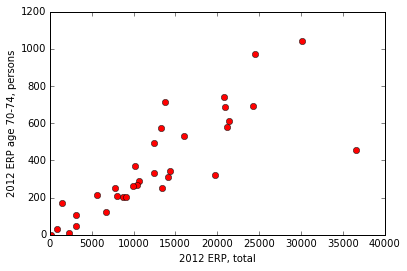

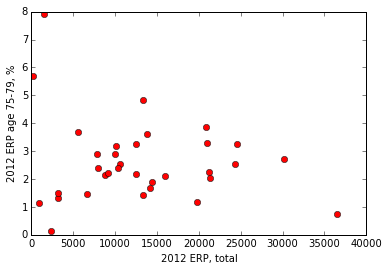

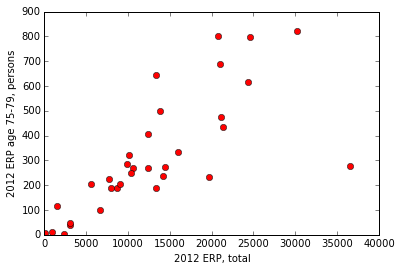

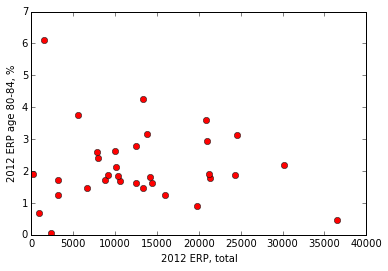

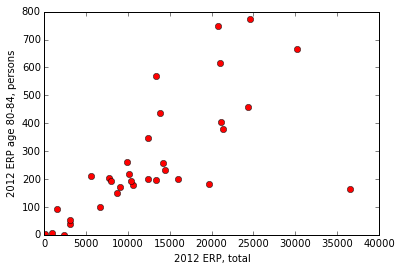

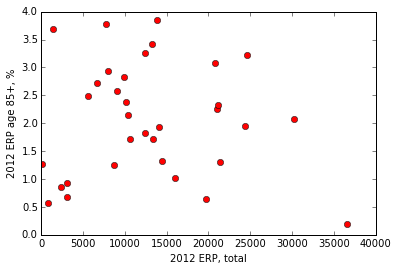

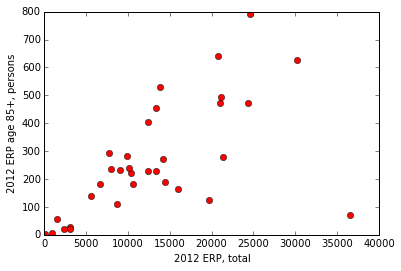

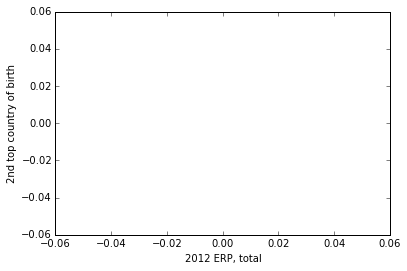

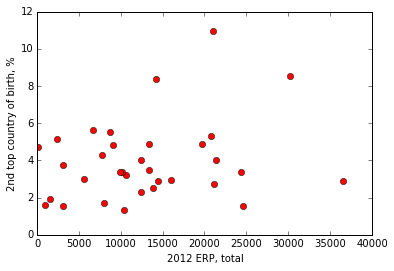

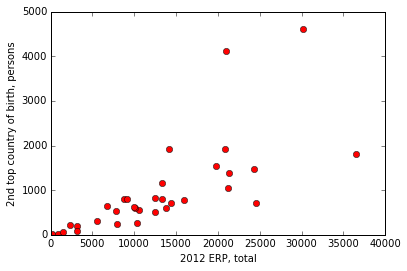

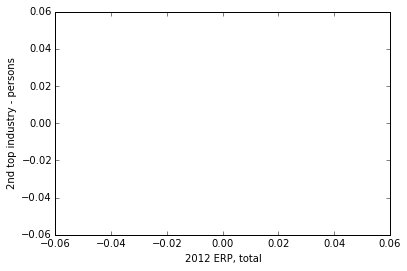

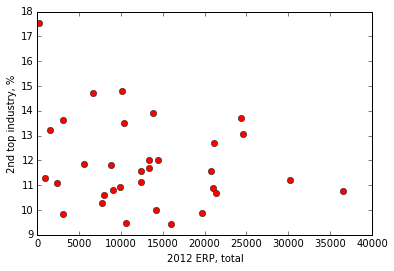

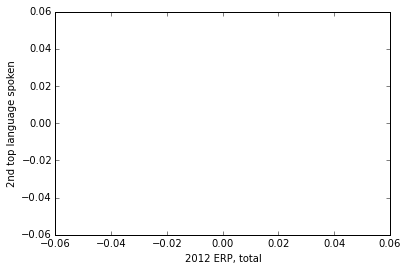

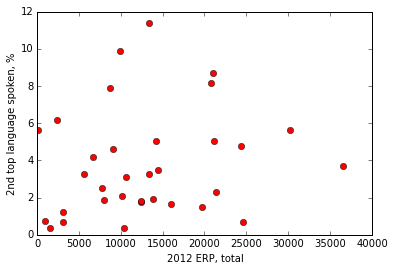

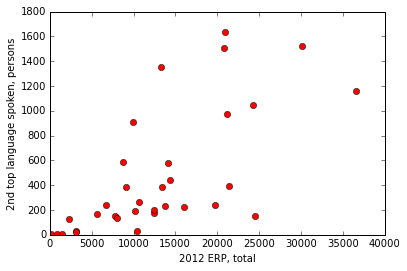

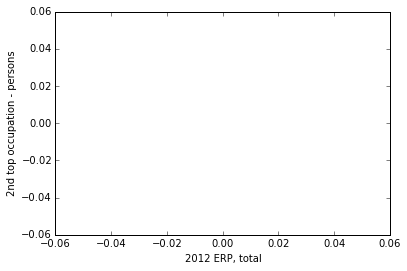

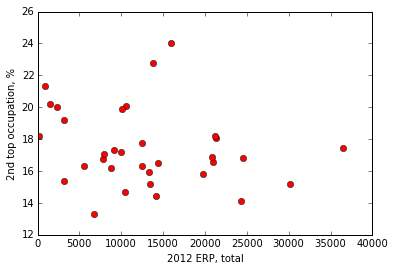

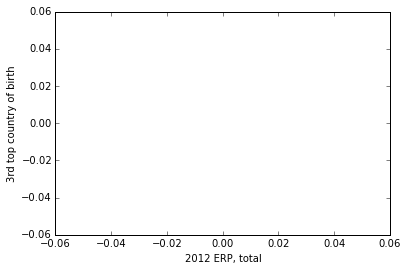

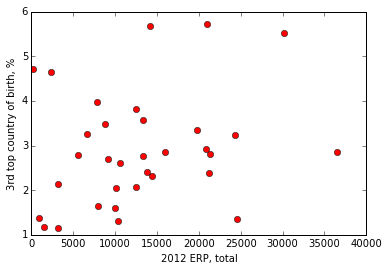

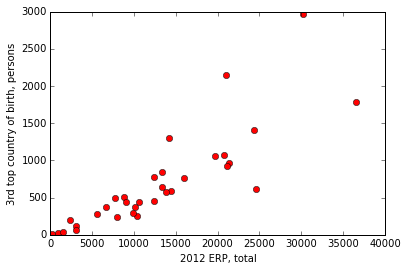

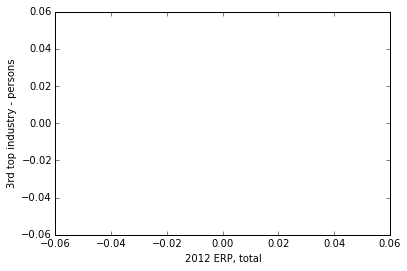

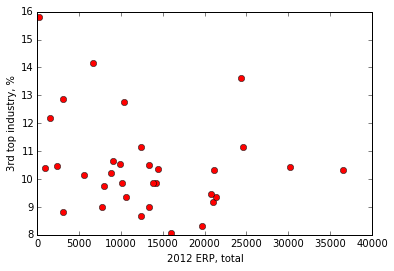

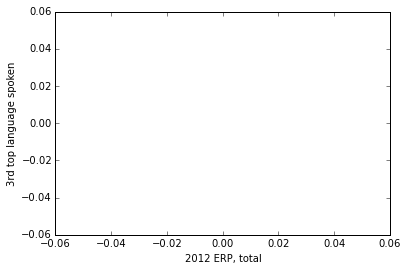

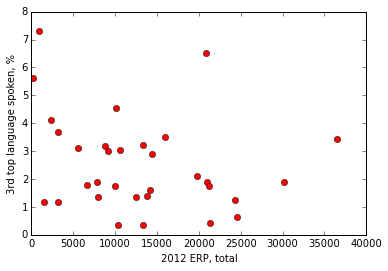

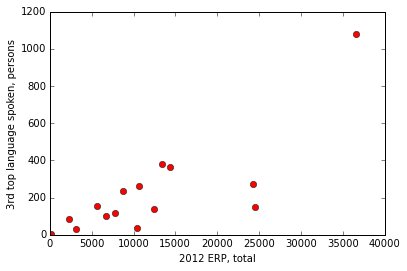

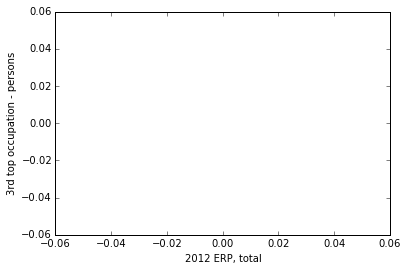

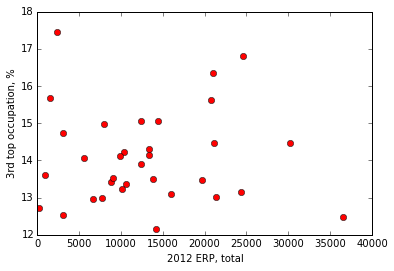

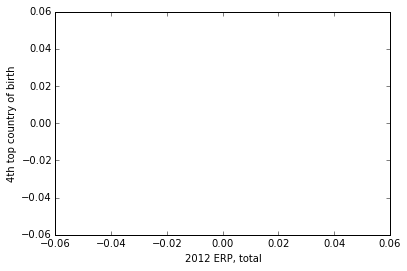

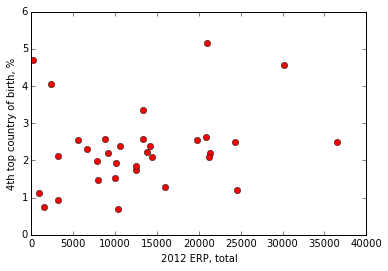

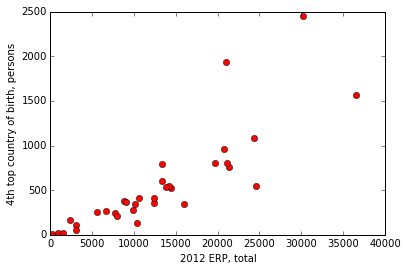

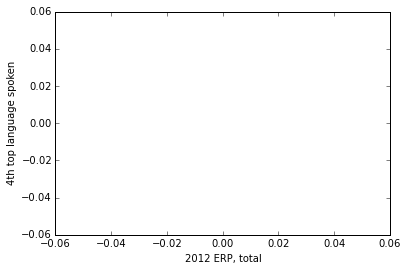

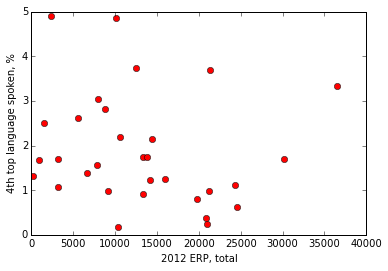

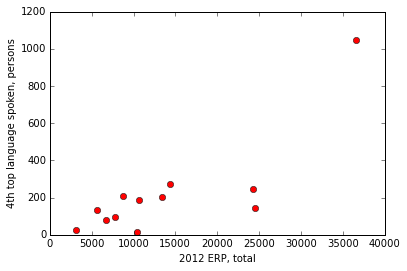

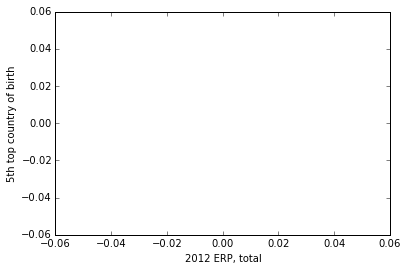

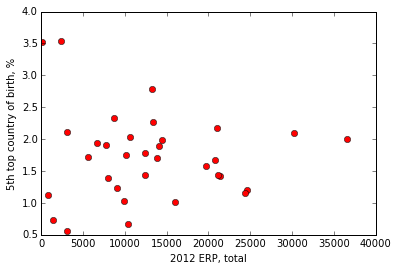

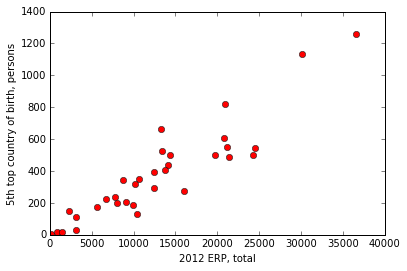

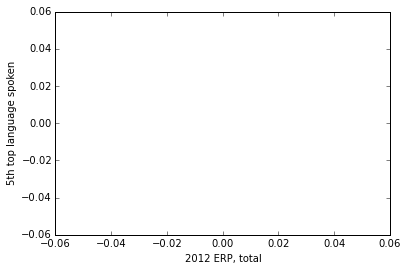

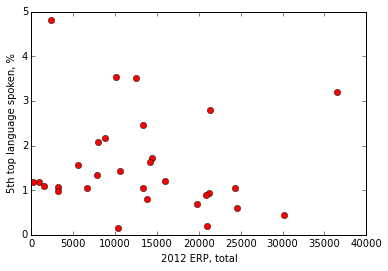

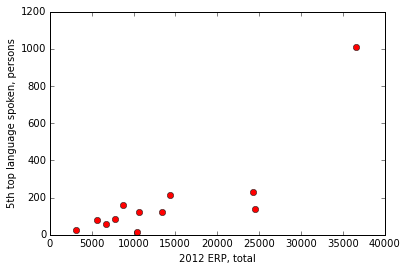

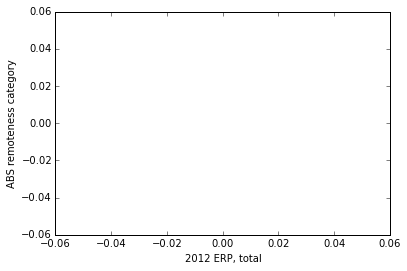

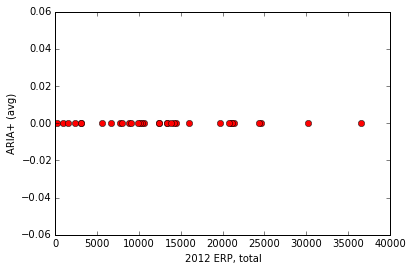

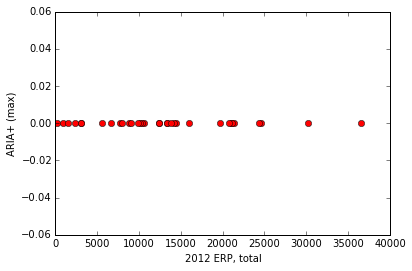

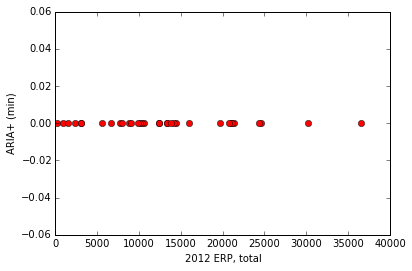

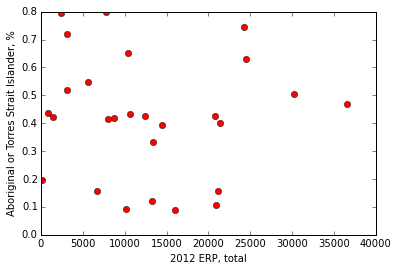

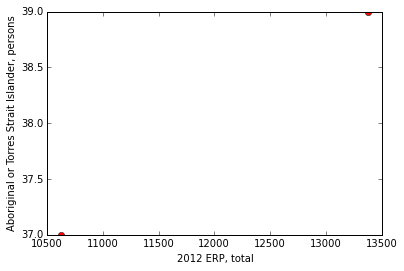

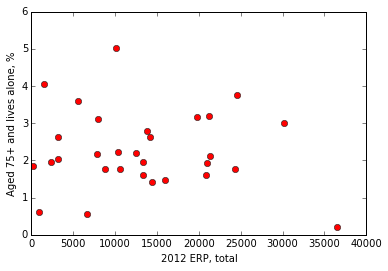

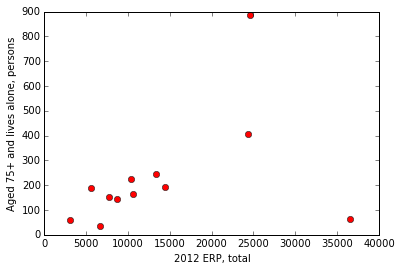

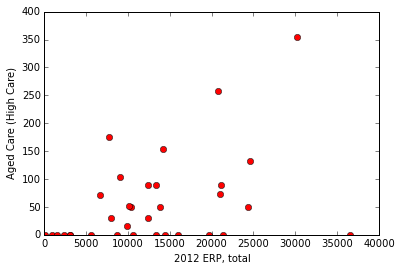

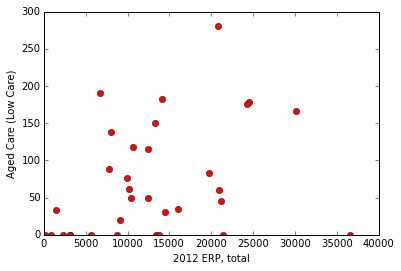

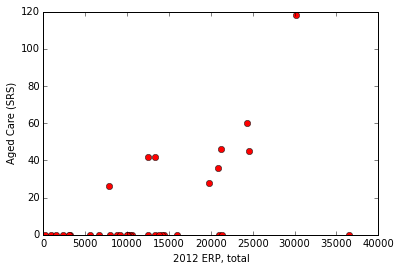

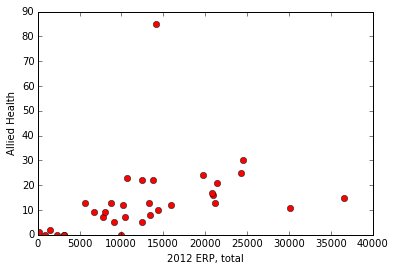

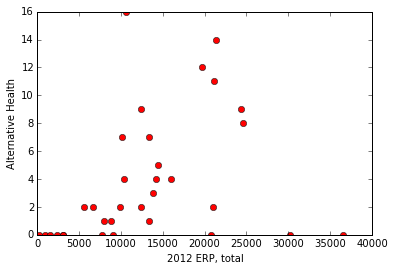

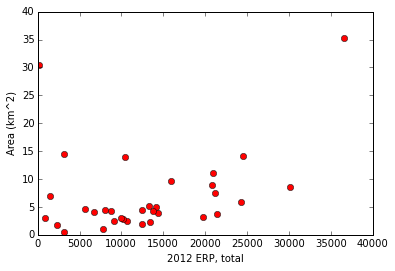

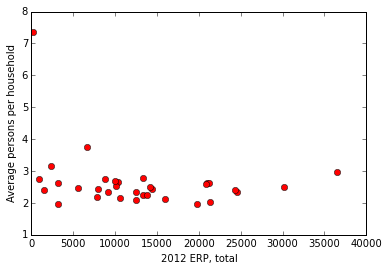

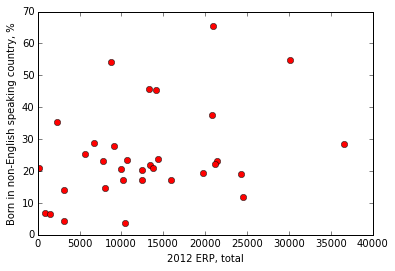

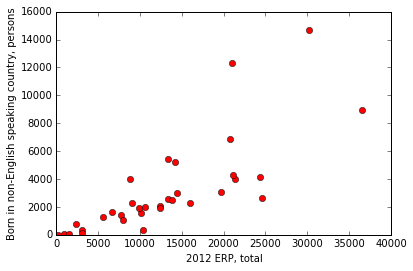

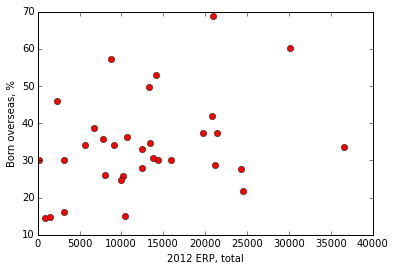

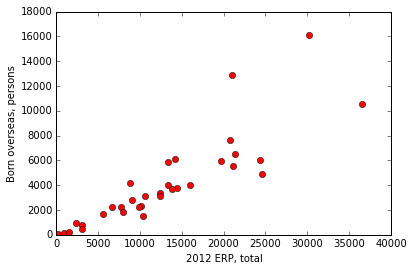

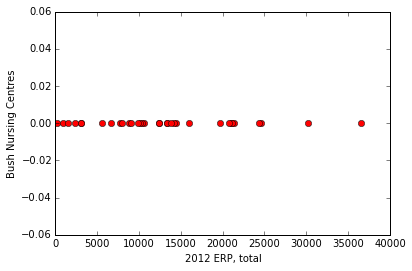

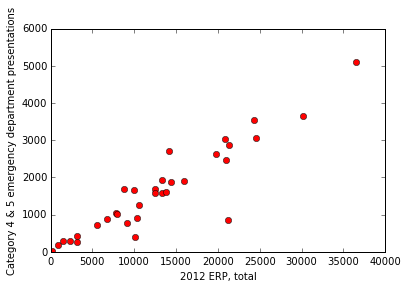

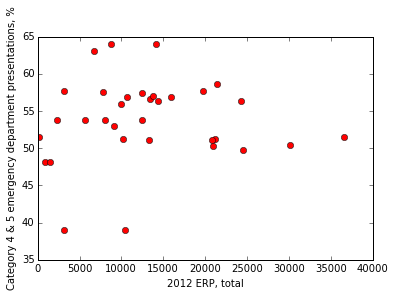

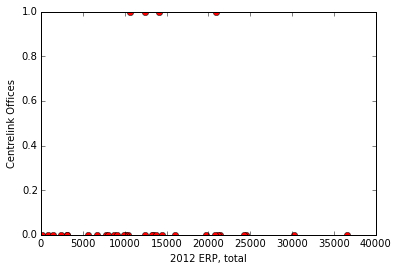

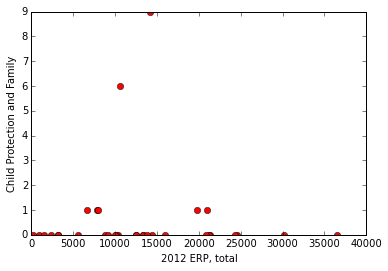

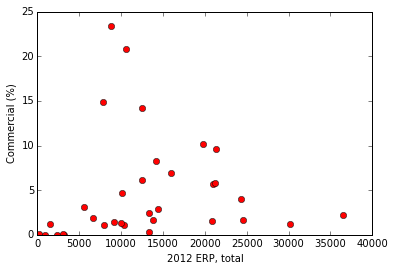

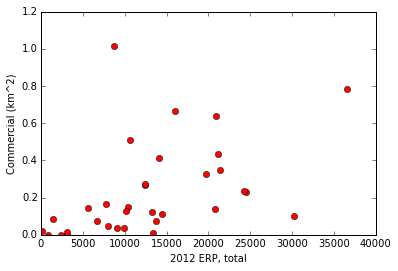

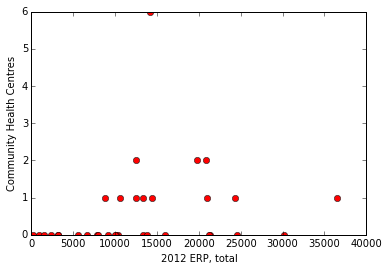

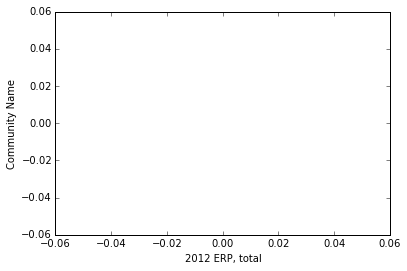

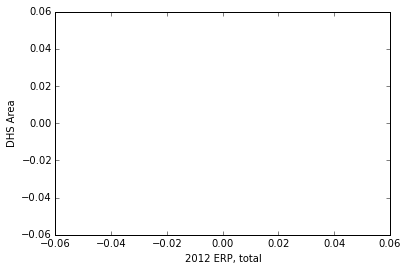

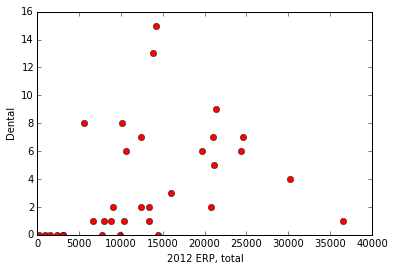

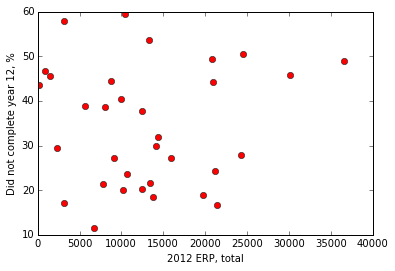

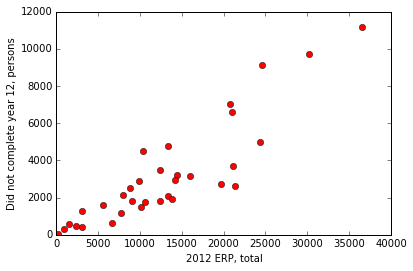

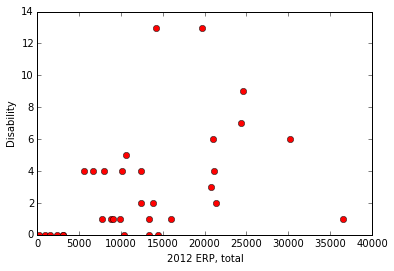

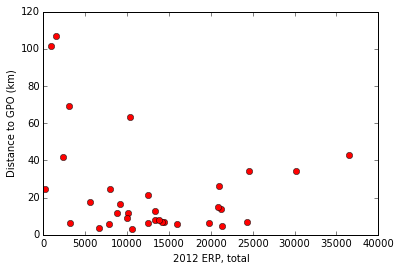

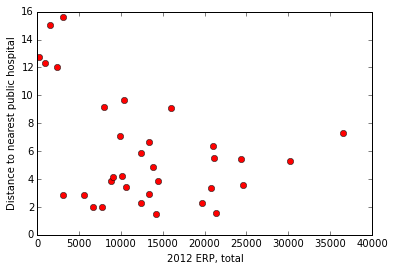

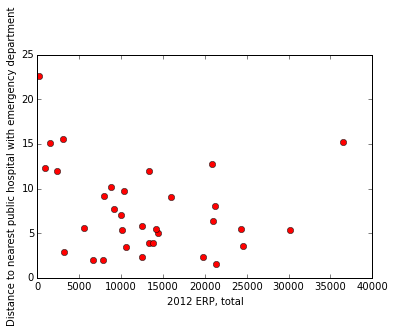

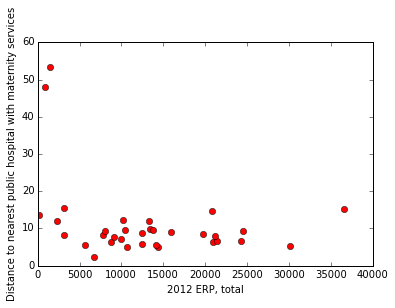

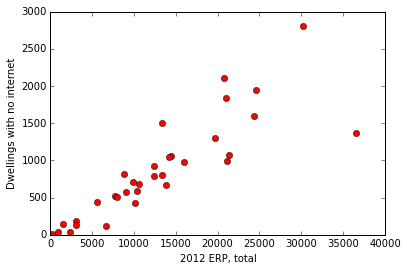

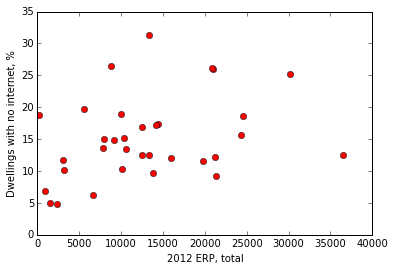

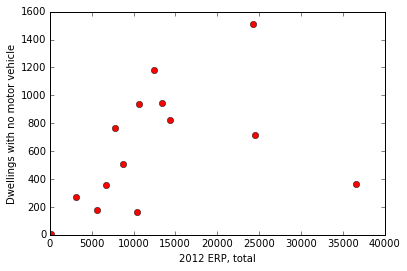

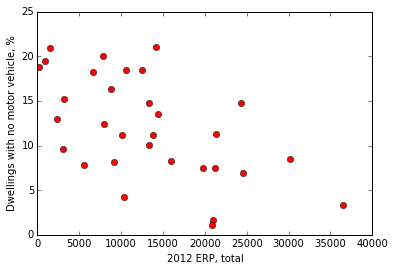

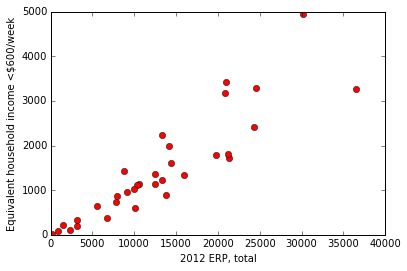

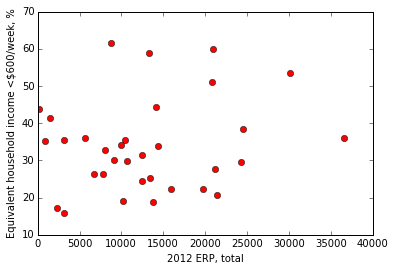

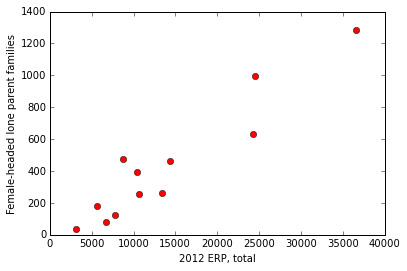

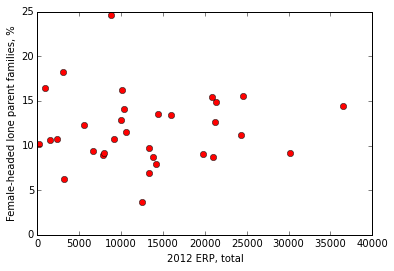

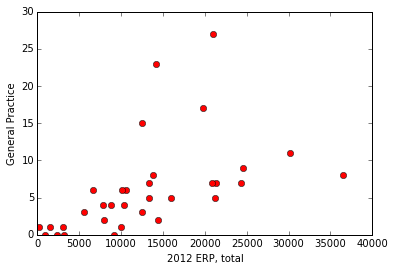

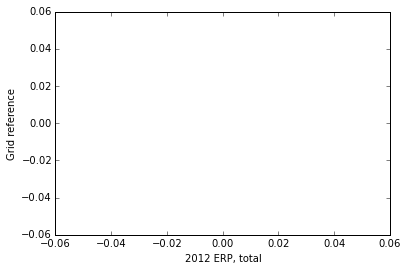

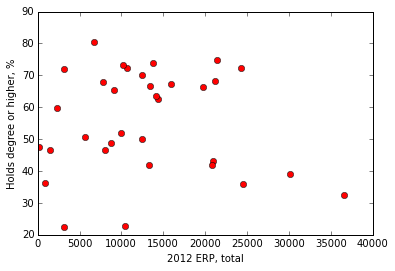

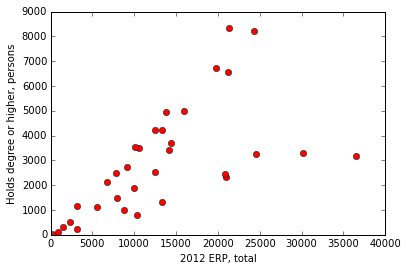

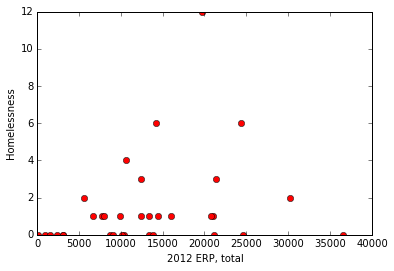

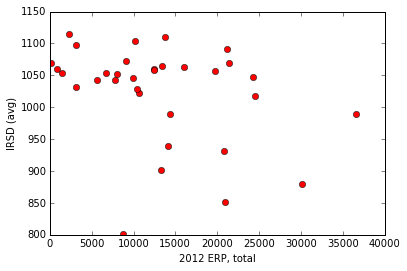

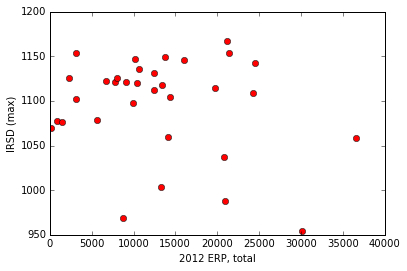

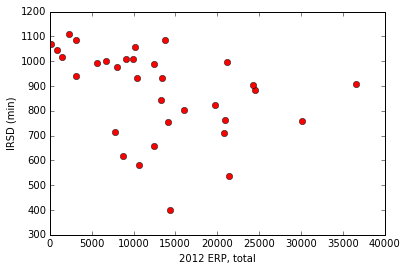

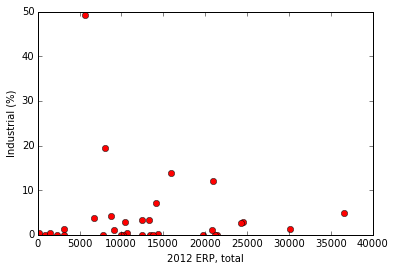

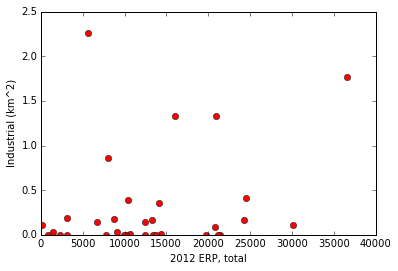

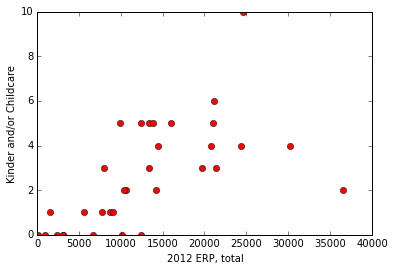

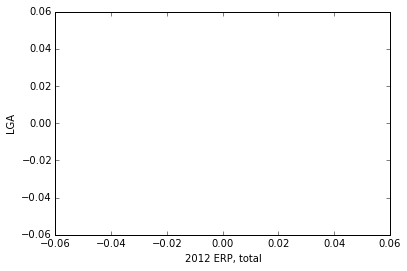

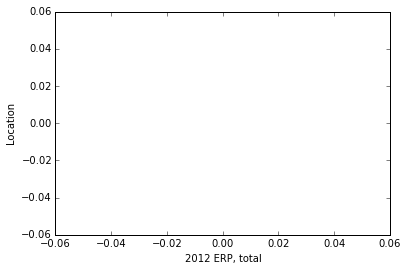

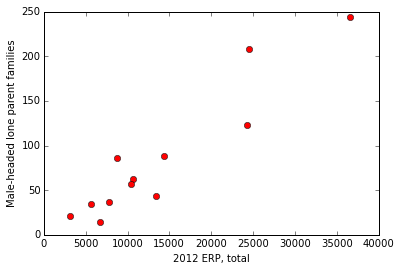

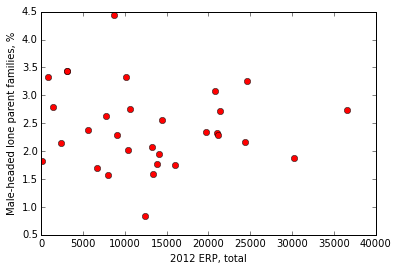

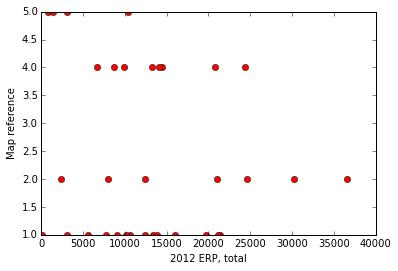

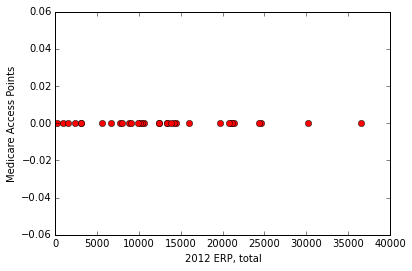

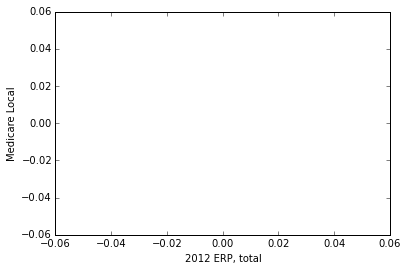

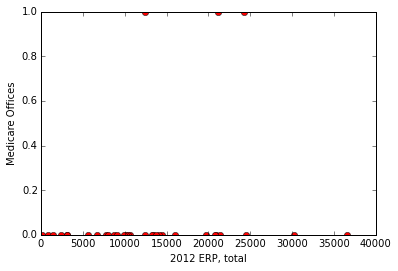

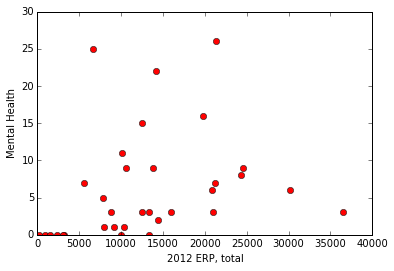

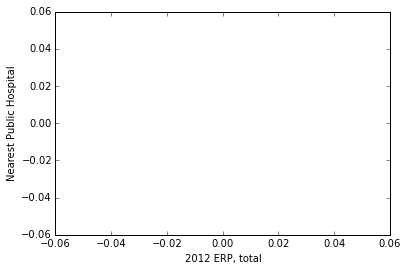

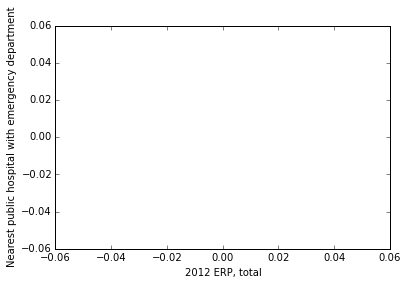

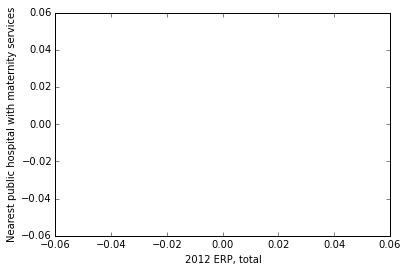

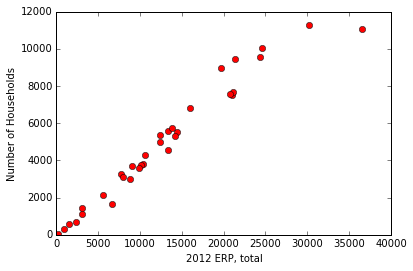

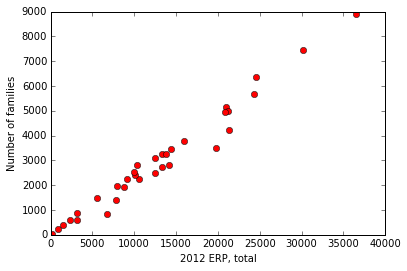

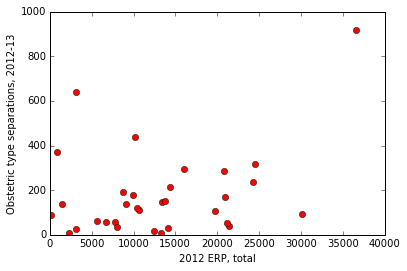

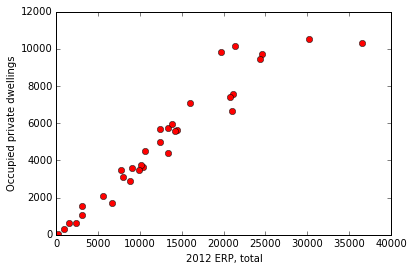

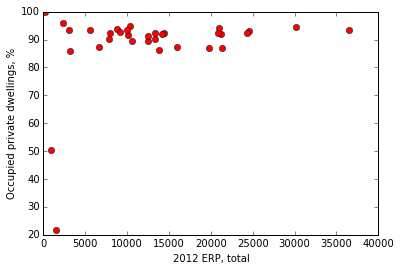

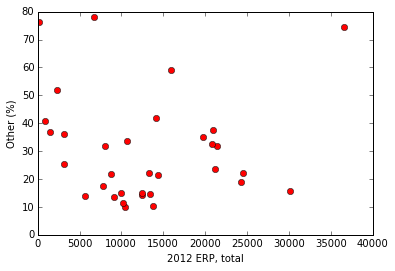

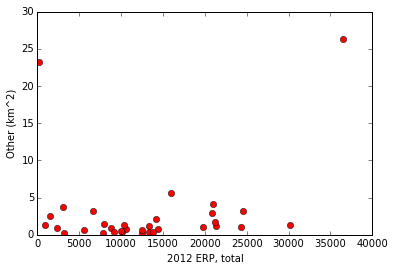

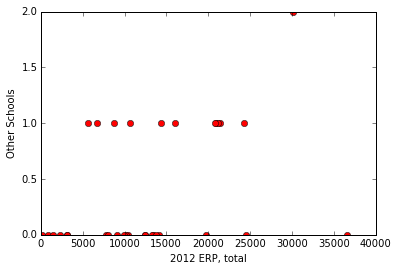

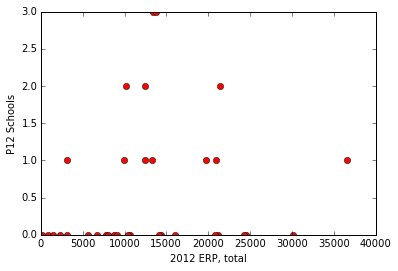

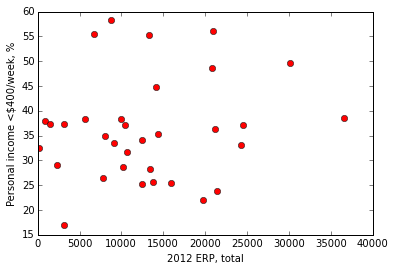

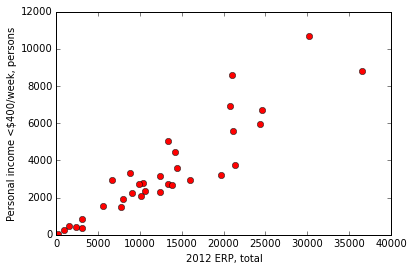

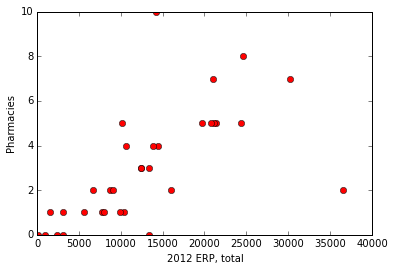

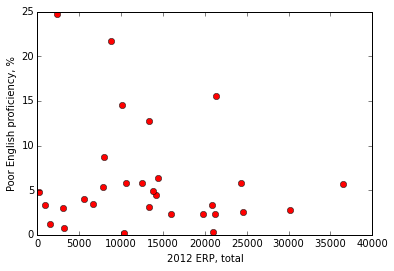

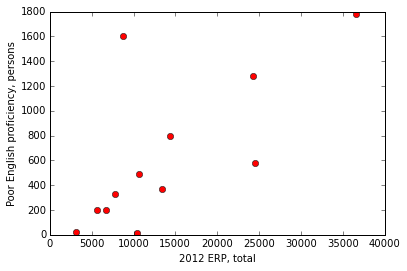

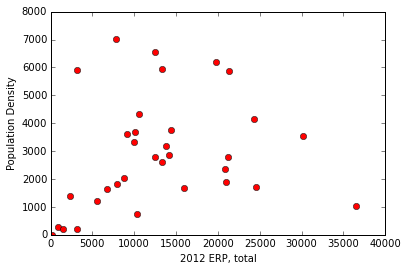

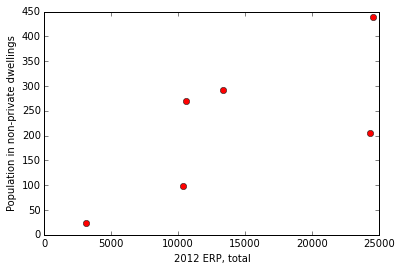

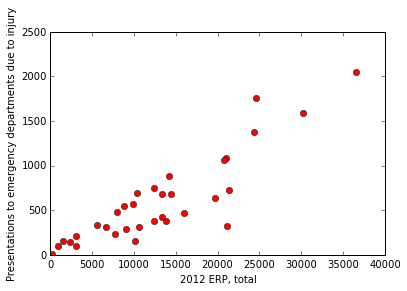

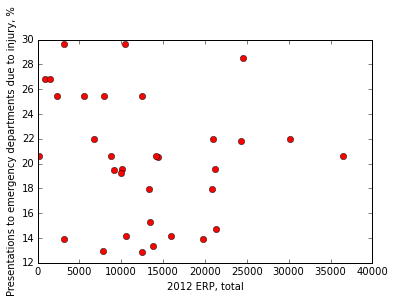

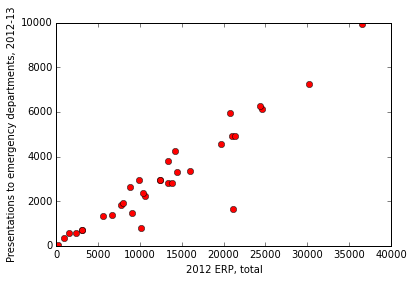

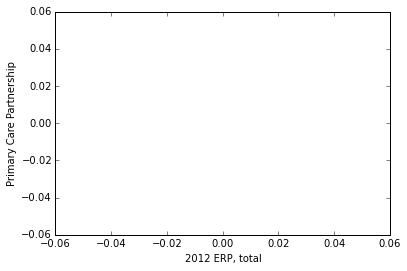

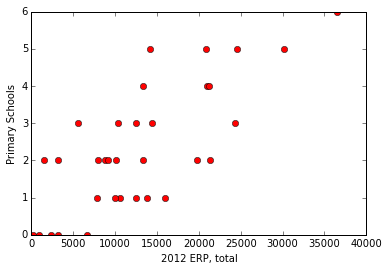

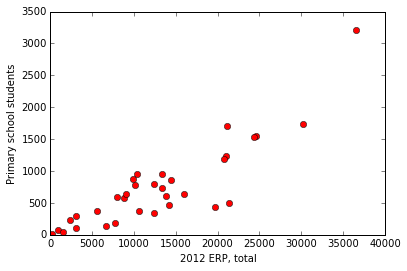

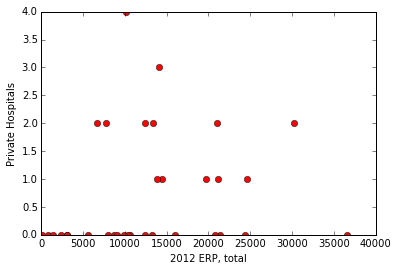

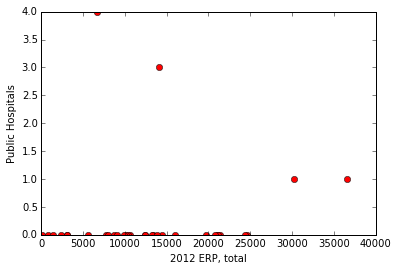

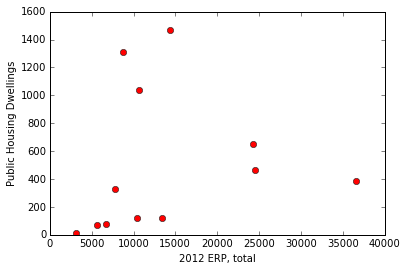

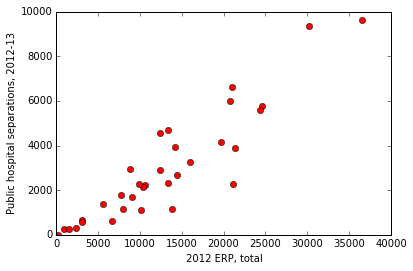

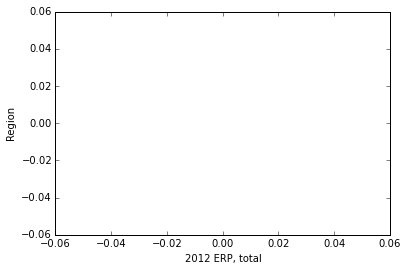

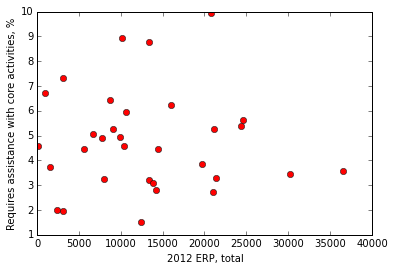

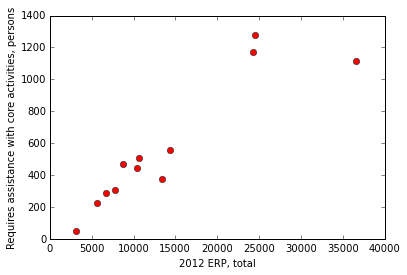

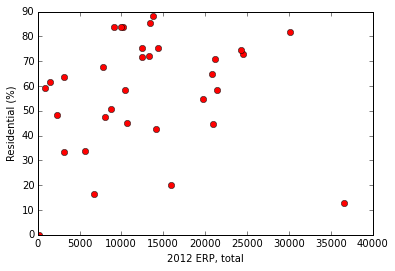

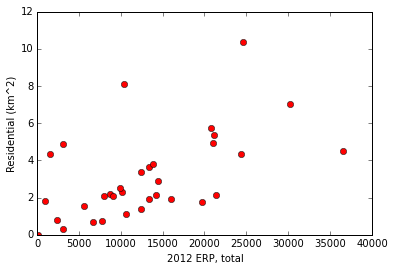

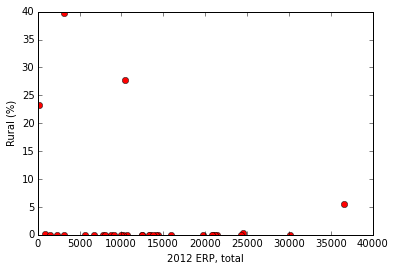

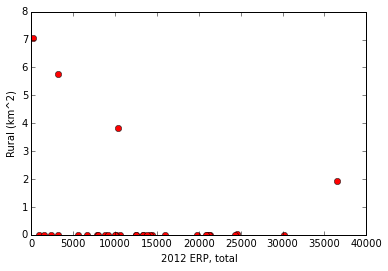

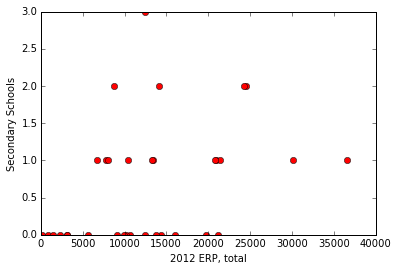

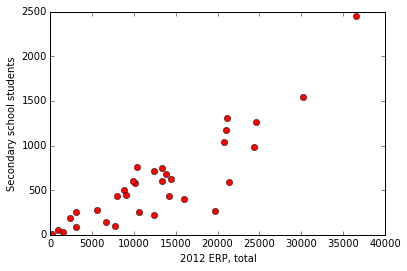

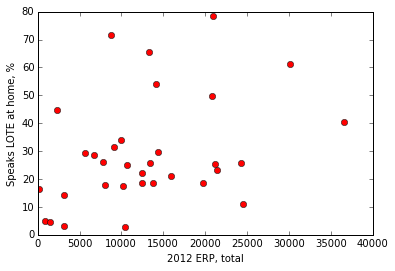

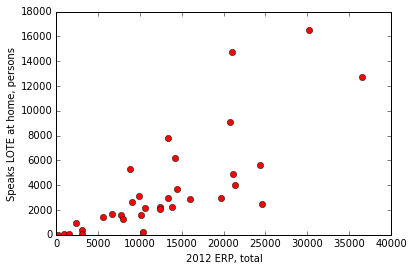

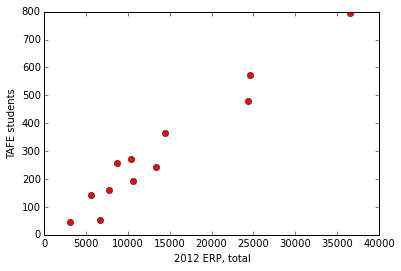

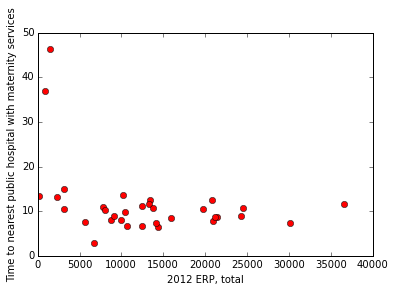

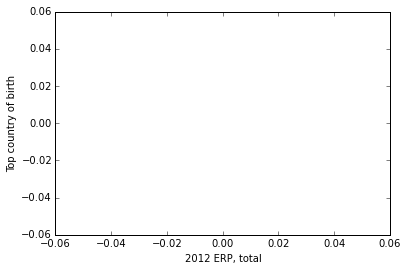

KeyboardInterrupt: 

In [70]:

plots = []
c = 1
inc = 15140#use this to make start at arbitrary points.
i = 0
plt.figure(figsize=(2,2))
for line in data:
    
    
    #c = c - 1
    for line2 in data:
        
            
        if(line == line2):
            continue
        if(i <= inc):
            i += 1
            continue
        else:
            i += 1
        #if(data.has_key(str(line))):
         #   if(data.has_key(str(line2))):
        data1 = []
        data2 = []
        for item in data[str(line)][0:-1]:
            if isinstance(item, float):
                data1.append(item)
        for item in data[str(line2)][0:-1]:
            if isinstance(item, float):
                data2.append(item)
        if(len(data1) != len(data2)): 
            if(len(data1) > len(data2)):
                data1 = data1[0:len(data2)]
            else:
                data2 = data2[0:len(data1)]
        fig = plt.figure()
        #fig.set_size_inches(20, 20)
        plt.plot(data1,data2, 'ro')
        plt.xlabel(str(line))
        plt.ylabel(str(line2))
        #plots.append(p)
        savefig('pspence\Plots\{}.png'.format(i), bbox_inches='tight', dpi=100)
        #print "\nLine: ", line, "\nLine2: ", line2
    

